In [1]:
%matplotlib inline

Segments shape:  (228, 28, 28)
Training shape:  (228, 784)


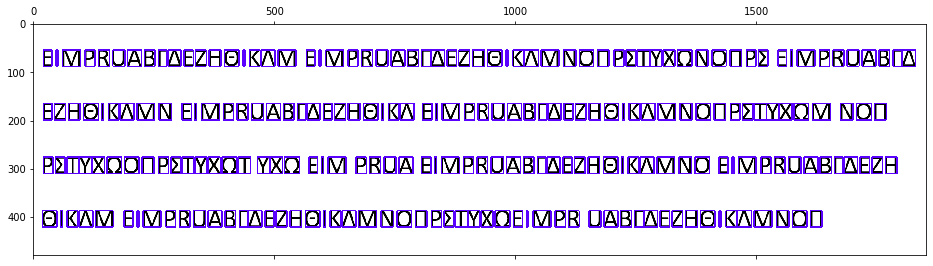

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

np.random.seed(42)


import warnings
warnings.filterwarnings("ignore")


plt.rcParams["figure.figsize"] = (5,5)


#read image
img = cv2.imread('greek_alphabet2.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))


segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>= 2 and w>=1:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

segments = np.array(segments)
print('Segments shape: ', segments.shape)

training = np.reshape(segments, (segments.shape[0], 28*28))
print('Training shape: ', training.shape)

plt.matshow(img)

In [3]:
unique_target = list('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')

train_target = []
for i in unique_target:
    train_target.append(i)
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (228,)


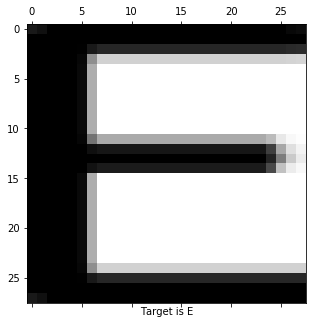

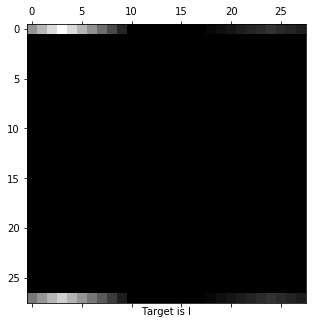

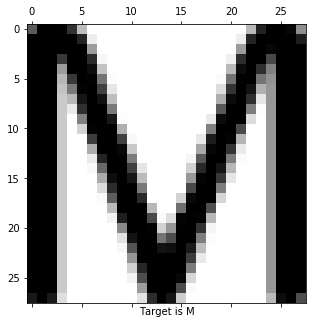

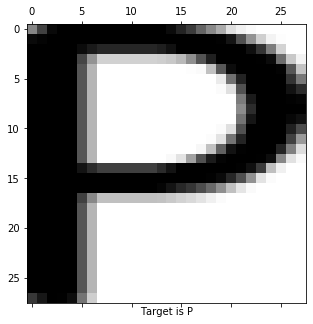

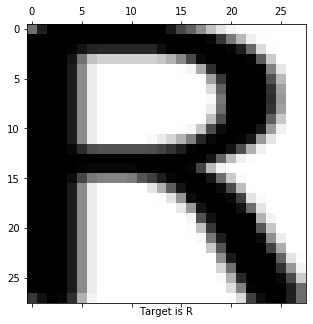

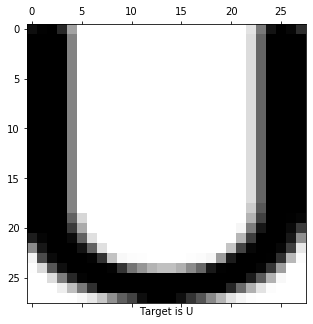

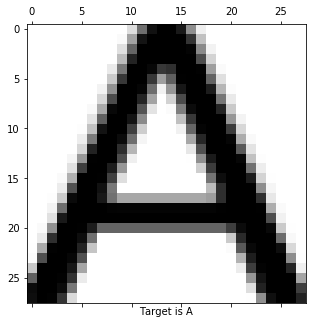

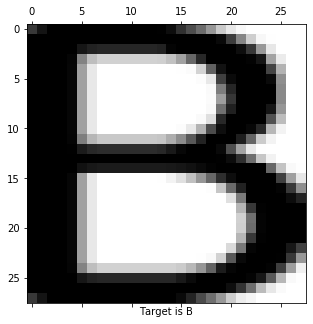

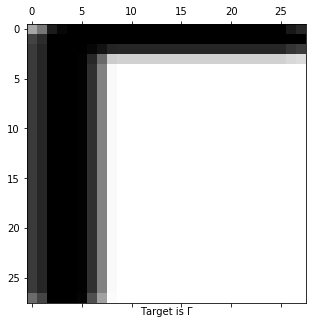

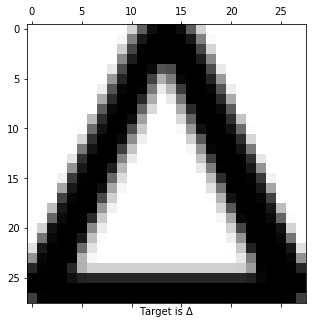

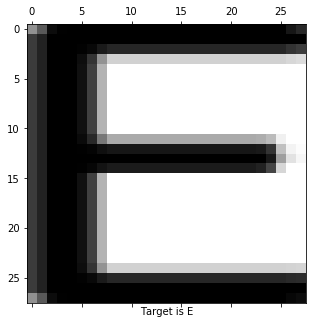

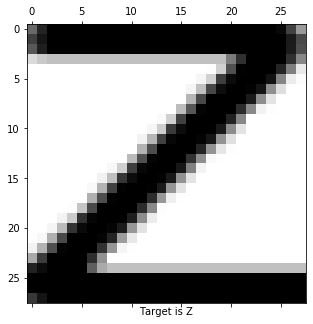

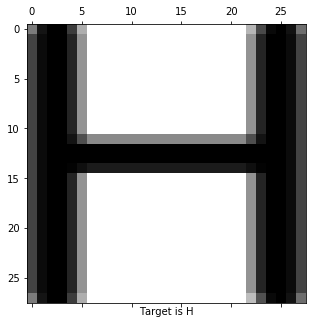

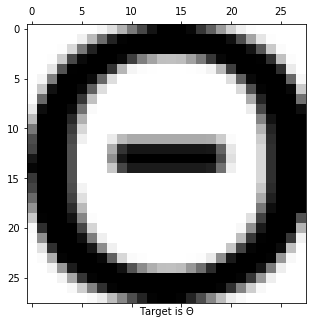

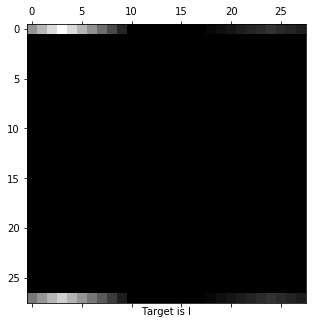

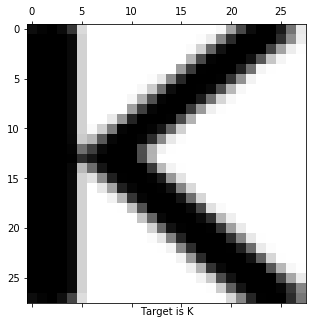

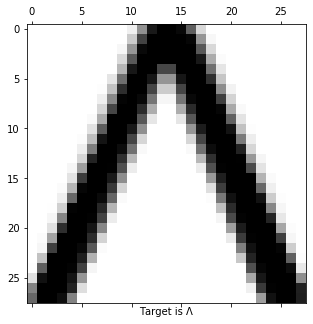

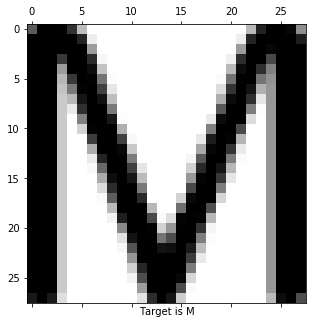

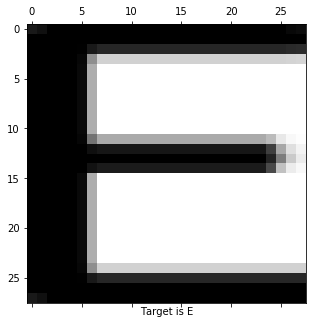

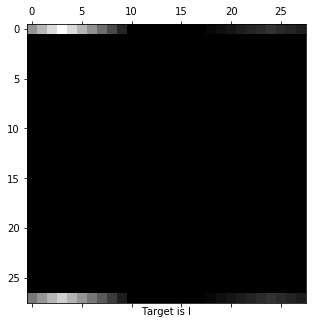

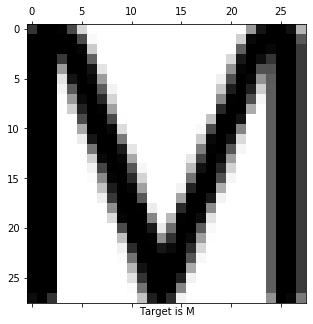

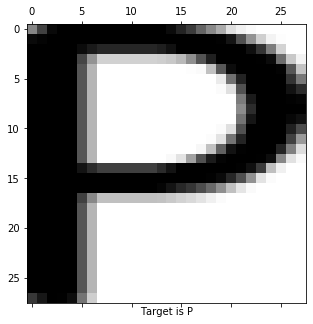

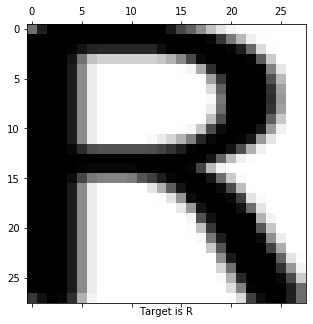

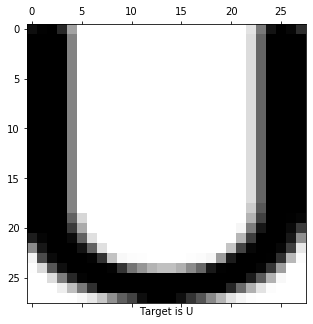

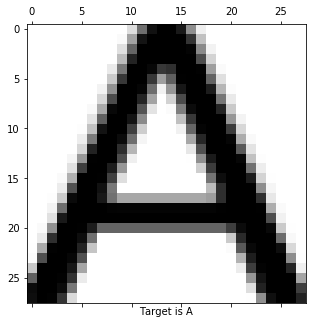

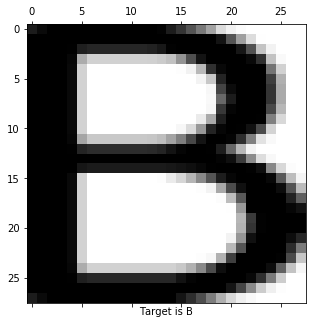

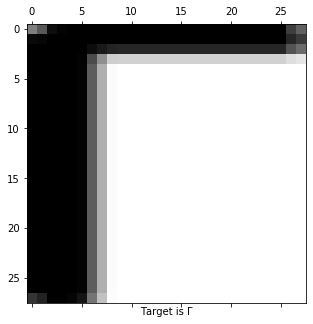

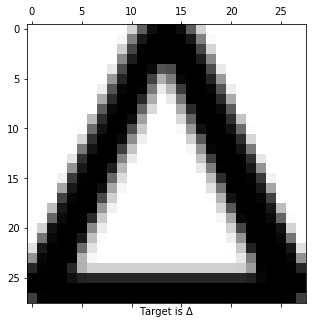

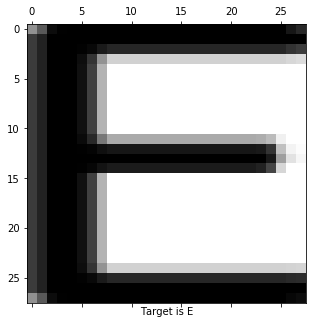

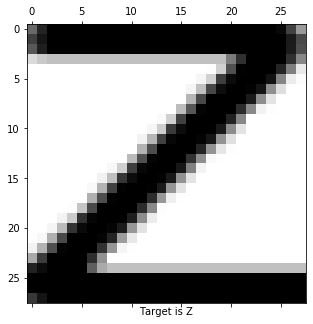

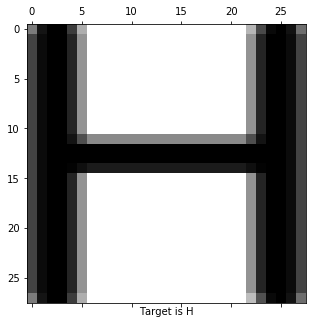

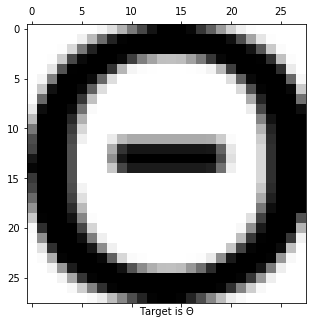

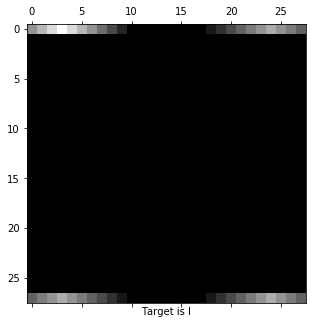

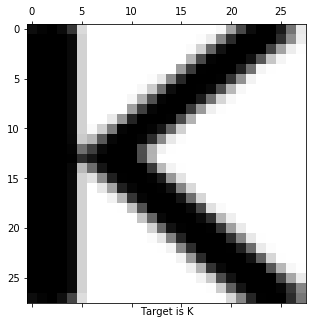

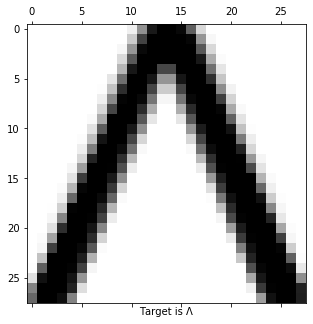

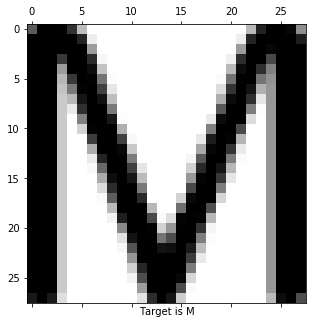

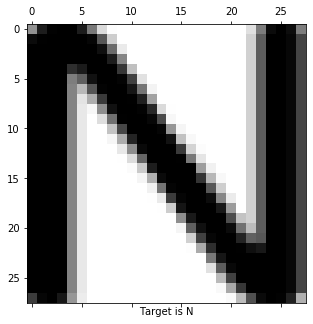

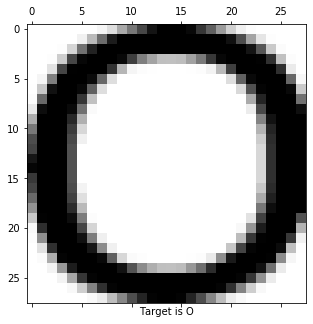

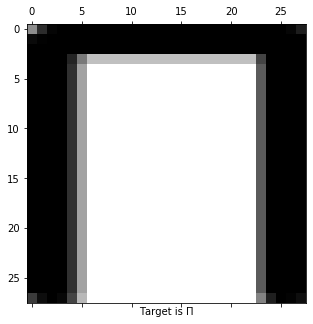

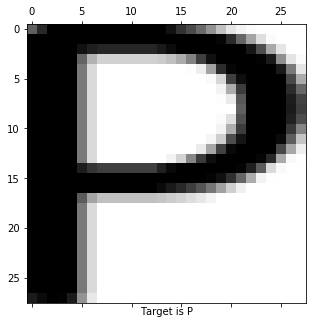

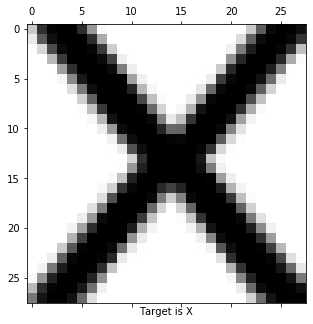

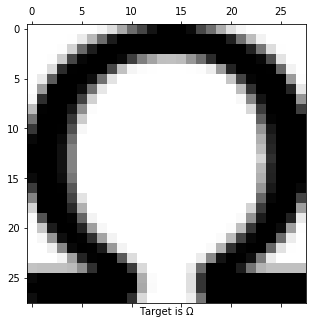

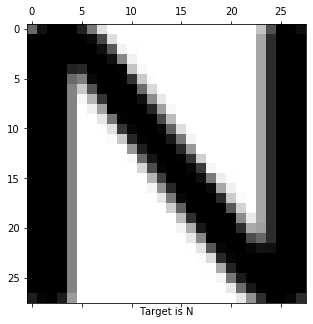

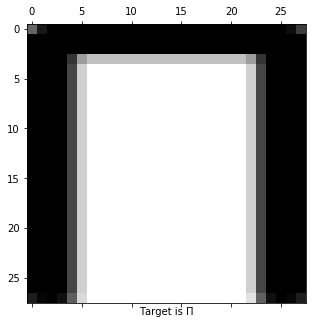

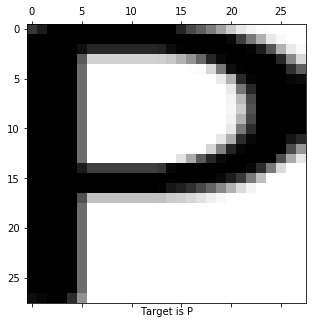

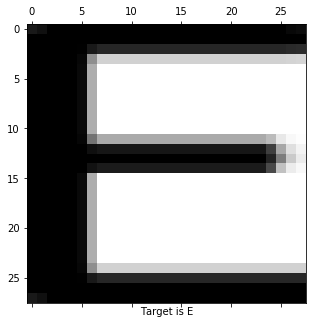

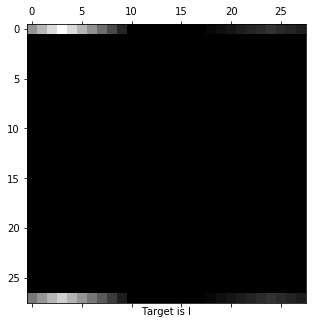

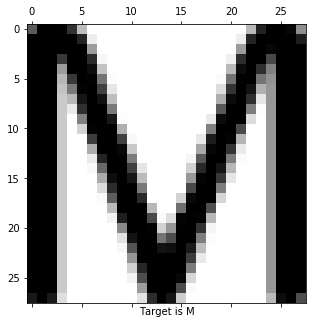

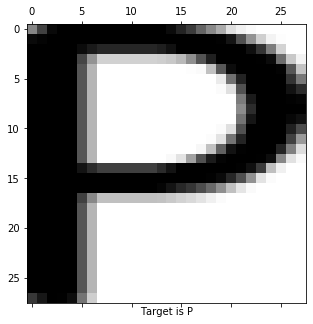

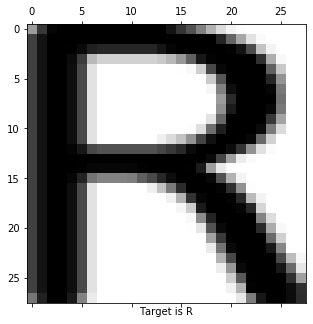

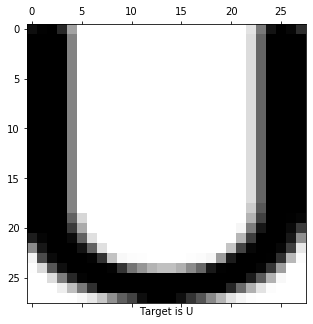

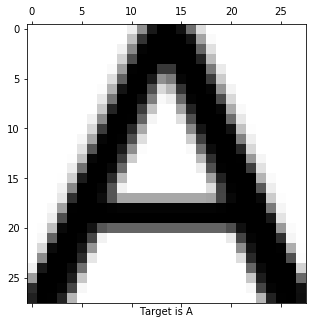

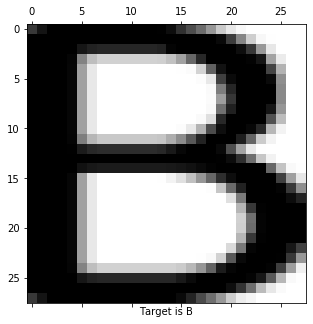

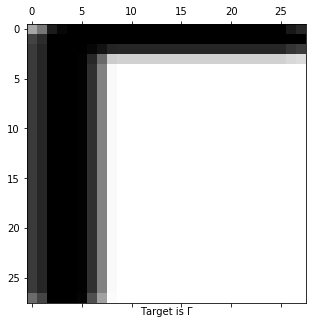

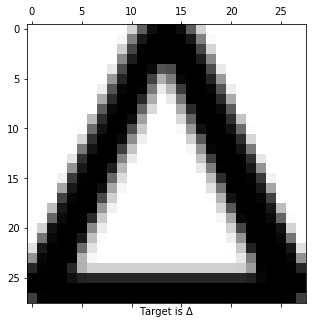

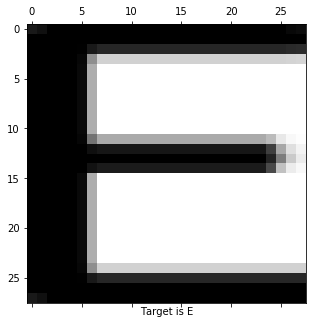

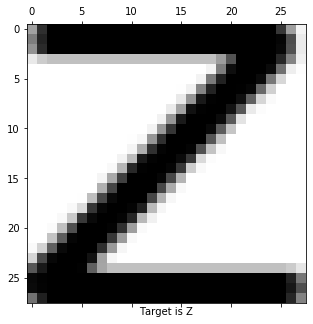

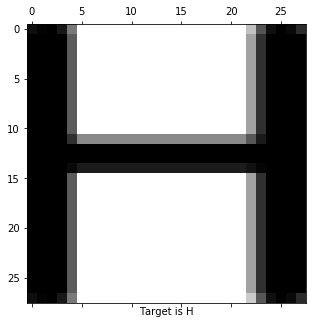

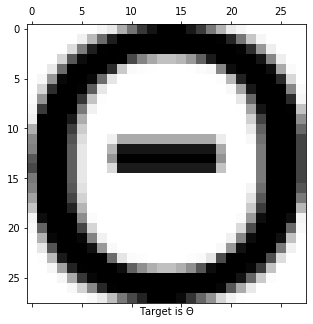

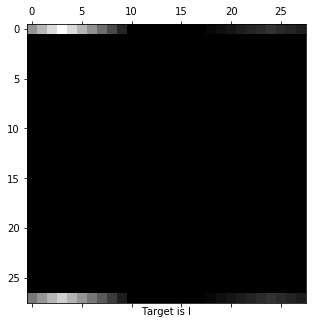

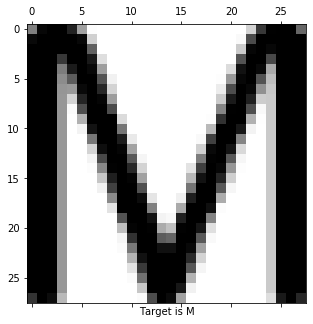

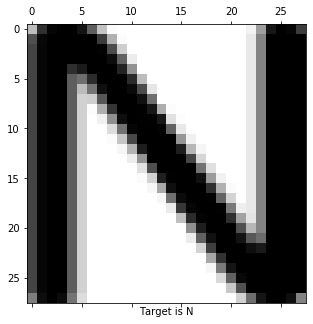

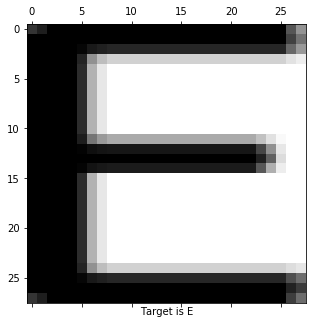

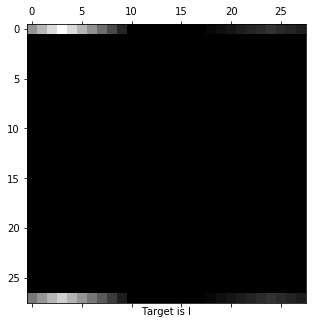

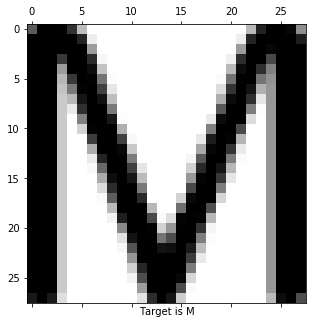

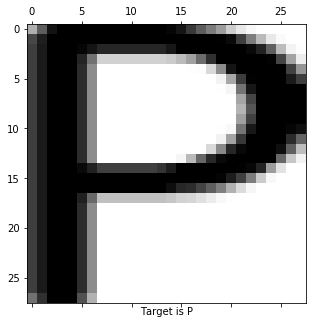

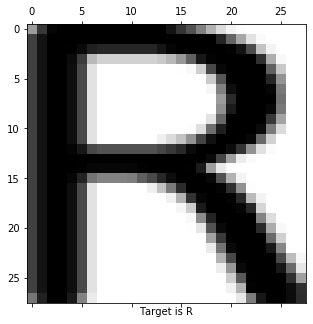

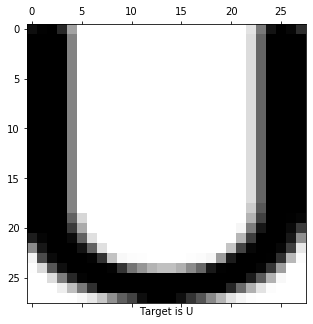

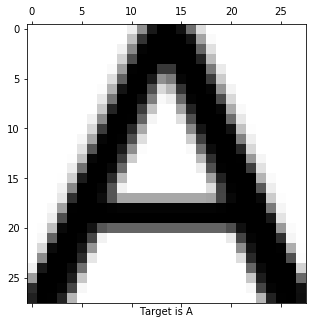

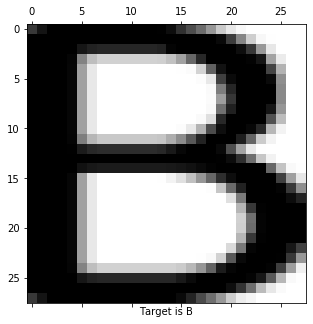

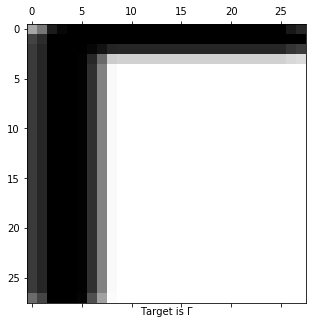

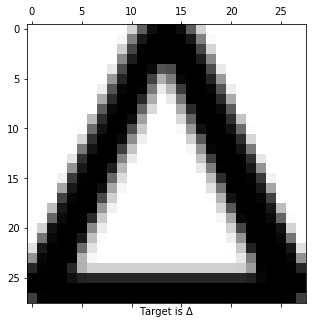

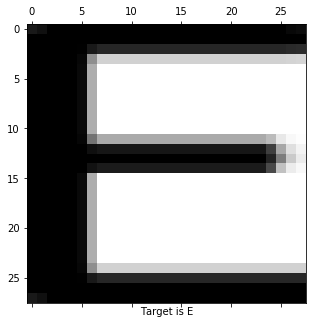

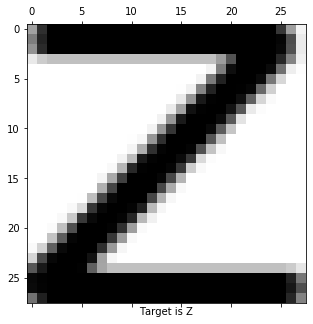

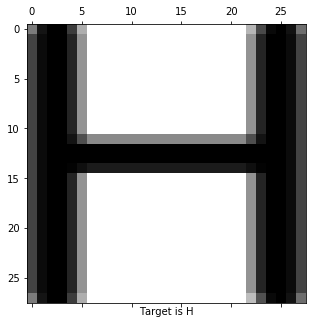

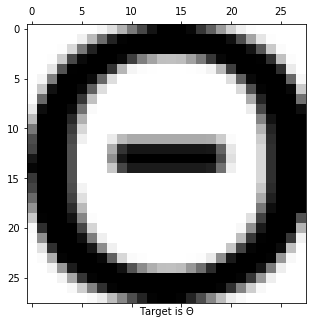

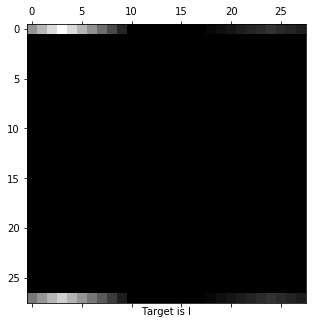

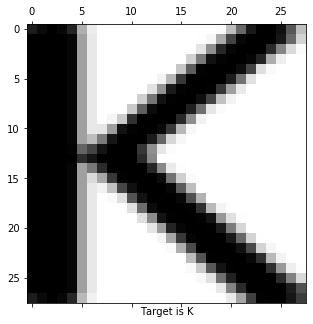

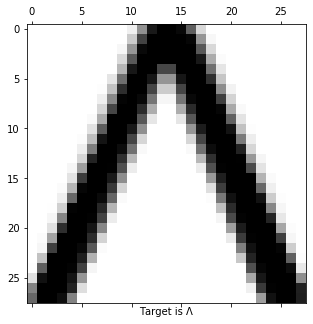

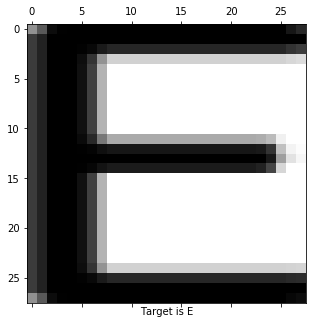

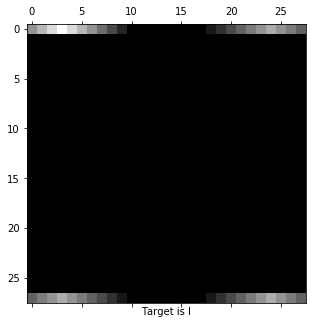

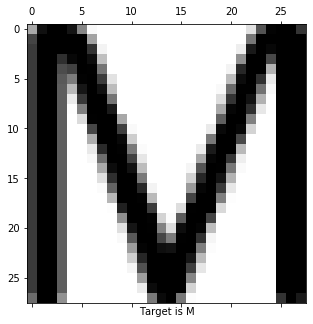

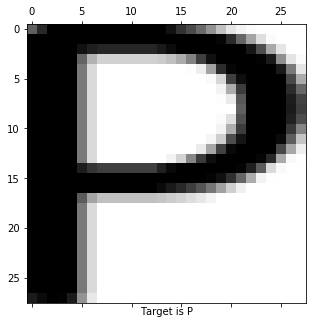

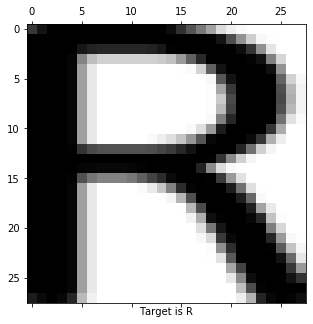

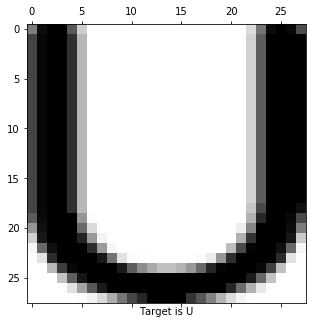

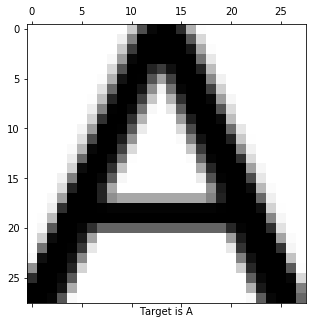

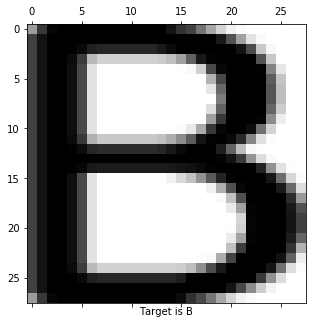

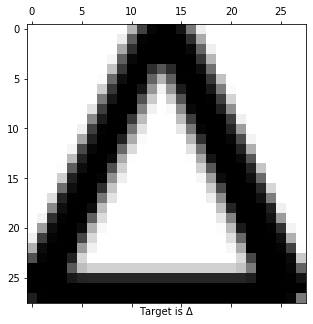

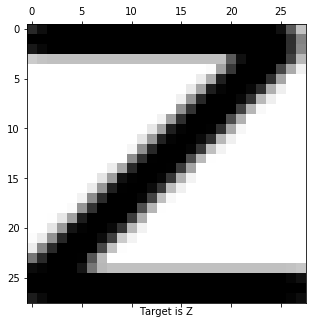

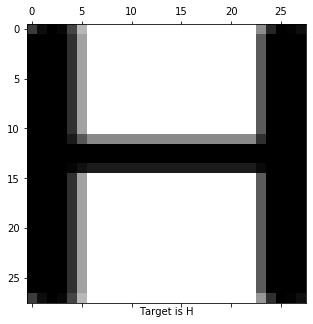

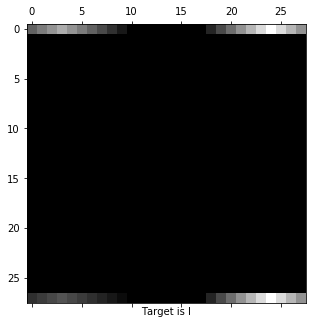

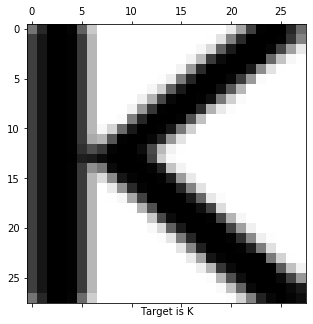

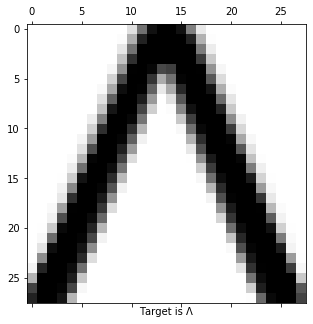

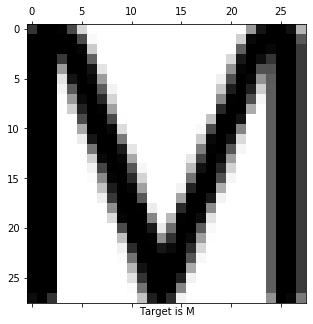

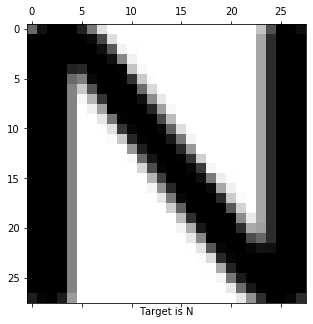

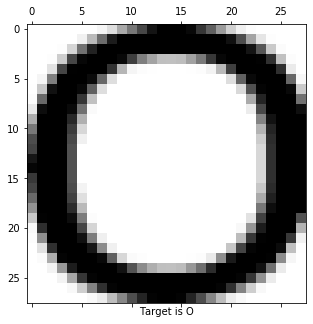

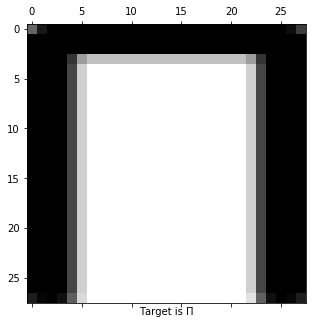

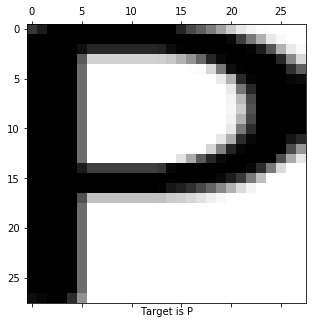

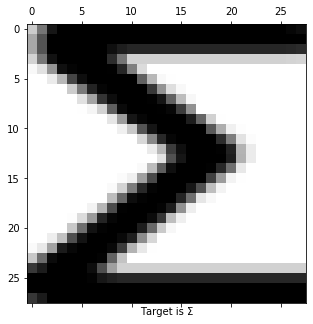

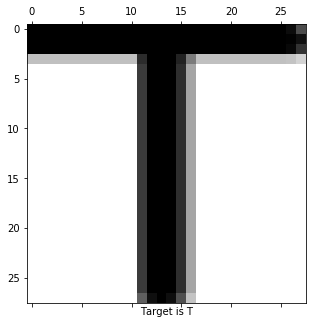

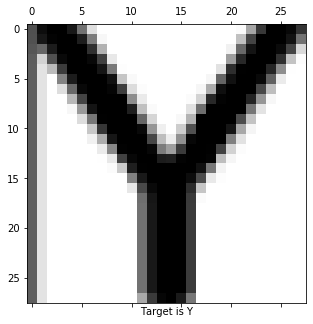

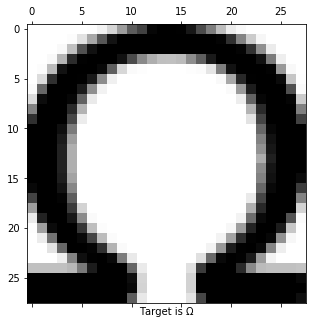

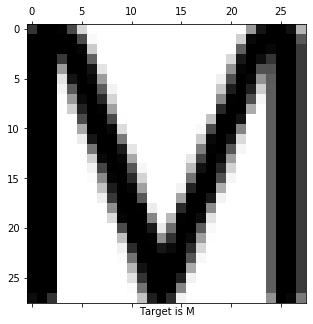

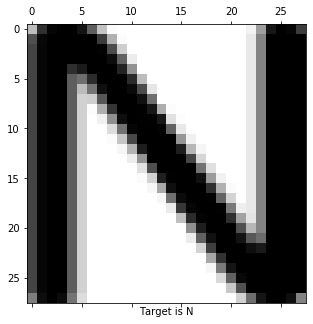

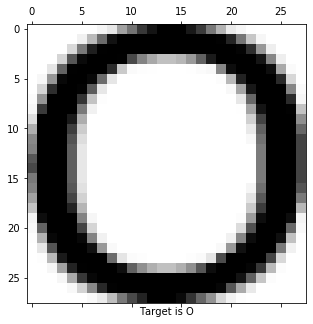

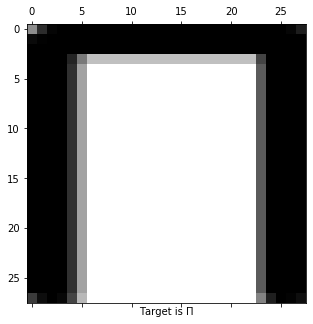

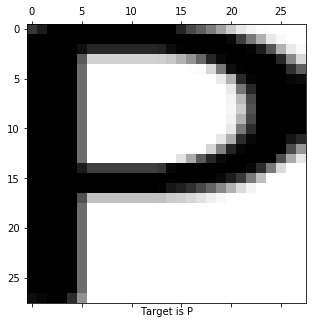

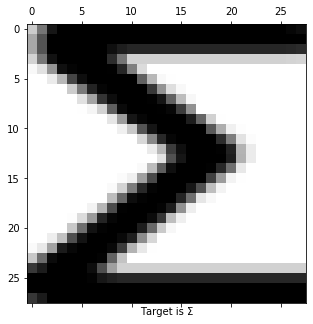

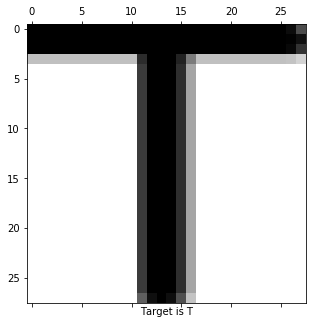

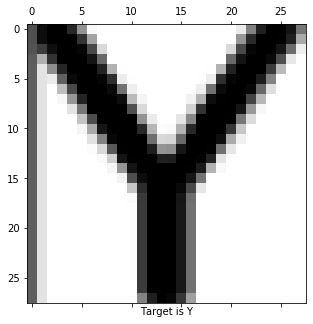

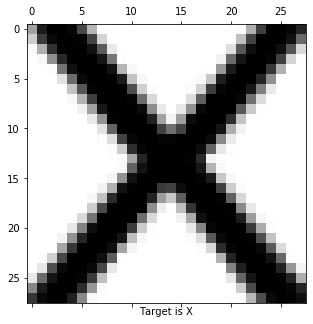

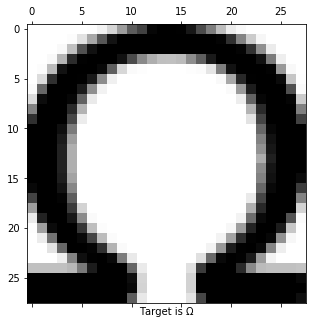

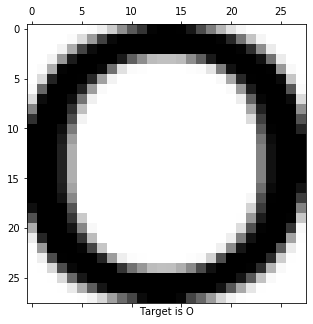

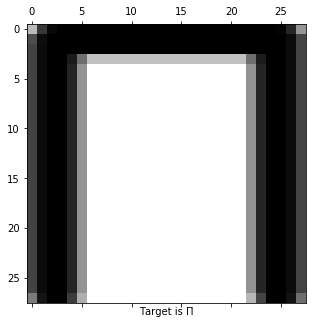

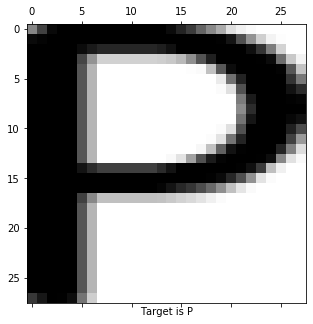

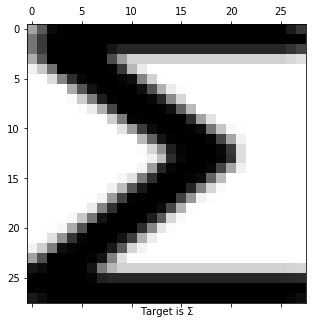

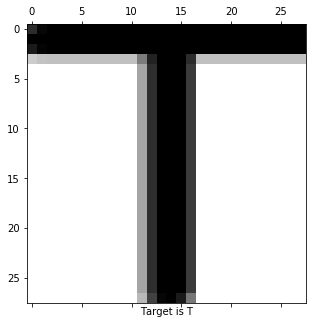

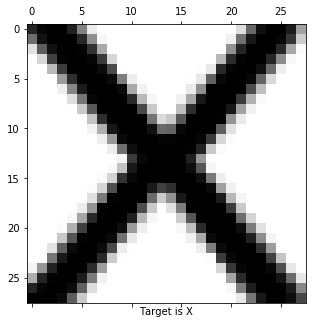

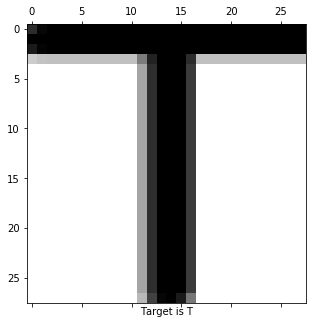

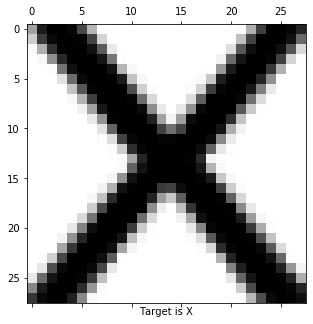

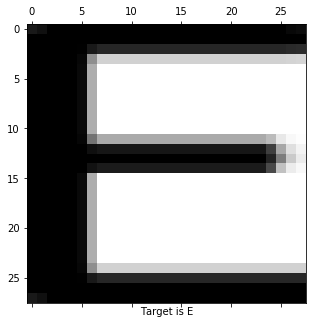

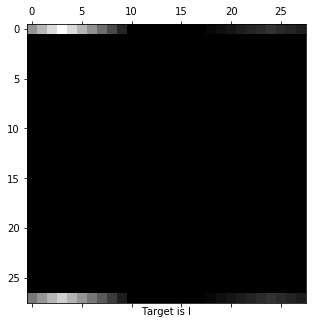

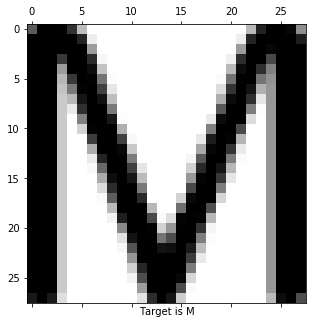

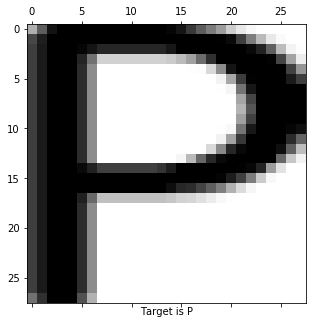

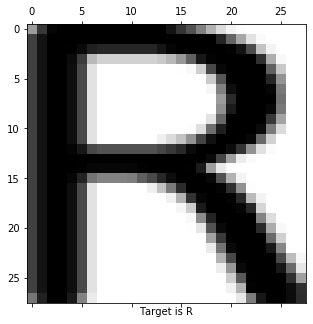

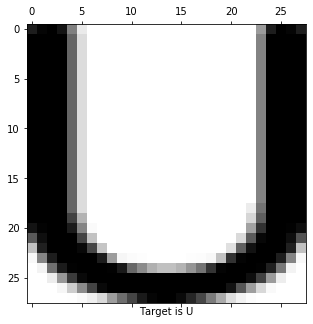

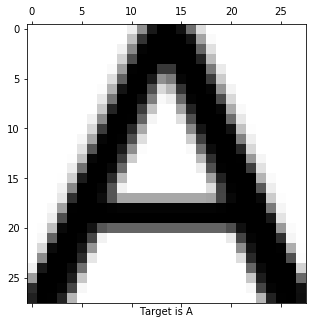

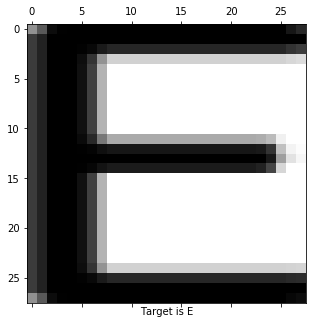

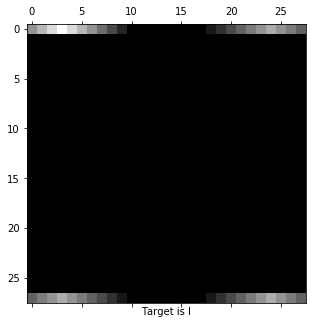

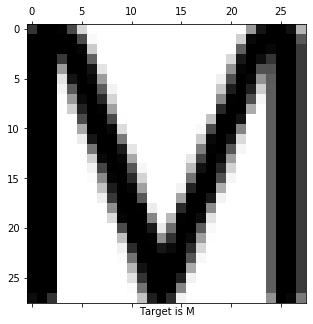

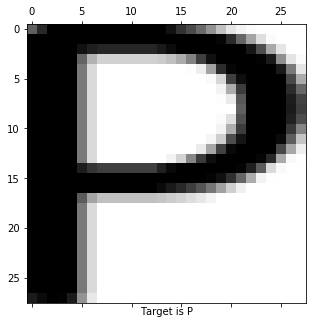

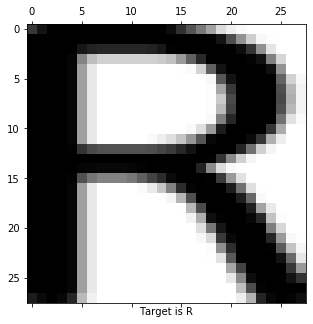

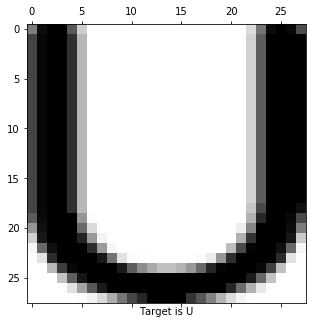

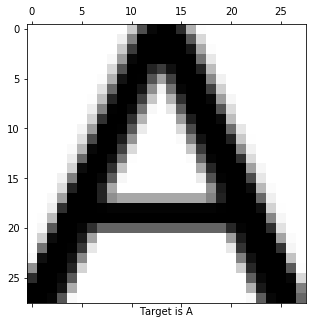

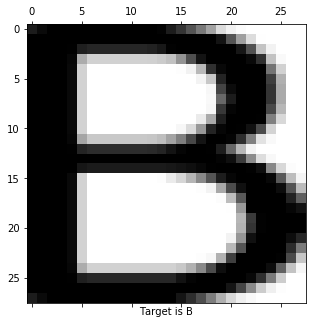

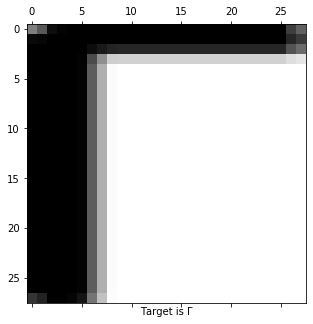

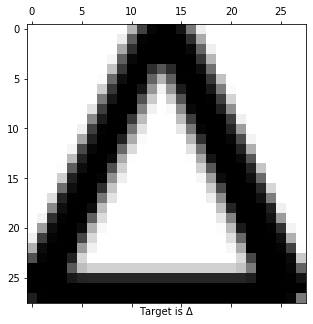

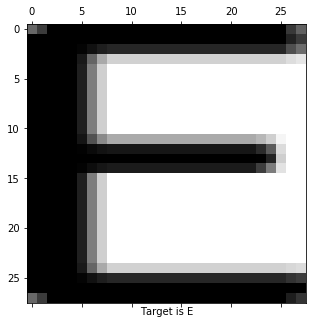

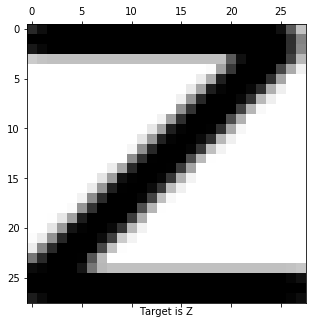

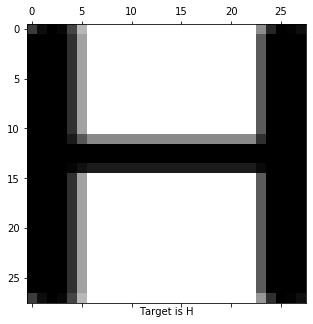

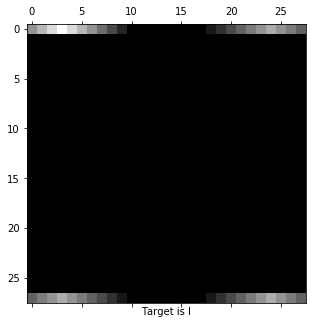

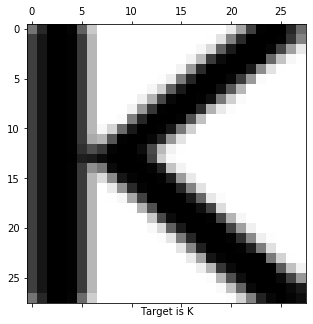

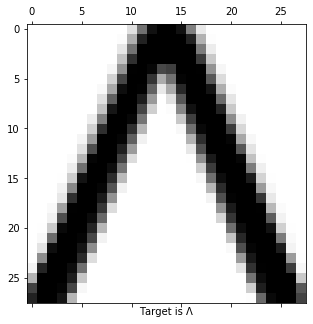

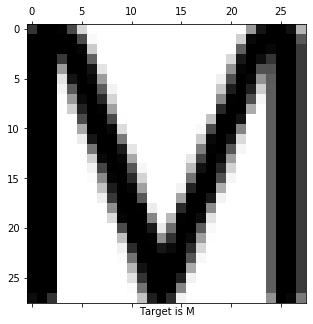

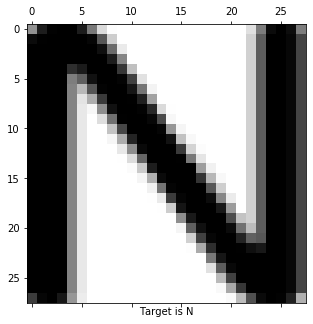

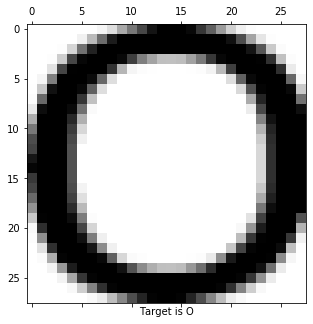

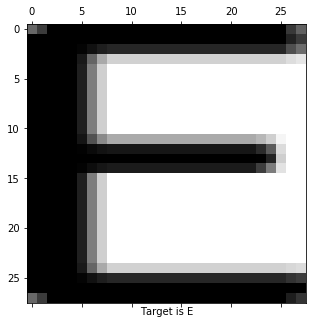

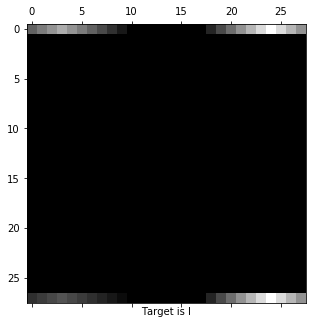

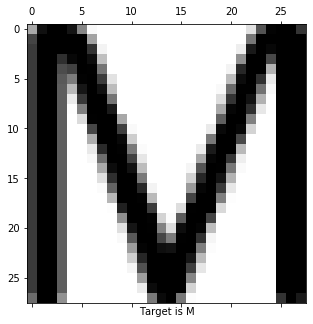

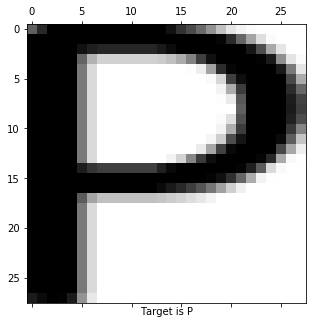

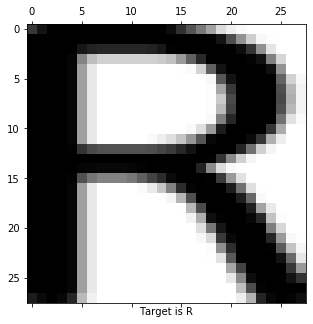

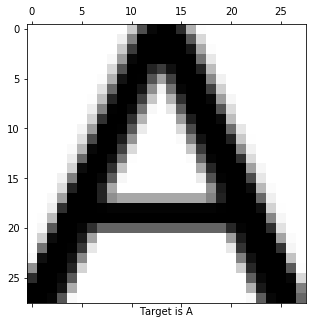

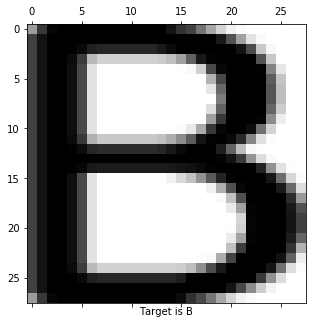

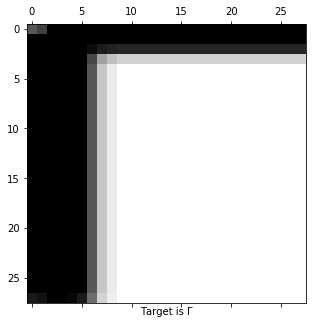

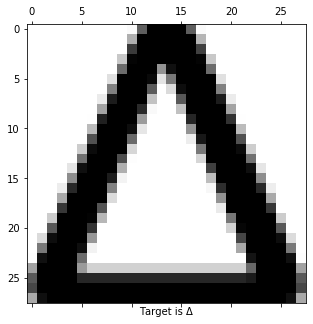

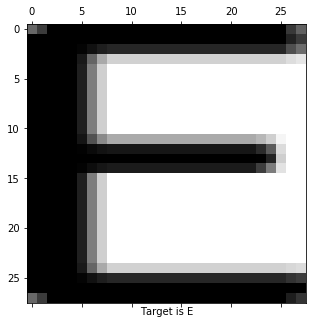

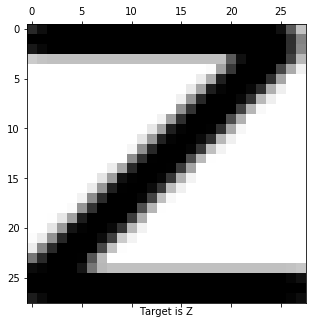

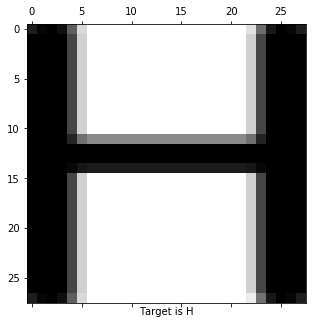

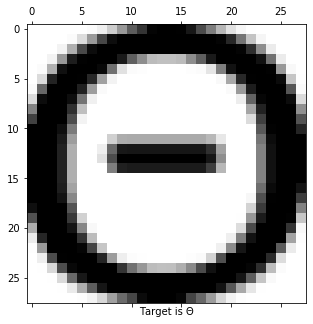

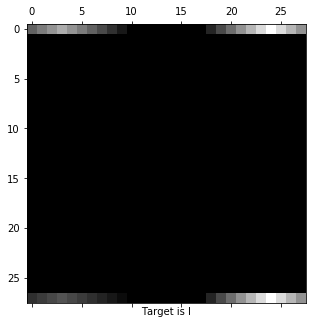

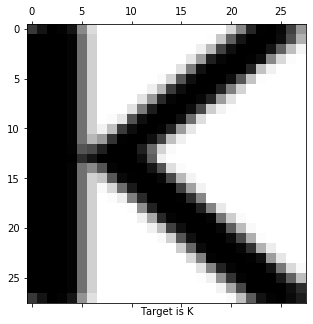

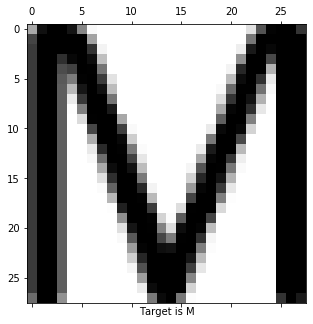

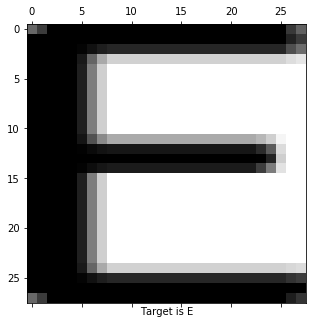

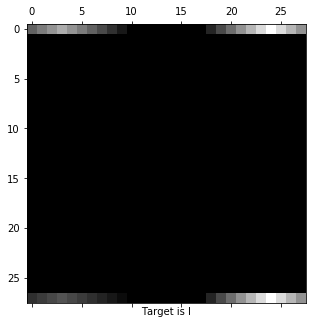

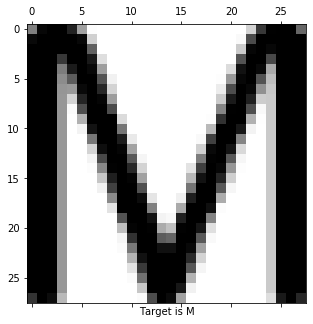

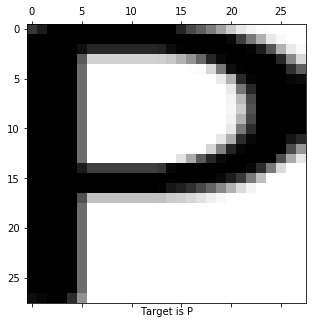

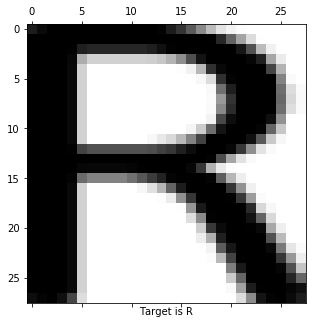

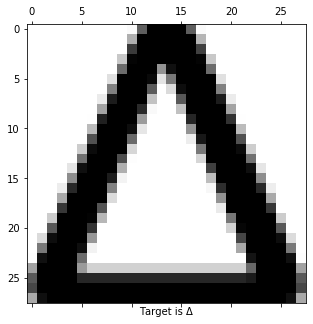

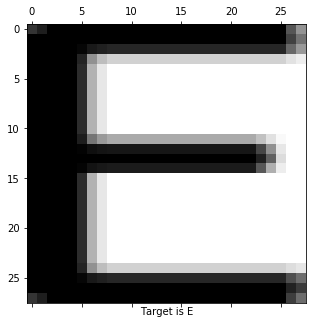

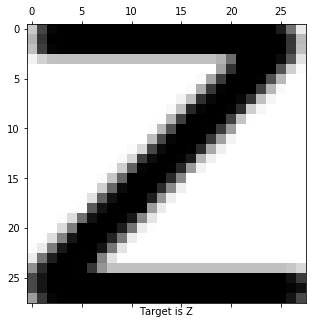

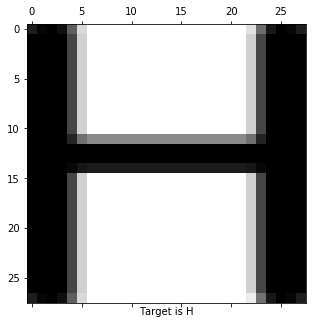

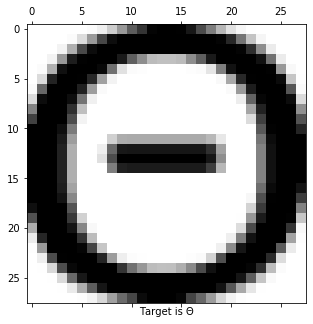

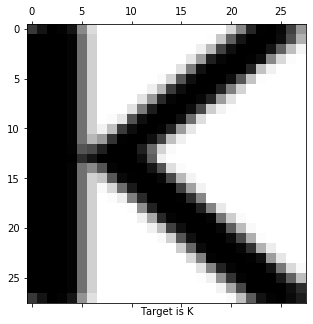

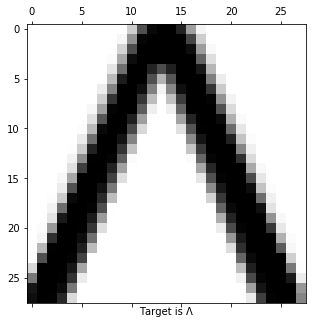

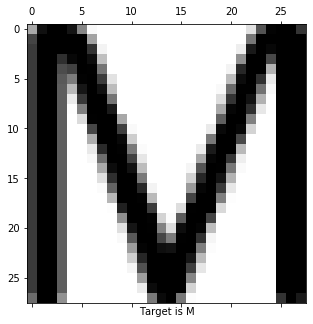

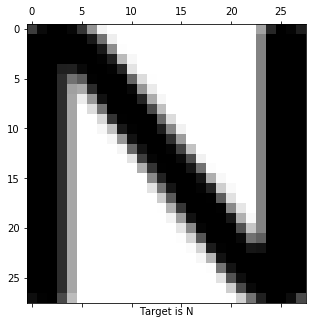

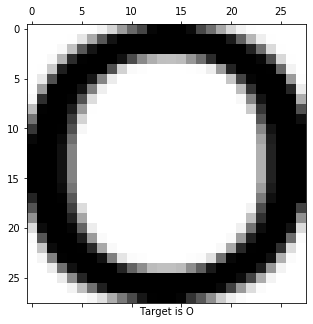

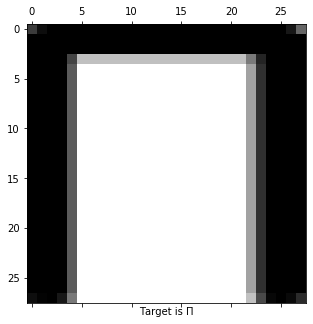

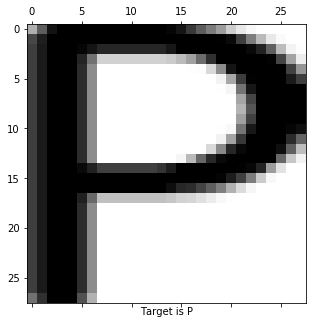

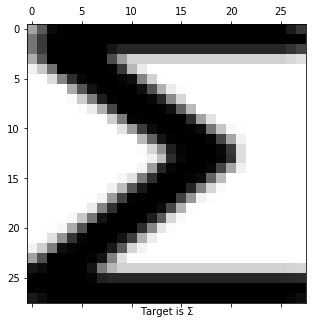

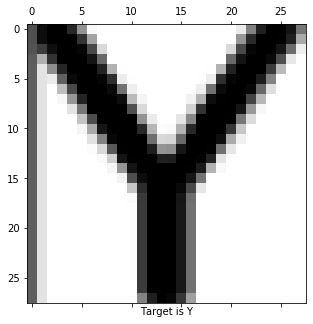

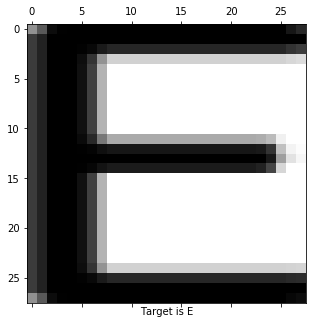

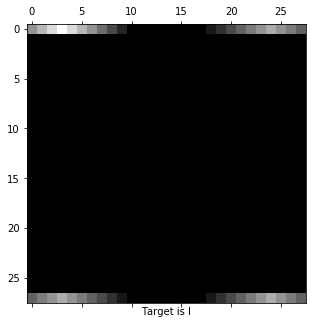

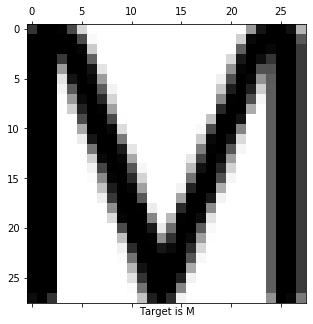

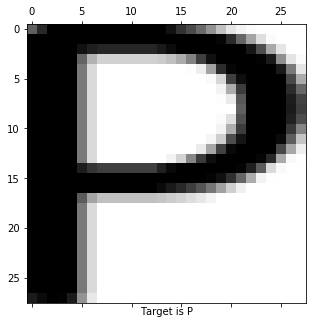

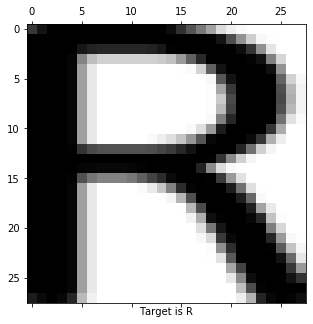

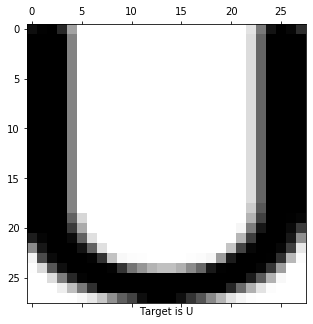

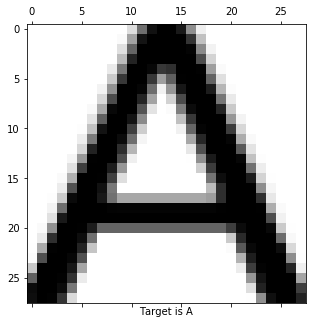

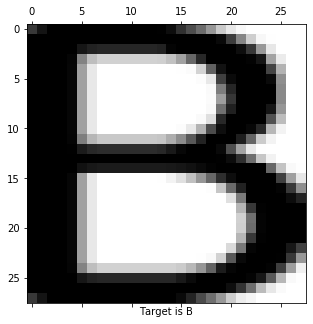

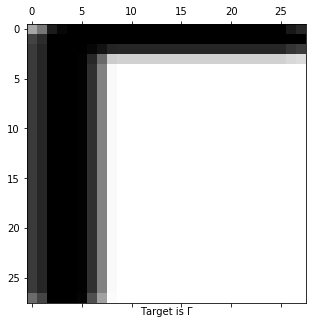

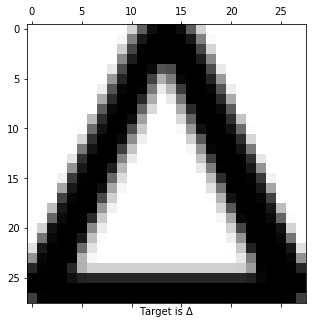

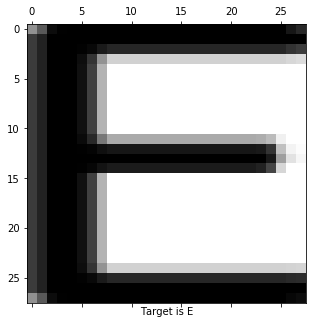

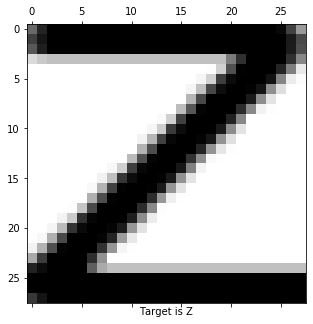

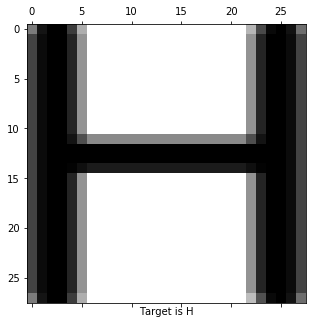

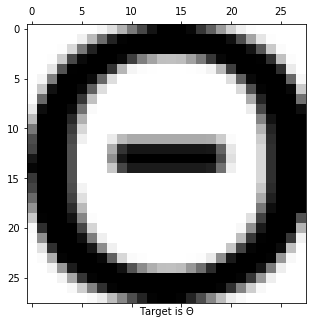

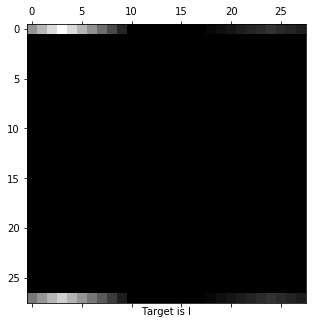

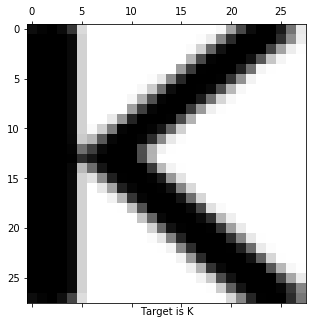

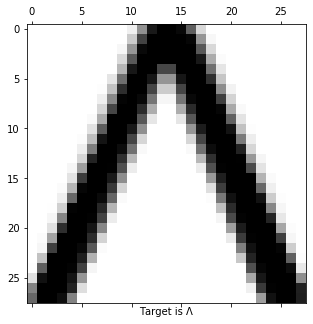

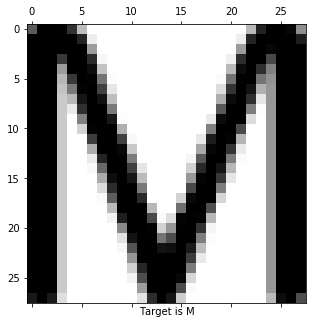

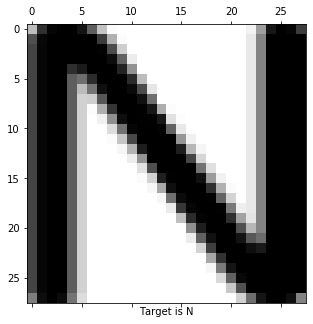

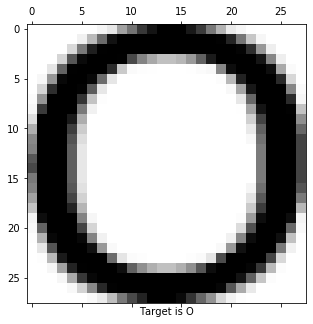

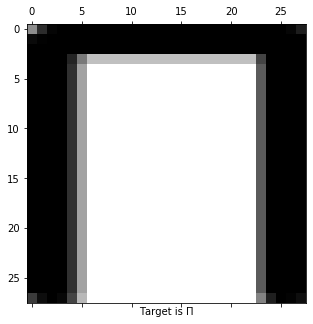

In [4]:
for i in range(0, segments.shape[0]):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Target is ' + train_target[i])

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#read image
img = cv2.imread('writing_extract_greek.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if area>= 12:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

segments = np.array(segments)
print('Segments shape: ', segments.shape)

test = np.reshape(segments, (segments.shape[0], 28*28))
print('Data shape: ', test.shape)

plt.matshow(img)

Segments shape:  (582, 28, 28)
Data shape:  (582, 784)


In [6]:
unique_target = list('ΗΟΜΑΔΑΠΑΙΧΝΙΖΕΙΤΟΠΡΩΤΟΠΑΙΧΝΙΔΙΟΜΠΑΣΚΕΛΤΟΥΤΗΣΝΕΑΣΕΠΟΧΗΣΠΙΣΩΑΥΤΟΕΙΝΑΙΤΟΠΕΡΙΣΣΟΤΕΡΟΓΙΑΤΟΠΕΡΙΣΣΟΤΕΡΟΤΟΥΧΑΝΟΥΝΕΝΑΝΑΡΙΣΤΗΟΜΑΔΑΠΟΥΕΧΕΙΚΟΝΤΑΣΤΟΠΡΩΤΟΤΥΠΟΤΗΝΟΜΑΔΑΠΟΥΕΙΝΑΙΔΥΝΑΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΗΟΜΑΔΑΠΕΡΙΣΣΟΤΕΡΑΧΟΡΗΓΕΙΕΣΚΑΙΣΚΟΡΕΙΟΚΤΩΟΚΤΙΕΙΝΑΙΑΡΙΣΤΕΡΑΔΥΟΔΥΟΠΛΑΙΣΙΑΠΟΥΕΧΟΥΝΤΗΝΑΛΛΗΟΜΑΔΑΣΤΟΗΛΕΚΤΡΟΝΟΛΟΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΤΕΛΕΙΟΜΕΤΟUMPIREΠΡΑΓΜΑΤΟΠΟΙΗΣΗΜΙΑΚΑΛΗΚΛΗΣΗΤΡΟΠΟΣΟΜΠΛΕΟΙΜΠΟΡΕΙΝΑΕΧΟΥΝΠΡΑΓΜΑΤΙΚΑΝΑΚΟΝΤΑΙΤΟΠΑΙΧΝΙΔΙΔΕΝΕΙΝΑΙΑΥΤΟΚΙΝΗΤΟΑΛΛΑΕΙΝΑΙΤΟΜΠΛΕΠΟΥΝΑΕΙΝΑΙΩΣΕΧΟΥΝΛΟΓΩΣΤΟΠΡΩΤΑΘΛΗΜΑΕΙΔΙΚΑΕΑΝΘΑΣΥΝΕΧΟΥΝΒΕΛΤΙΩΣΗΔΟΥΝΟΥΝΣΚΛΗΡΟΟΛΟΤΟΧΡΟΝΟΓΙΑΠΡΑΚΤΙΚΗΚΑΙΠΡΑΚΤΙΚΗΟΤΑΝΤΟΕΠΟΜΕΝΟΠΑΙΧΝΙΖΟΥΝΘΑΚΕΡΔΟΥΝΚΑΙΕΧΟΥΝ')

test_target = []
for i in unique_target:
    test_target.append(i)
    
test_target = np.array(test_target)

In [7]:
n_samples = len(test)

In [8]:
X_train = training
y_train = train_target
X_val = test[:round(.8 * n_samples)]
y_val = test_target[:round(.8 * n_samples)]
X_test = test[round(.8 * n_samples):]
y_test = test_target[round(.8 * n_samples):]

In [9]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
from sklearn.metrics import confusion_matrix

y_val_pred = svc_clf.predict(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

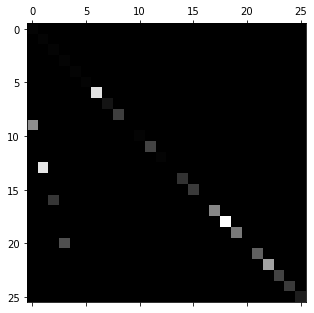

In [11]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, hamming_loss
from sklearn.metrics import classification_report

print("Precision: " + str(precision_score(y_val, y_val_pred, average = 'micro')))
print("Recall: " + str(recall_score(y_val, y_val_pred, average = 'micro')))
print("F1 Score: " + str(f1_score(y_val, y_val_pred, average = 'micro')))
print("Hamming Loss: " + str(hamming_loss(y_val, y_val_pred)))
print("Accuracy Score: " + str(accuracy_score(y_val, y_val_pred)))

#Checking performance our model with classification report.
print(classification_report(y_val, y_val_pred))

Precision: 0.740343347639485
Recall: 0.740343347639485
F1 Score: 0.740343347639485
Hamming Loss: 0.259656652360515
Accuracy Score: 0.740343347639485
              precision    recall  f1-score   support

           E       0.03      1.00      0.06         1
           I       0.02      1.00      0.04         1
           M       0.07      1.00      0.13         1
           P       0.05      1.00      0.10         1
           R       1.00      1.00      1.00         1
           U       1.00      1.00      1.00         1
           Α       1.00      1.00      1.00        54
           Γ       1.00      1.00      1.00         5
           Δ       1.00      1.00      1.00        15
           Ε       0.00      0.00      0.00        34
           Ζ       1.00      1.00      1.00         1
           Η       1.00      1.00      1.00        16
           Θ       1.00      1.00      1.00         1
           Ι       0.00      0.00      0.00        55
           Κ       1.00      1.00      1

## ROC Curves

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
bin_y_train = label_binarize(y_train, classes=list(np.unique(y_train)))

# Binarize the output
bin_y_val = label_binarize(y_val, classes=list(np.unique(y_val)))
n_classes = bin_y_val.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=42))
y_roc = classifier.fit(X_val, y_val).decision_function(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(bin_y_val[:, i], y_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(bin_y_val.ravel(), y_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


No handles with labels found to put in legend.


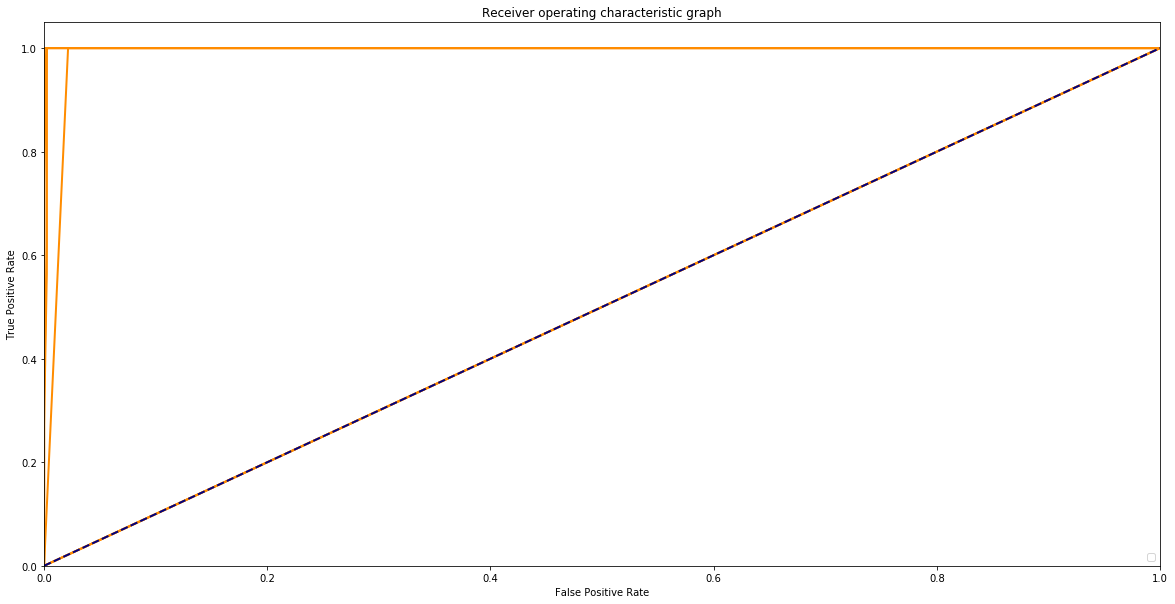

In [14]:
plt.figure(figsize = (20,10))
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic graph')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


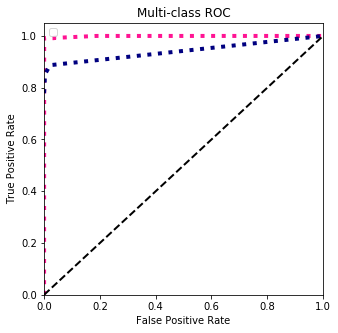

In [15]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend()
plt.show()

## Hyper-parameter tuning

In [16]:
accuracy = []
error = []
for i in [0.1,0.2,0.5, 1, 10, 100]:
    svm_clf_loop = SVC(C = i)
    svm_clf_loop.fit(X_train, y_train)

    y_val_pred = svm_clf_loop.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    loss = hamming_loss(y_val, y_val_pred)
    accuracy.append(score)
    error.append(loss)

In [17]:
plt.plot([0.1,0.2,0.5, 1, 10, 100], accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy changes when C is increased')

Text(0.5, 1.0, 'Accuracy changes when C is increased')

In [18]:
plt.plot([0.1,0.2,0.5, 1, 10, 100], error)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Error changes when C is increased')

Text(0.5, 1.0, 'Error changes when C is increased')

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
hyper_parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [21]:
clf = GridSearchCV(SVC(), hyper_parameters, scoring='accuracy', cv=5)

In [22]:
clf.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
clf.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}

## Predict from test

#### Using the best params

In [24]:
svc_clf = SVC(C = 0.1, gamma = 0.01, kernel = 'poly')
svc_clf.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = svc_clf.predict(test)

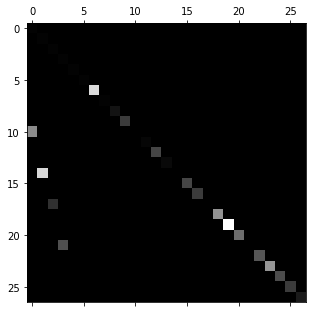

In [26]:
plt.matshow(confusion_matrix(test_target, y_pred), cmap=plt.cm.gray)

In [27]:
print("Precision: " + str(precision_score(test_target, y_pred, average = 'micro')))
print("Recall: " + str(recall_score(test_target, y_pred, average = 'micro')))
print("F1 Score: " + str(f1_score(test_target, y_pred, average = 'micro')))
print("Hamming Loss: " + str(hamming_loss(test_target, y_pred)))
print("Accuracy Score: " + str(accuracy_score(test_target, y_pred)))

Precision: 0.7491408934707904
Recall: 0.7491408934707904
F1 Score: 0.7491408934707904
Hamming Loss: 0.2508591065292096
Accuracy Score: 0.7491408934707904


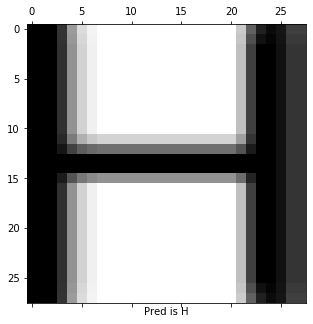

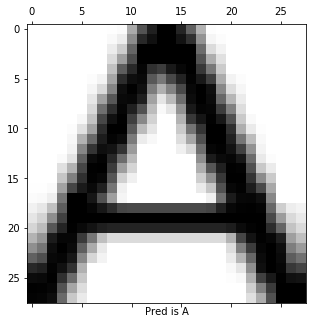

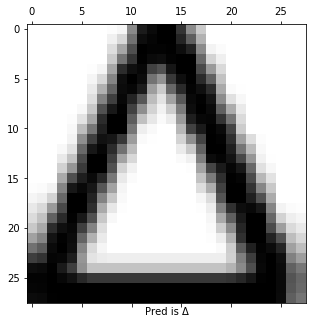

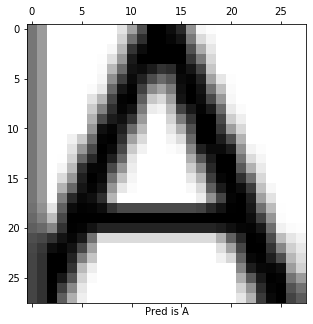

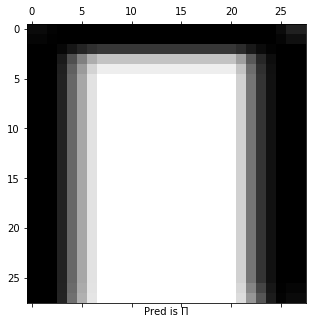

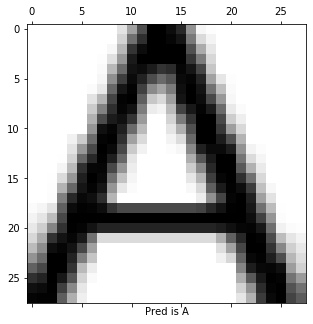

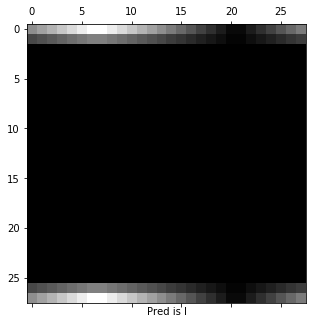

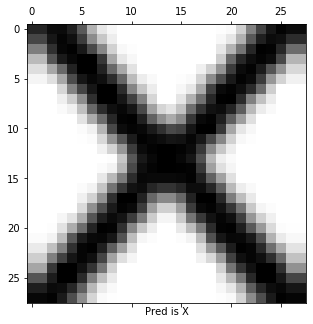

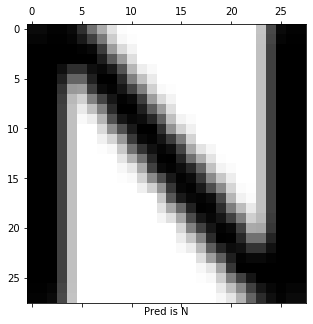

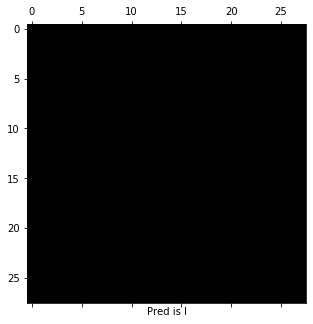

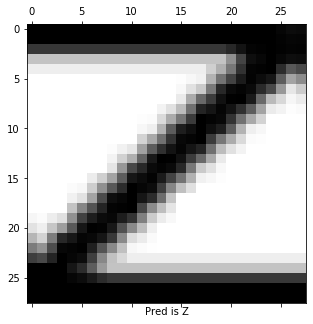

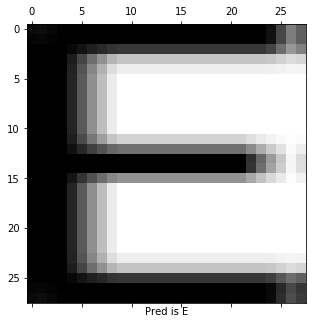

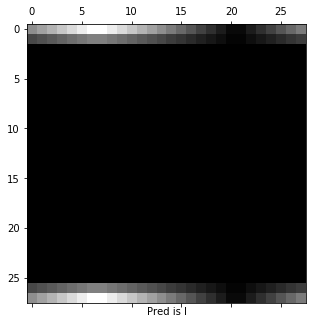

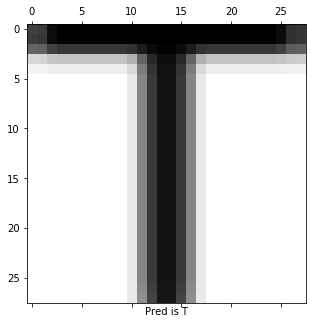

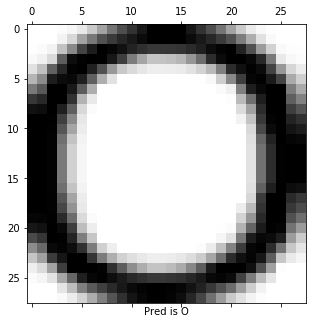

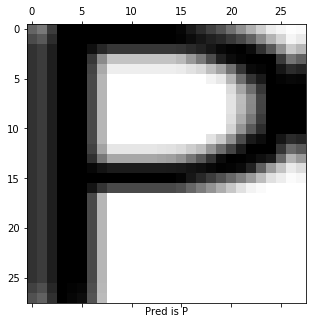

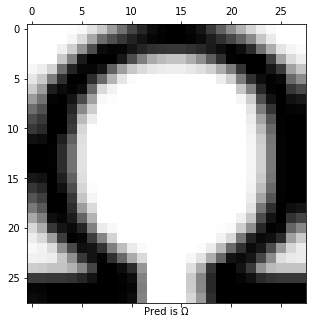

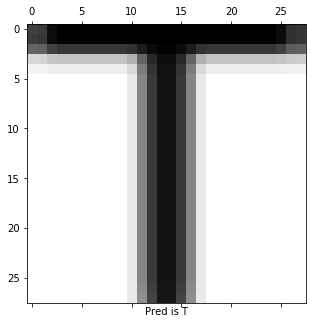

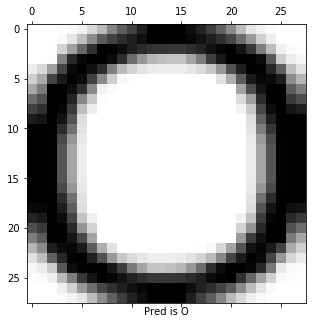

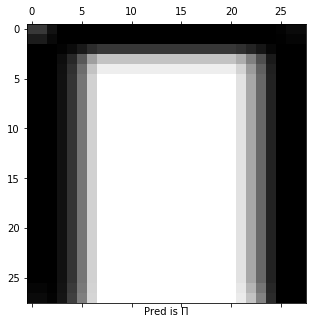

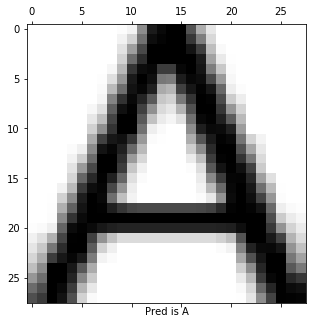

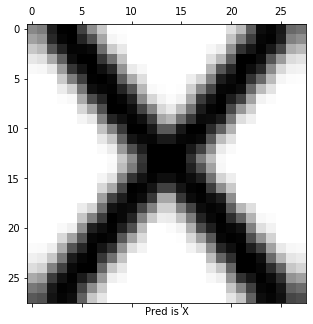

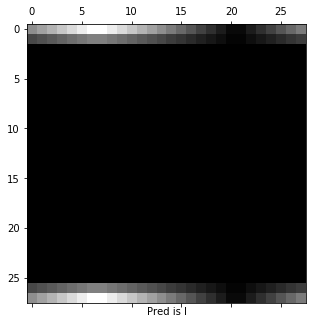

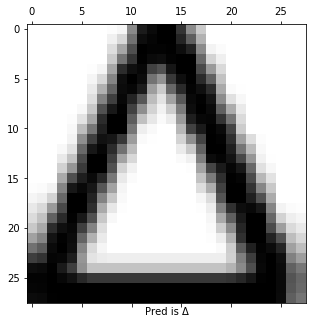

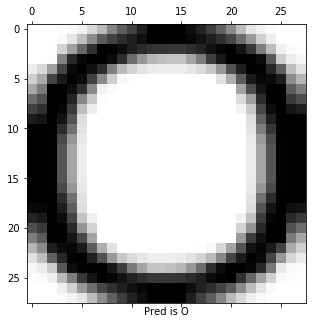

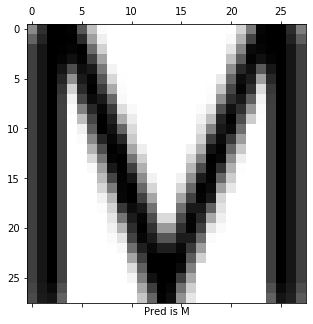

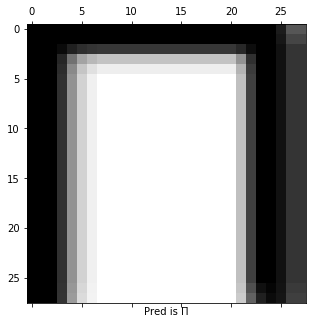

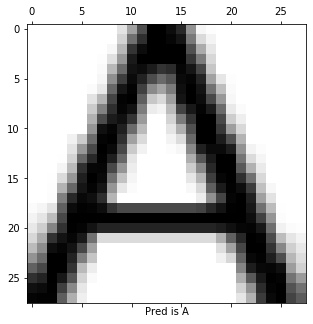

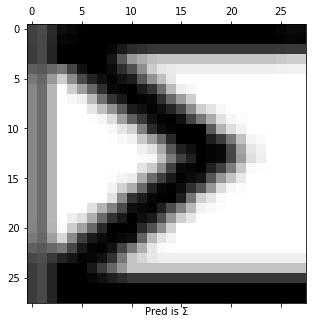

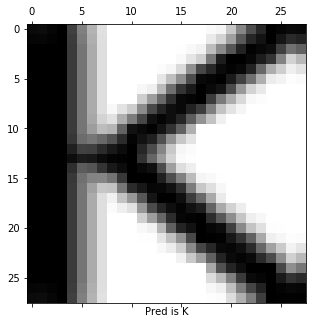

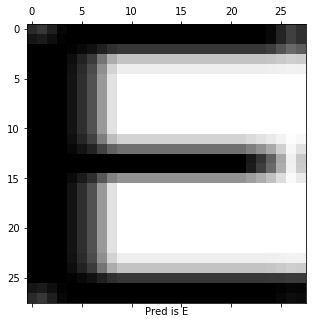

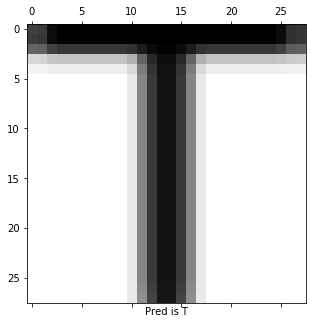

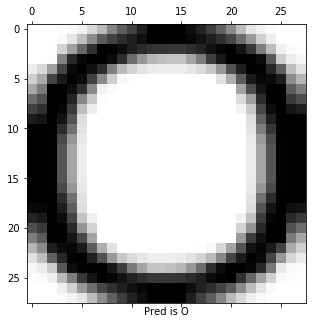

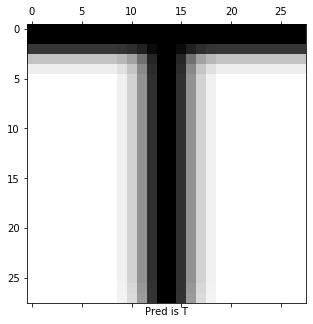

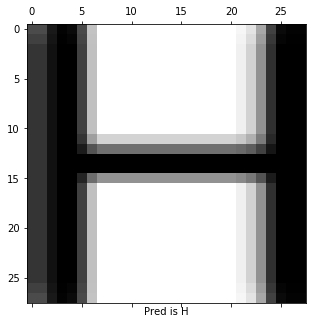

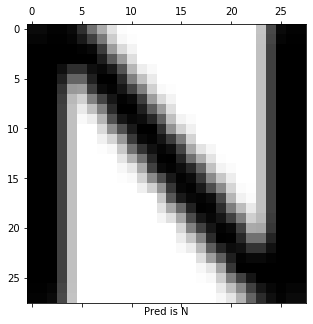

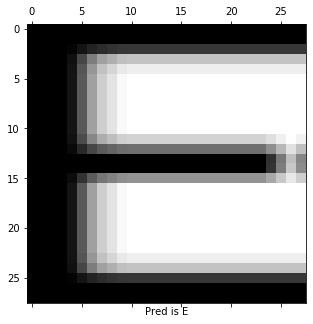

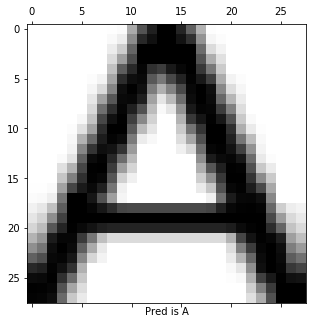

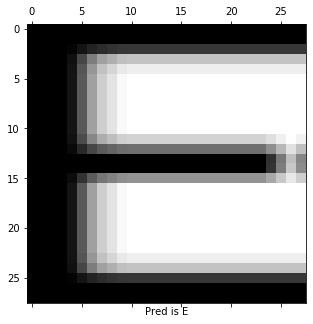

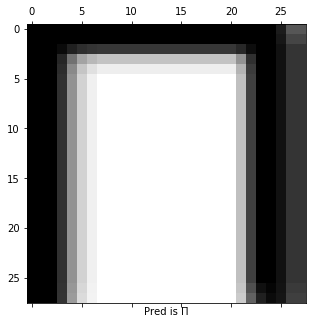

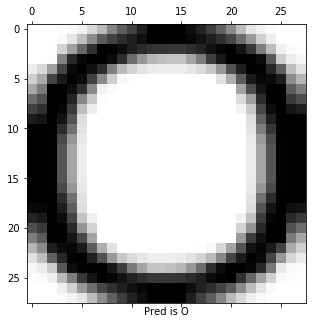

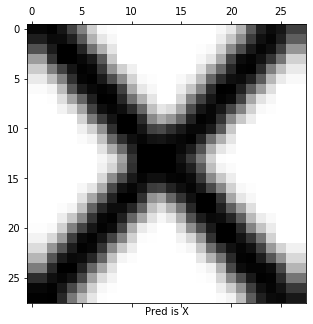

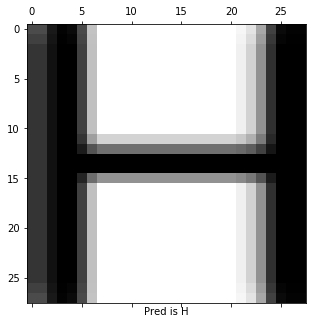

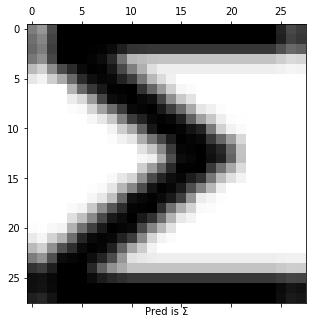

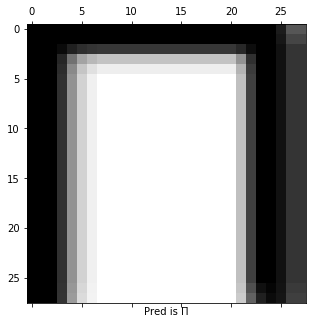

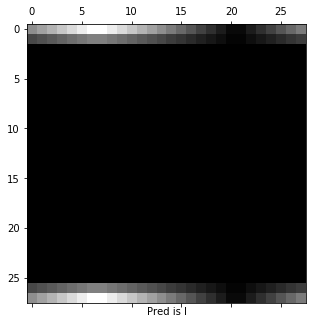

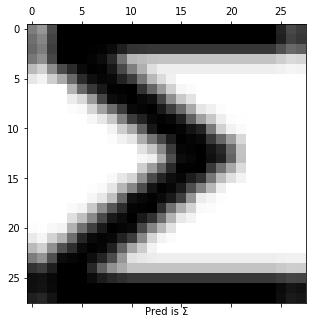

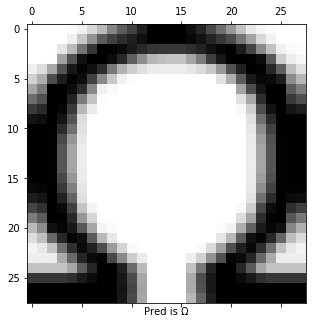

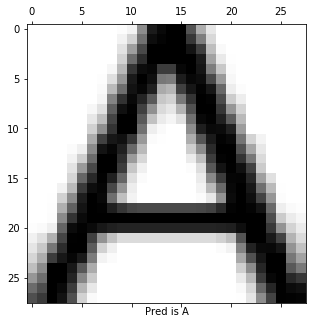

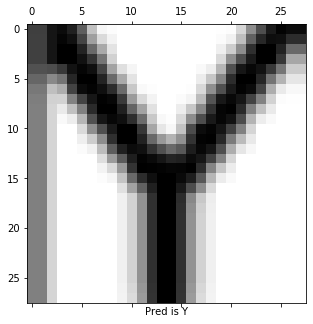

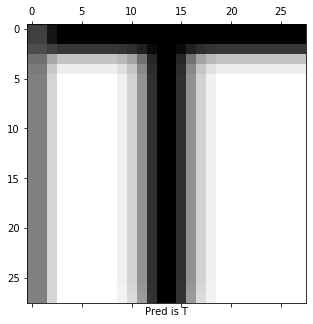

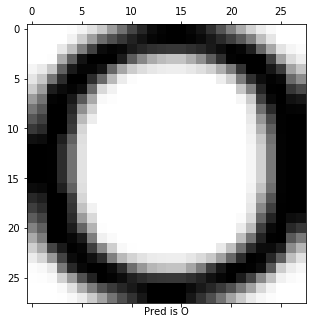

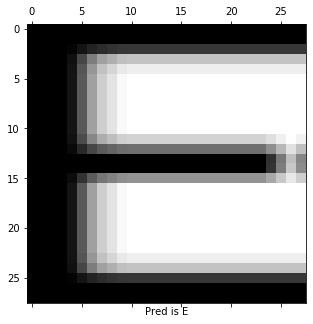

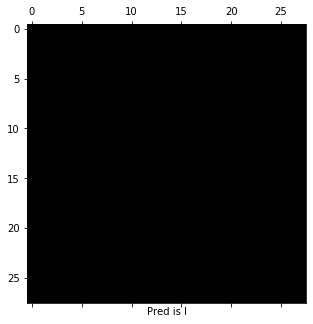

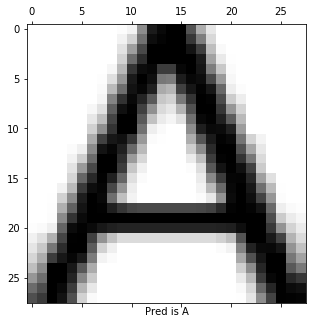

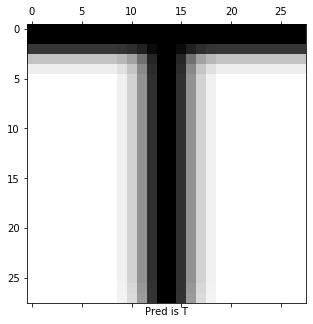

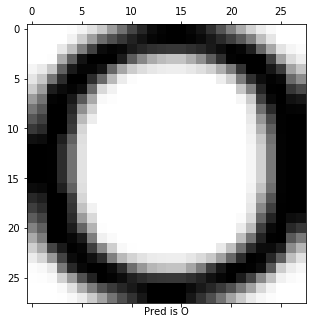

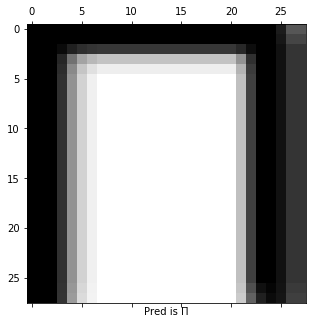

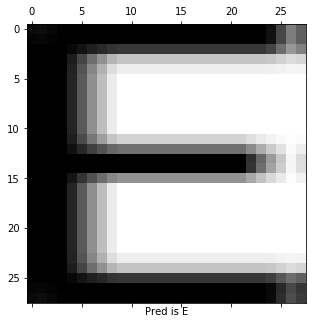

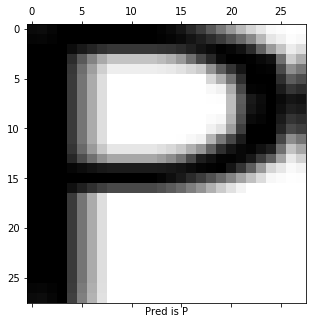

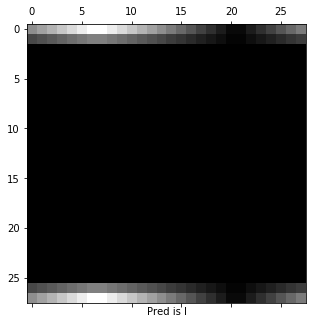

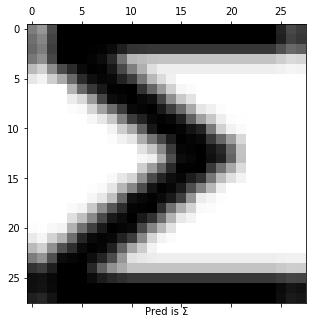

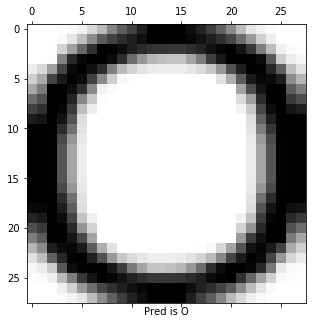

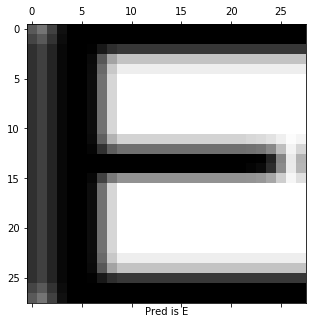

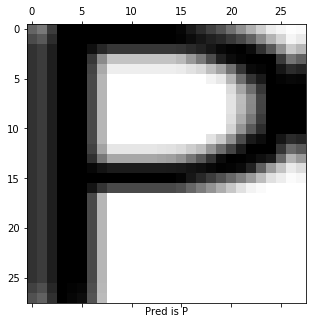

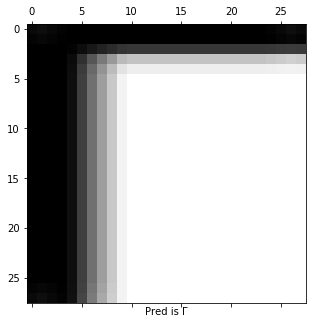

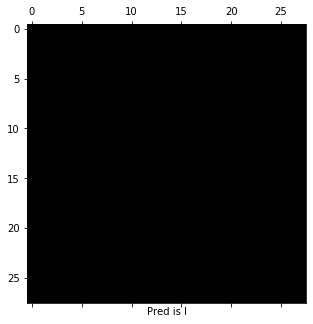

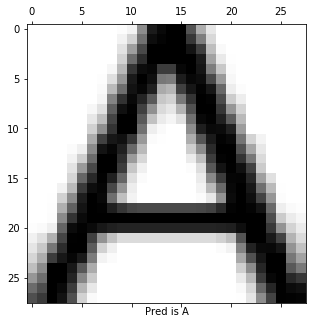

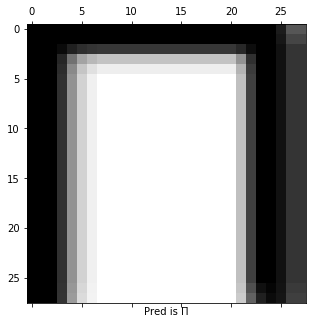

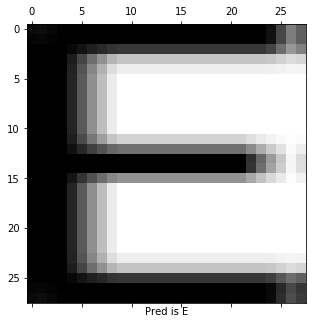

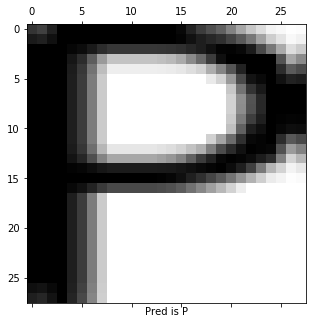

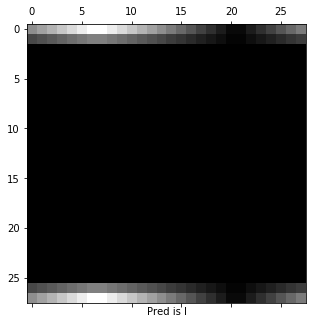

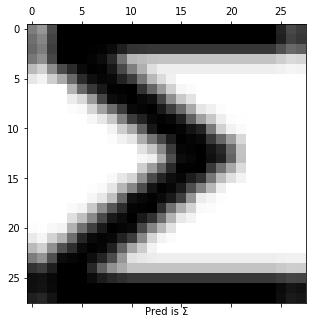

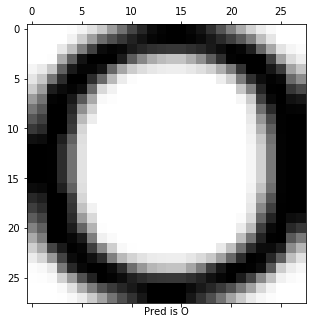

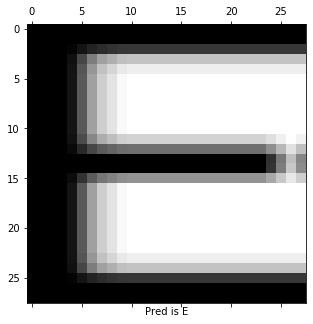

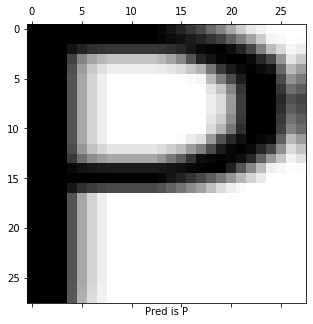

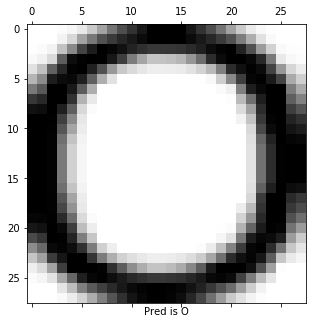

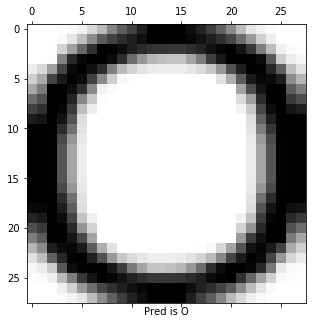

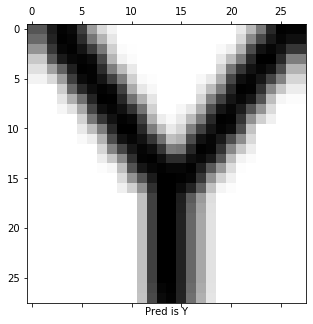

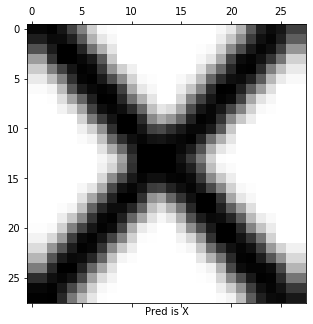

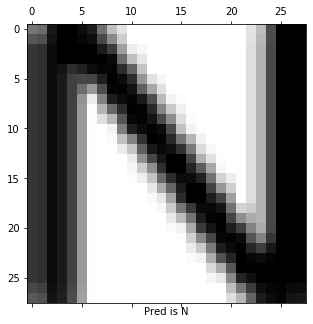

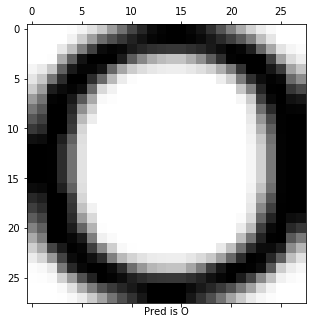

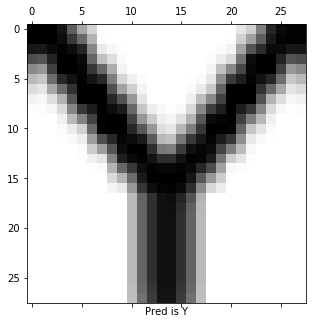

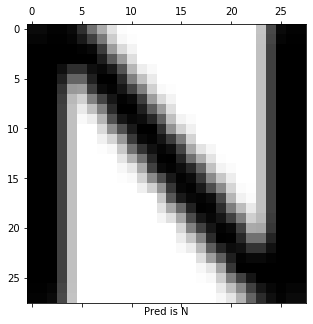

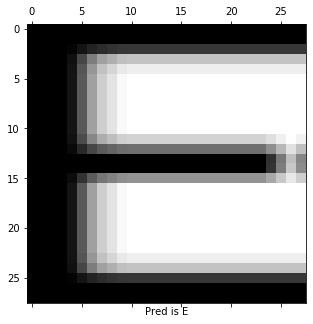

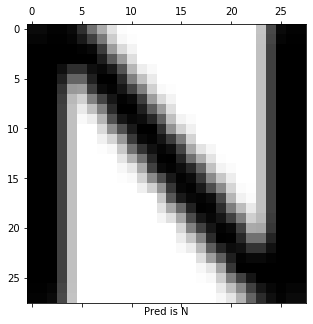

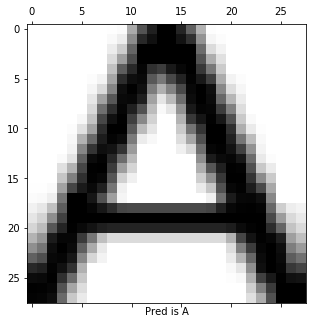

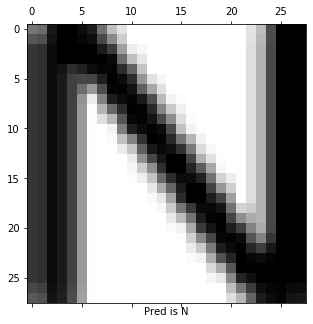

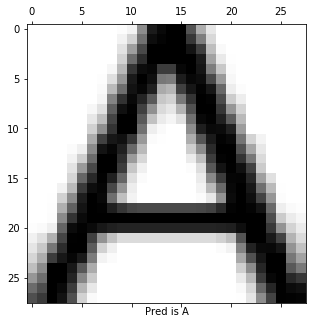

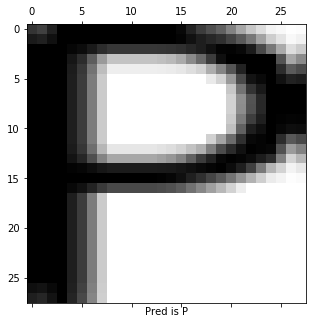

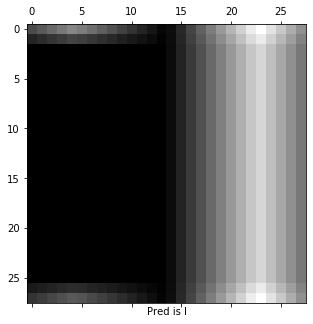

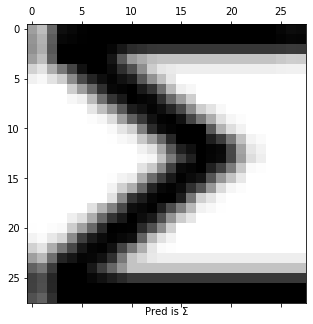

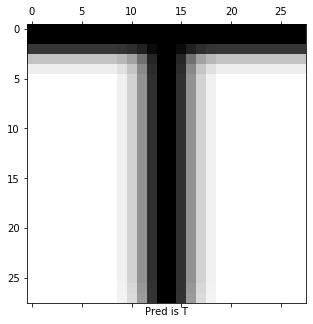

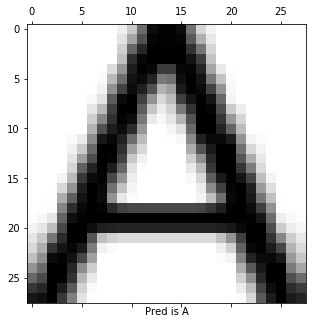

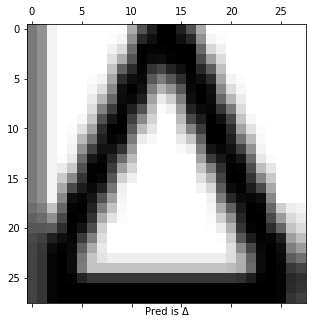

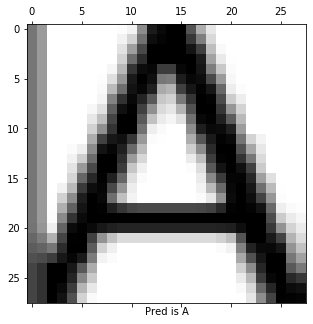

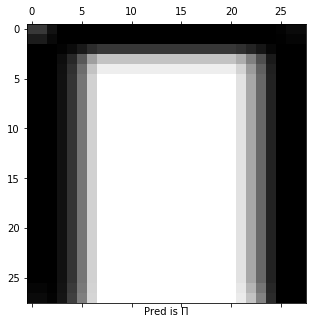

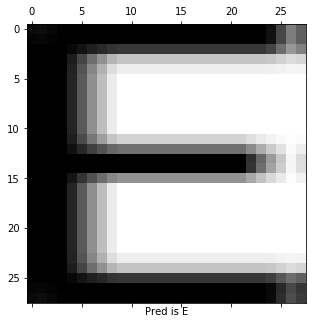

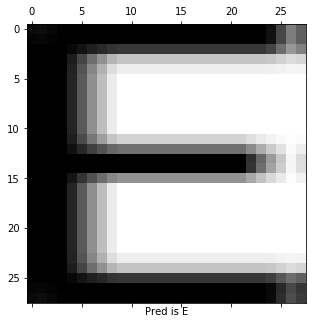

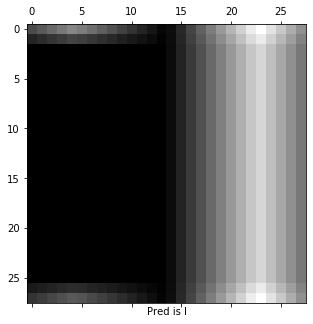

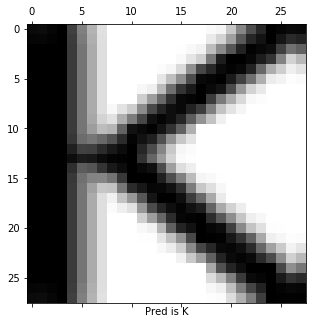

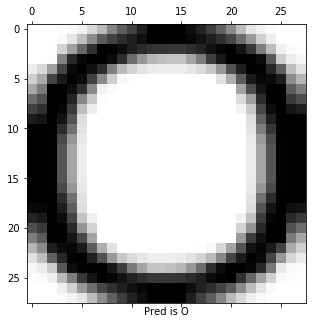

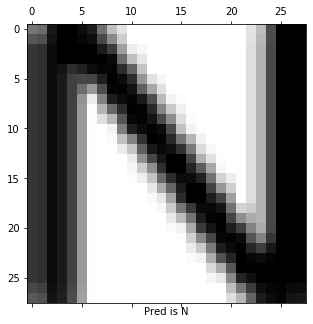

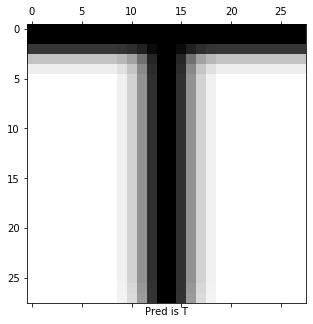

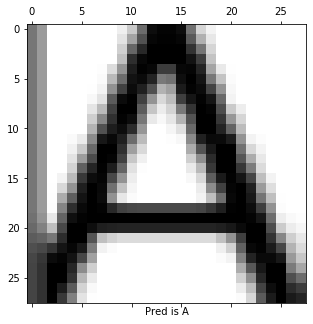

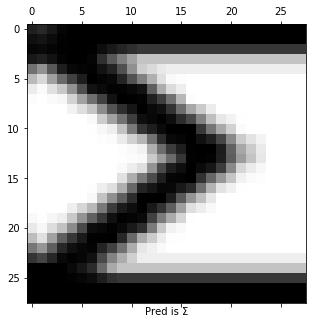

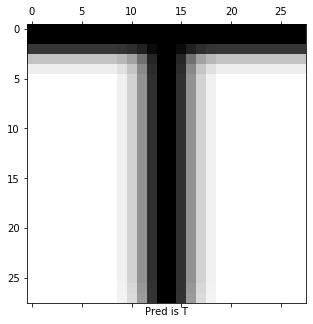

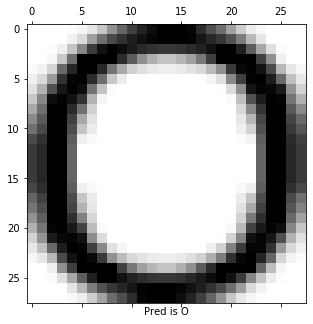

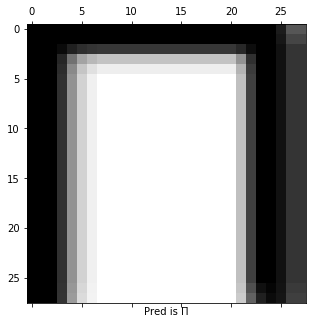

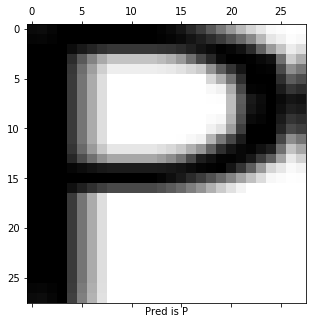

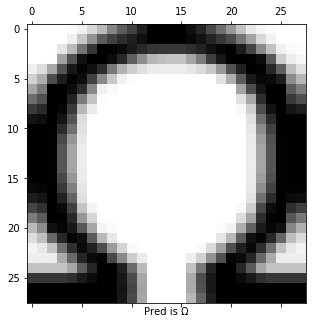

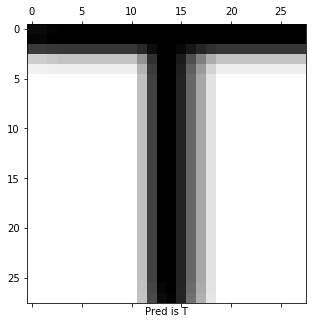

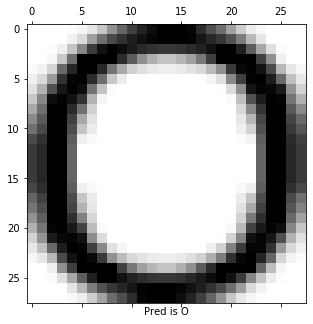

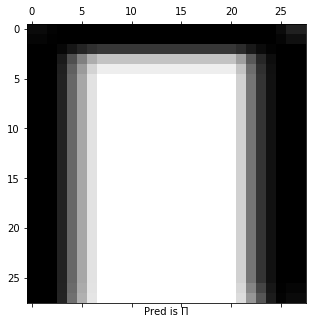

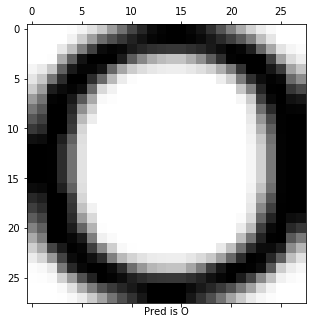

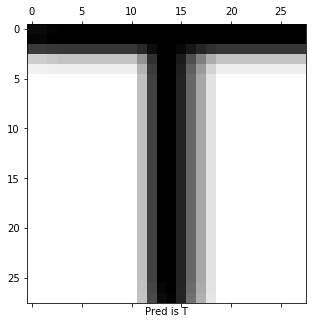

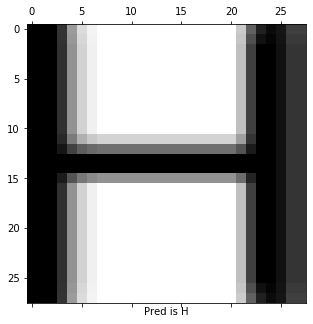

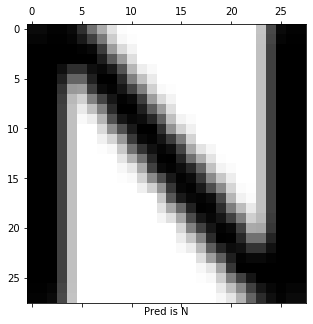

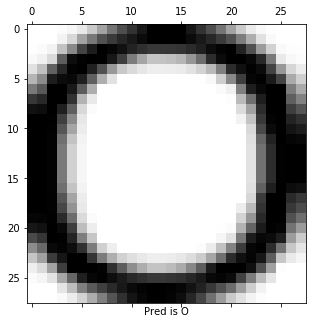

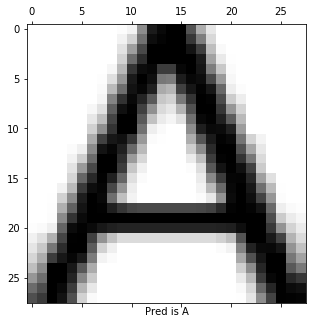

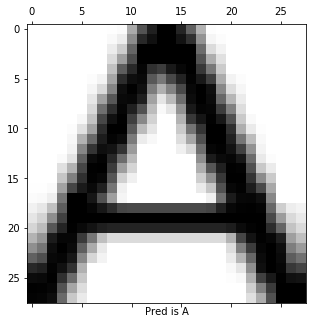

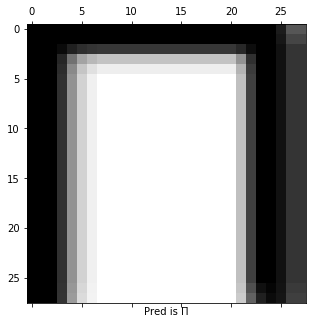

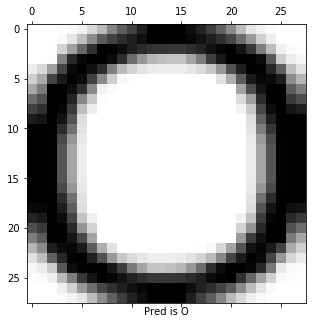

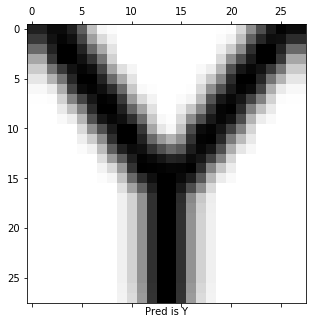

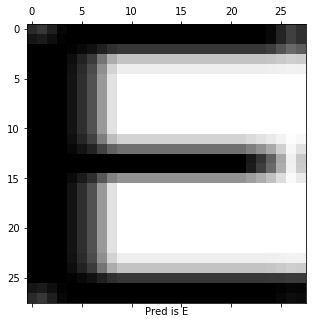

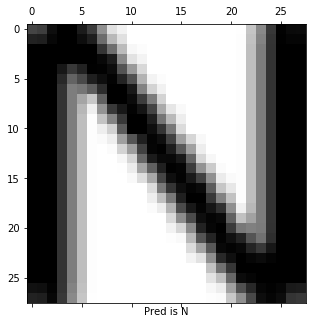

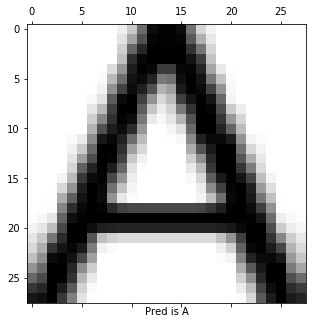

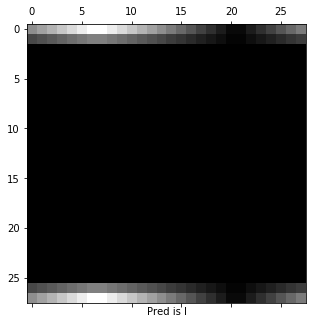

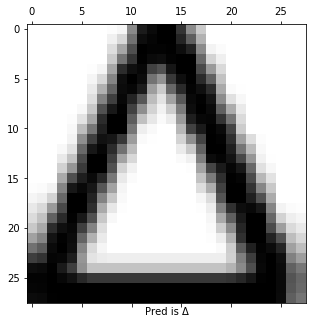

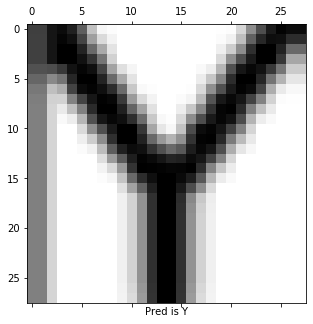

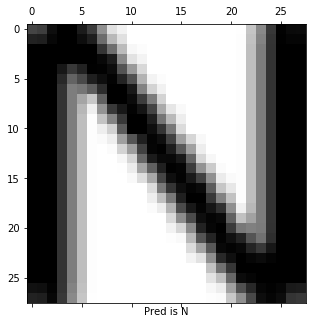

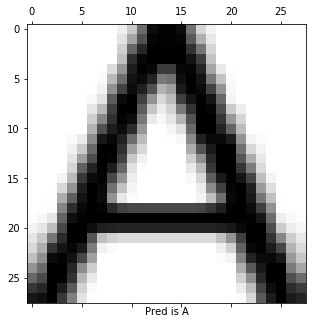

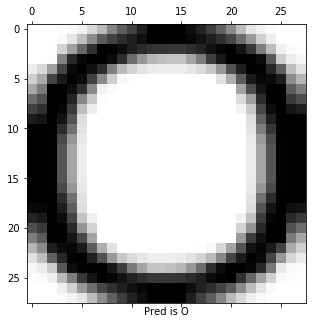

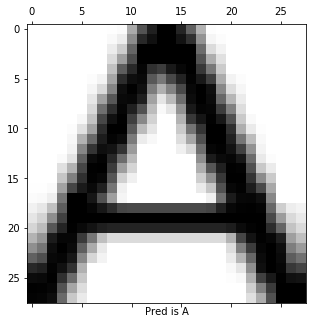

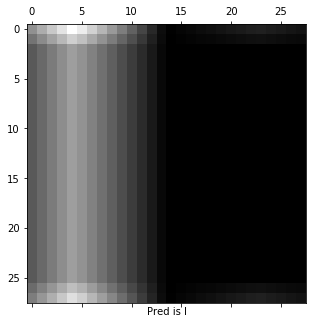

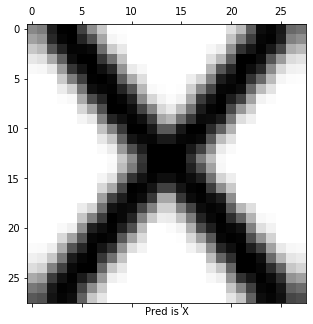

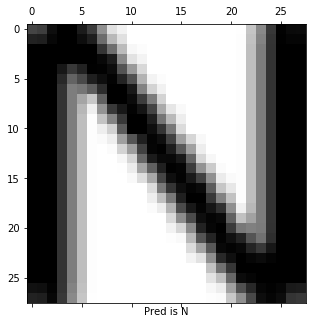

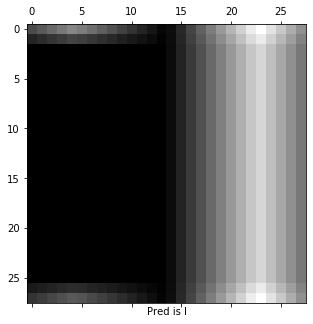

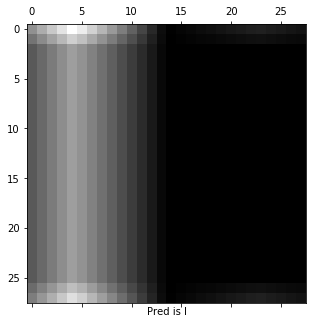

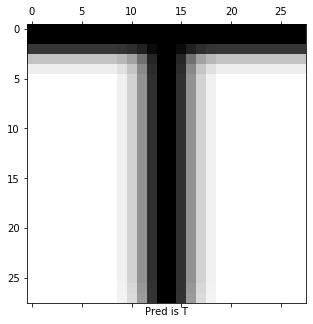

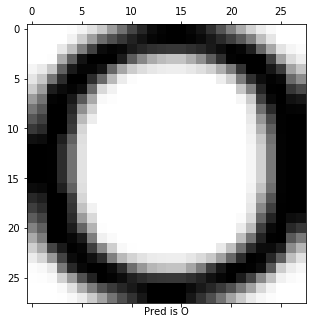

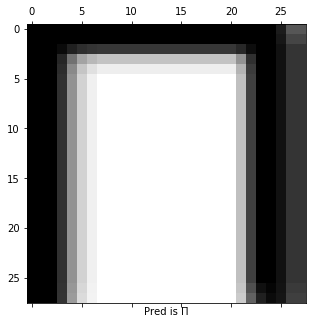

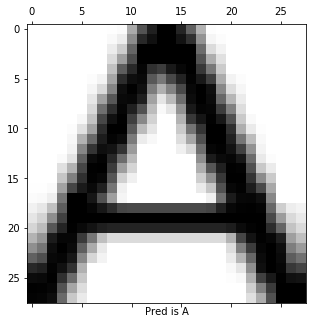

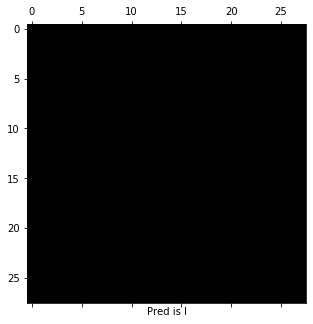

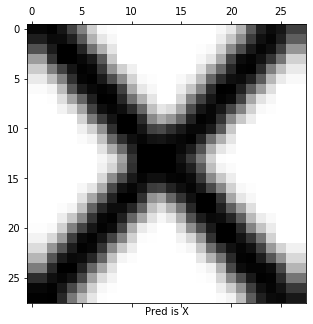

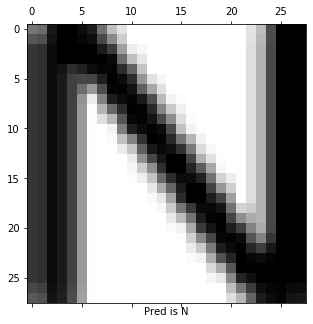

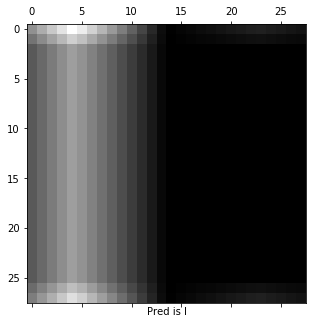

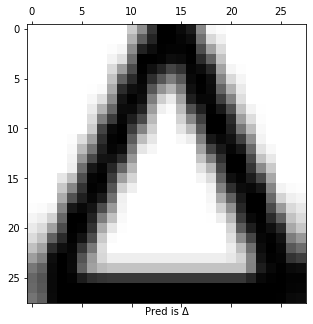

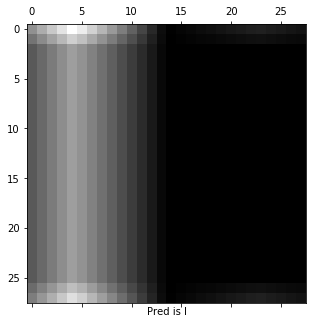

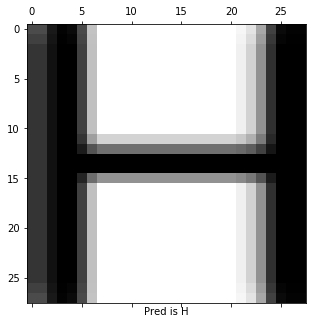

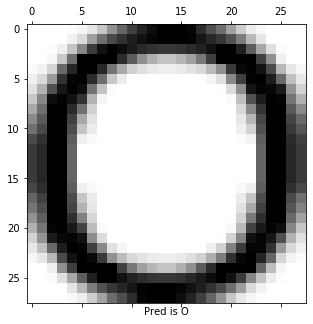

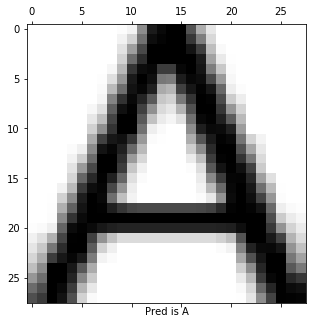

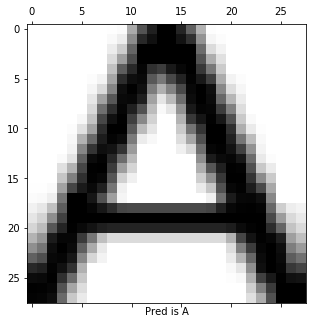

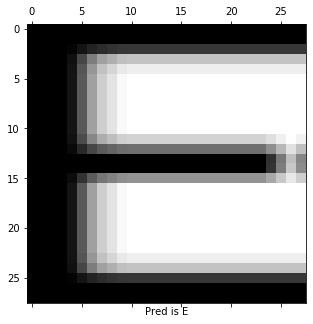

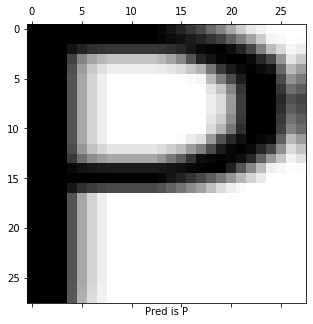

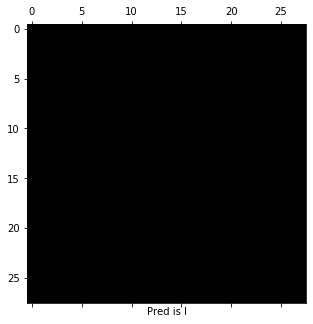

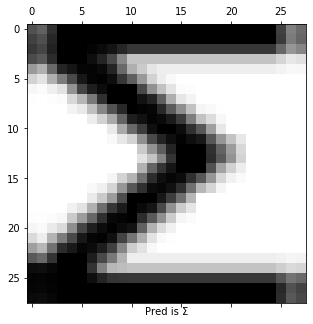

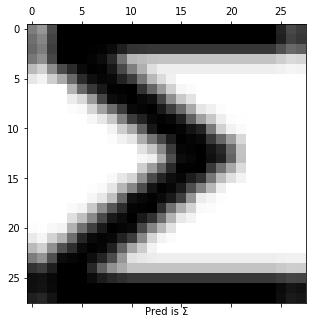

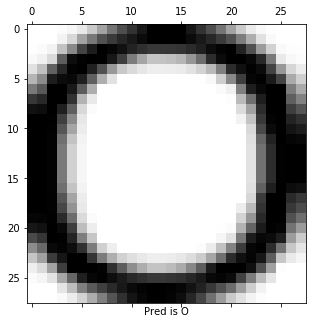

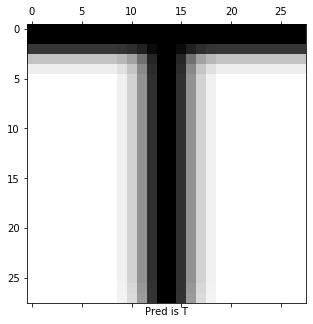

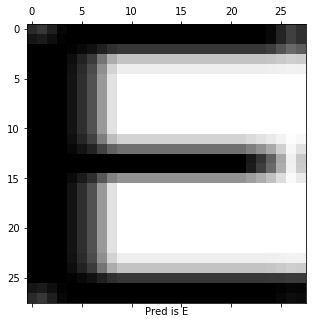

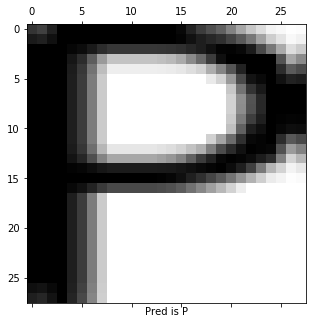

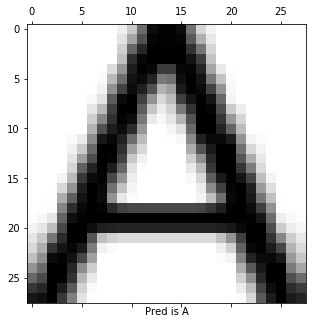

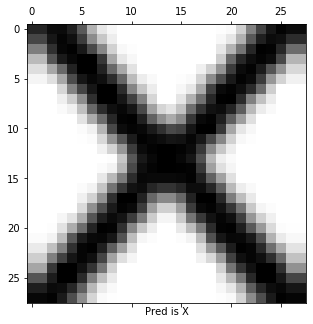

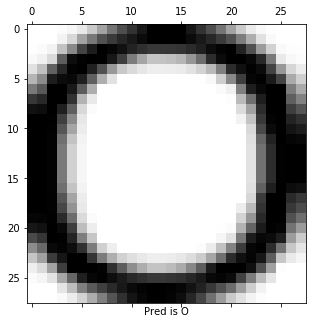

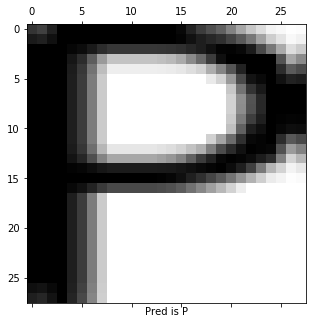

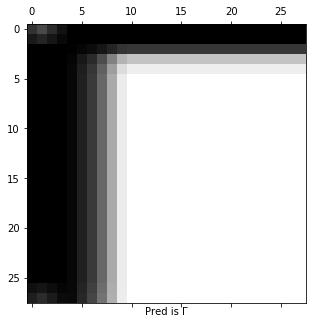

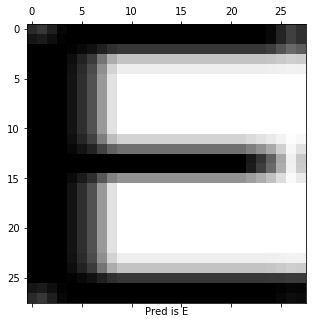

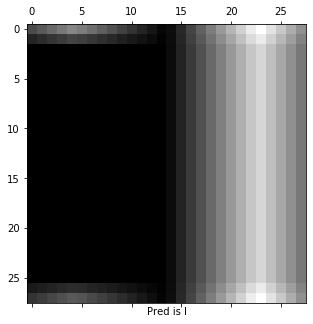

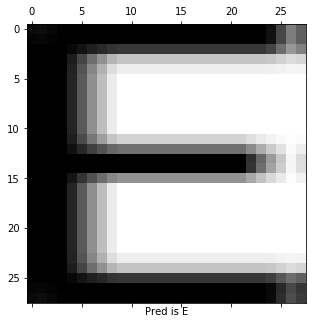

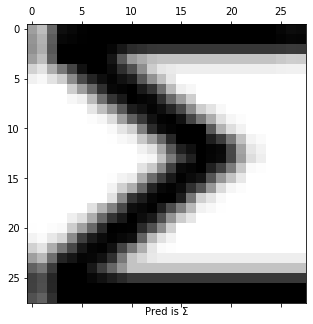

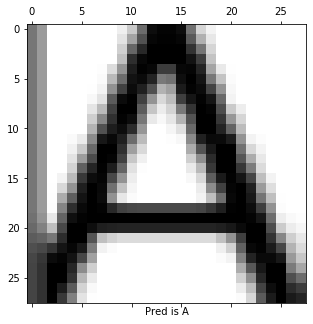

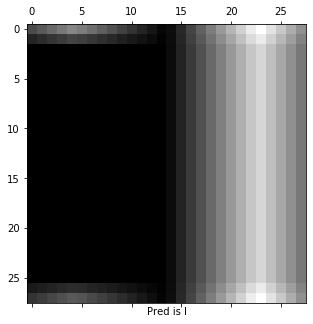

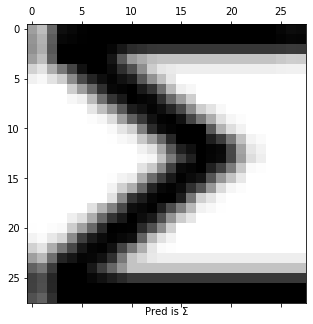

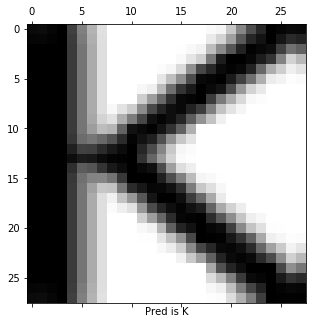

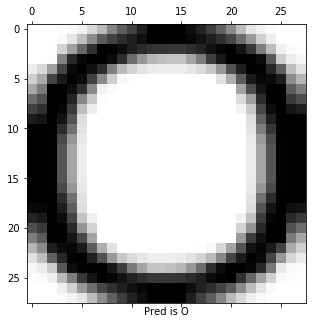

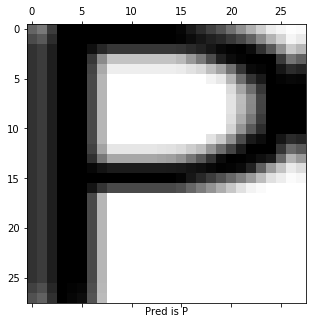

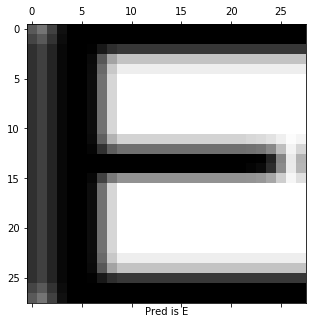

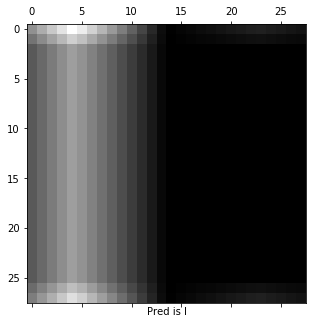

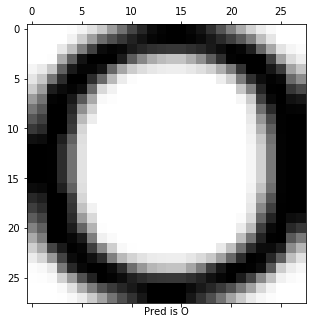

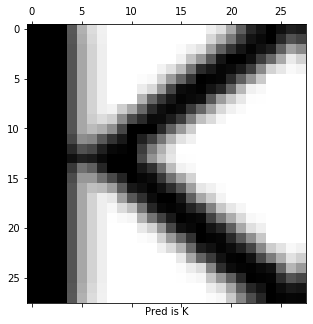

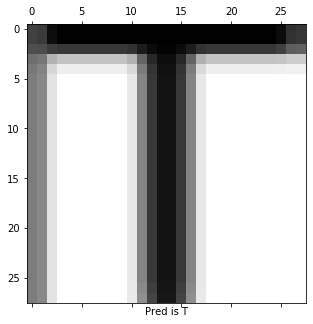

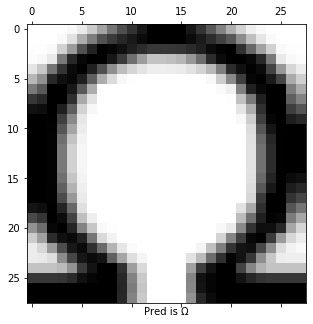

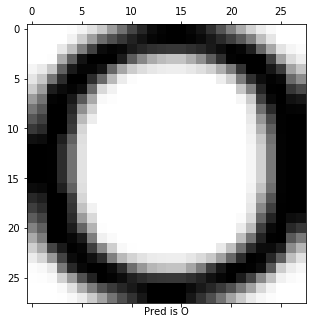

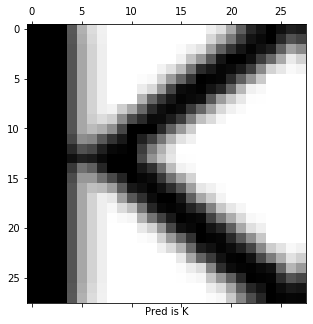

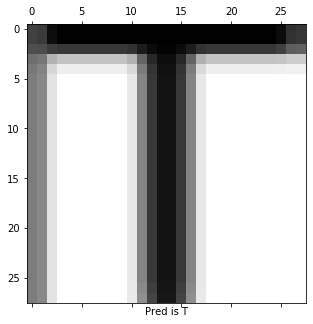

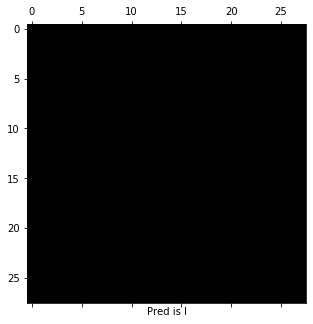

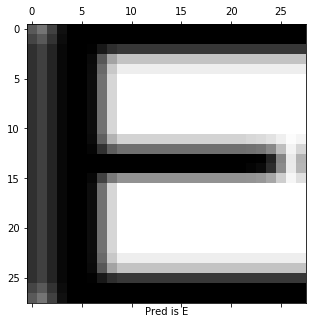

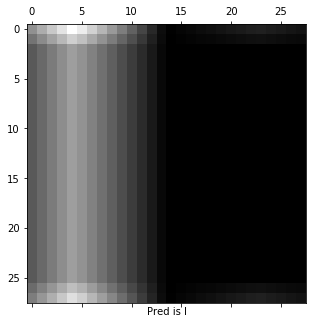

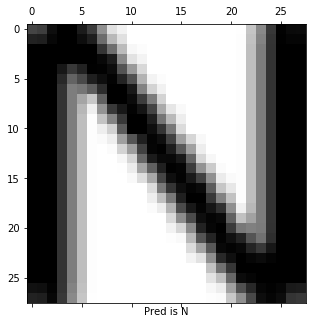

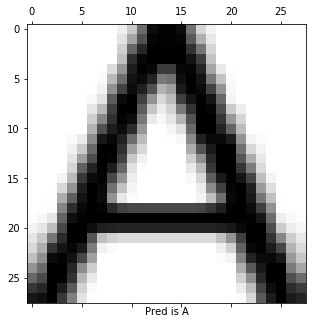

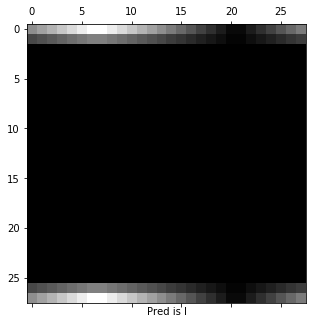

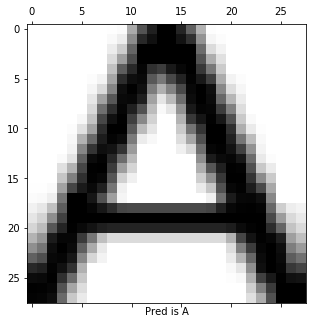

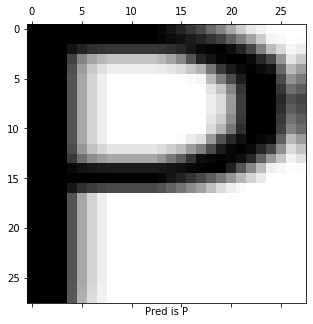

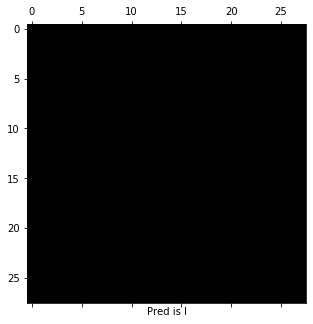

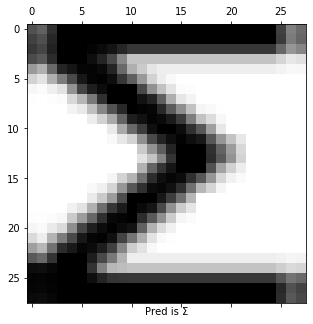

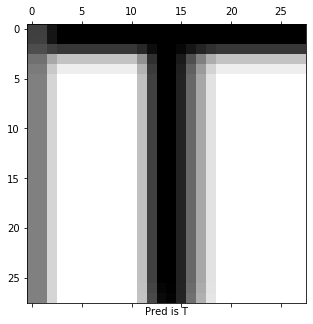

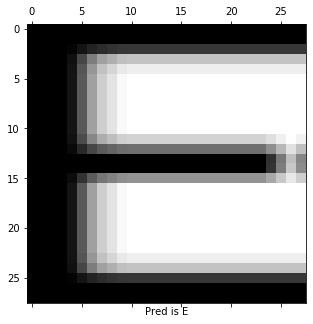

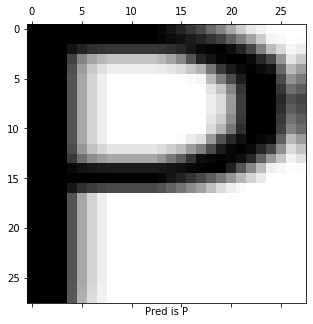

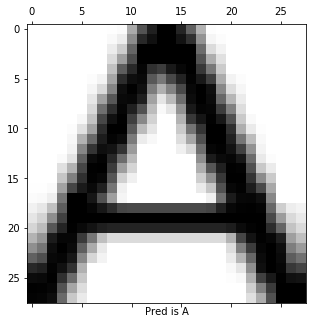

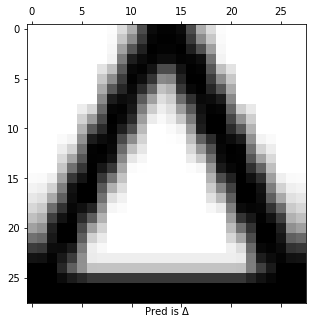

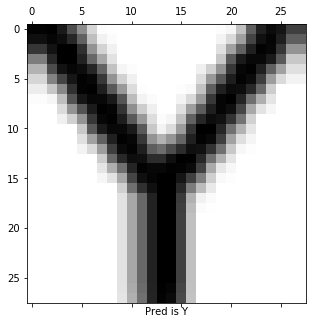

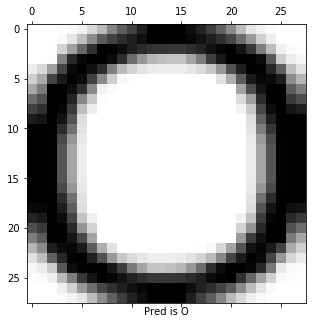

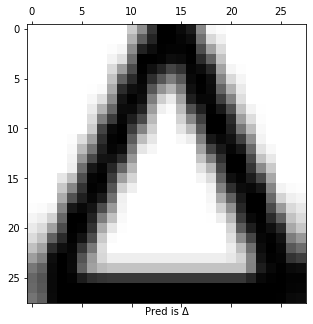

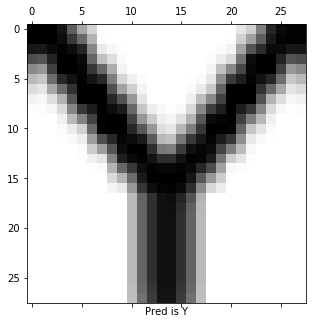

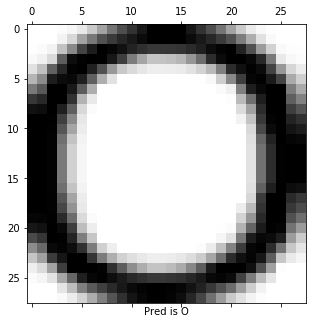

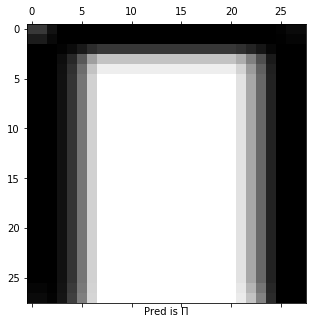

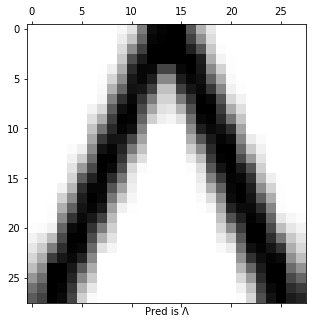

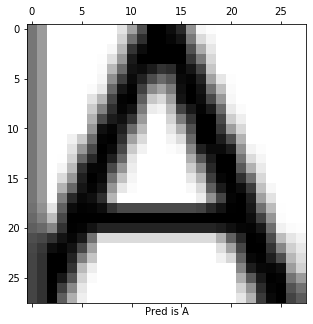

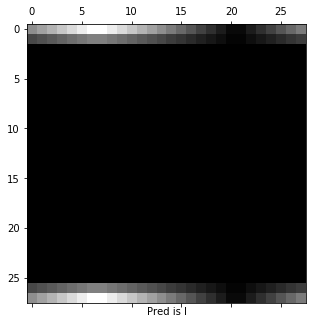

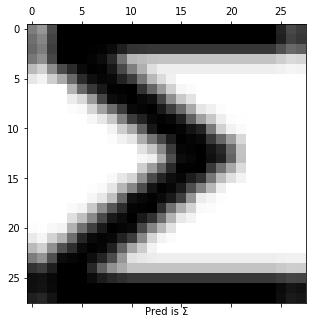

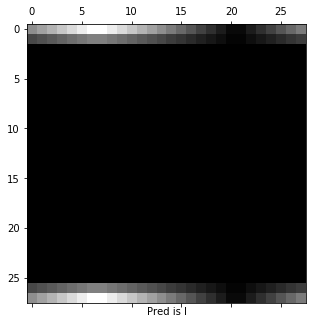

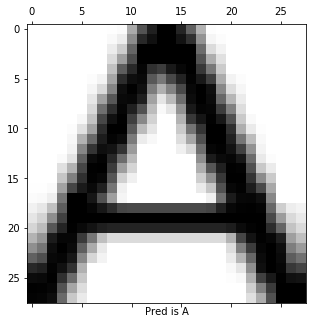

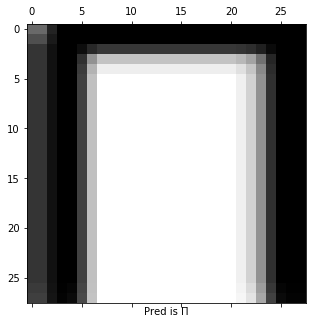

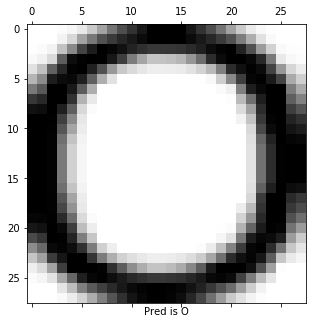

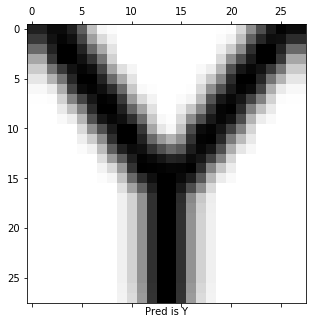

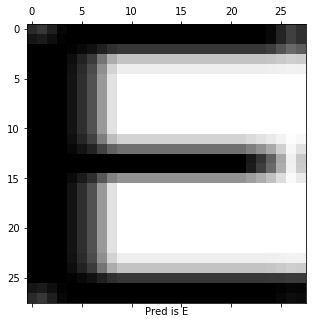

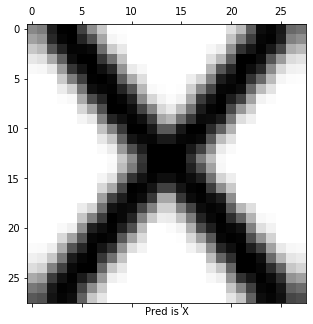

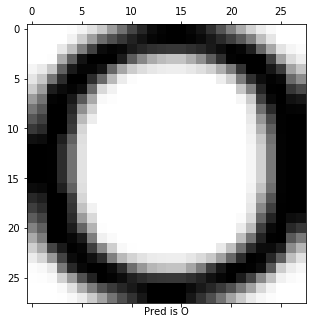

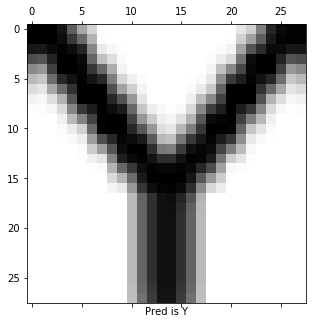

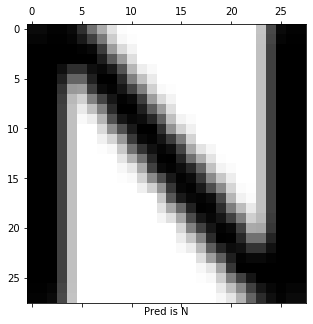

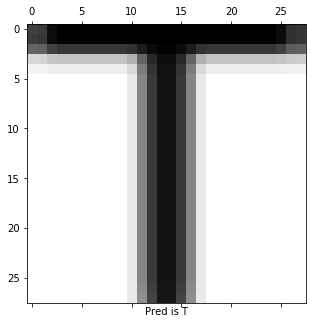

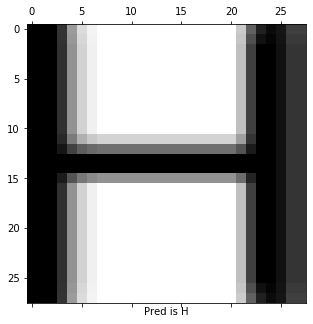

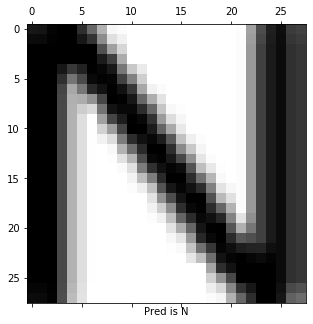

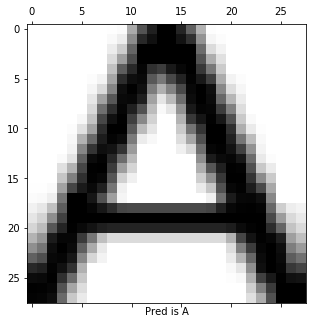

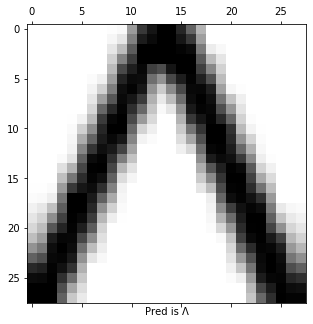

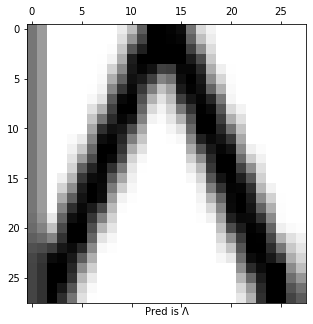

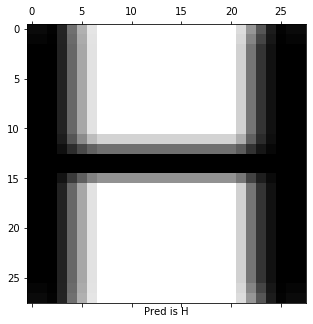

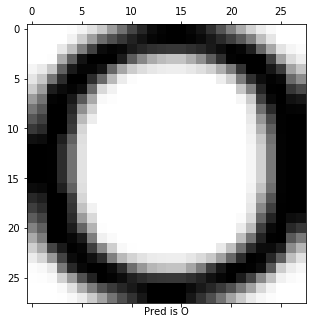

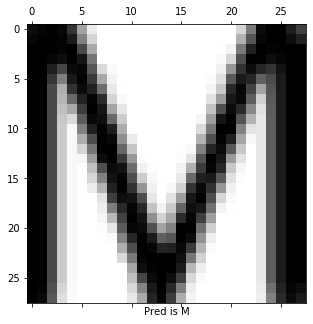

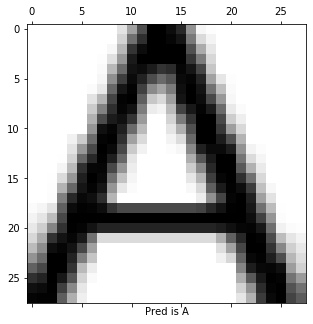

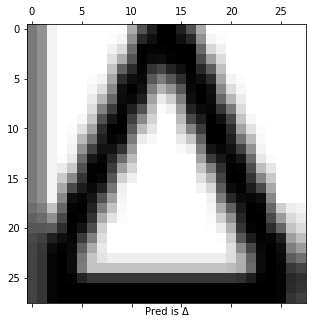

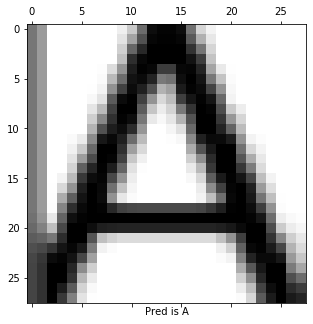

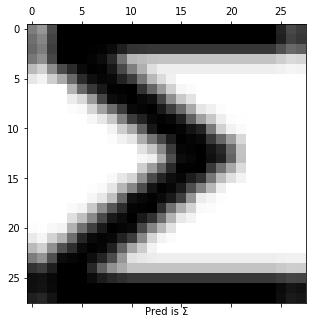

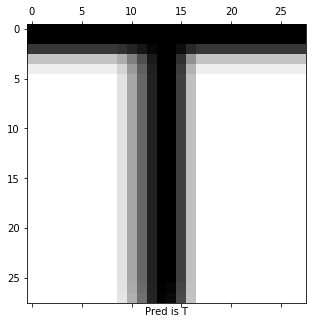

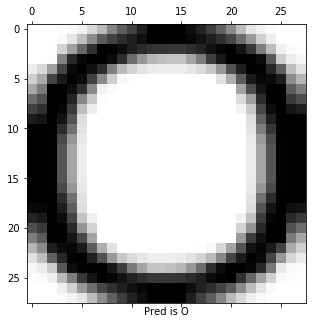

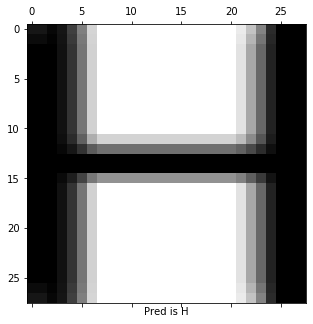

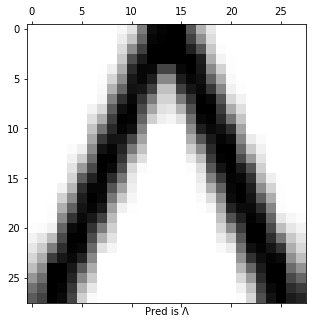

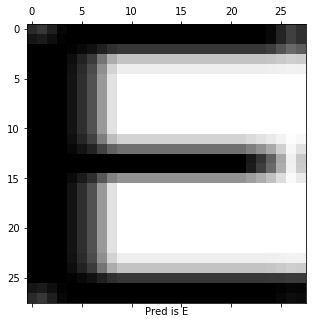

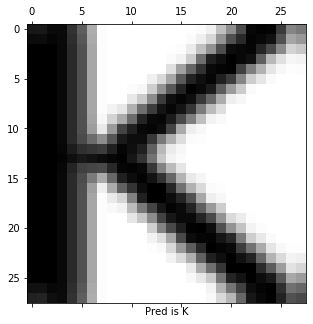

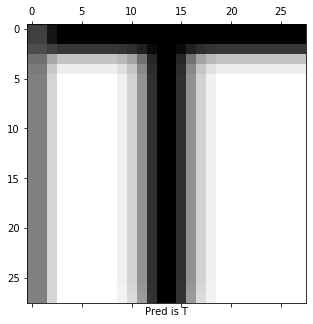

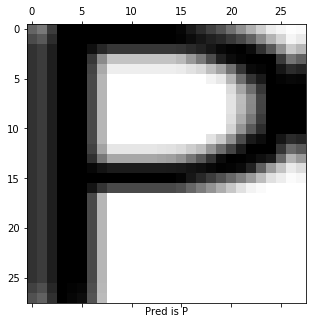

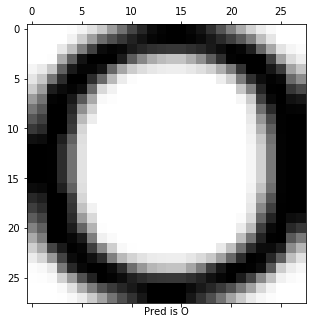

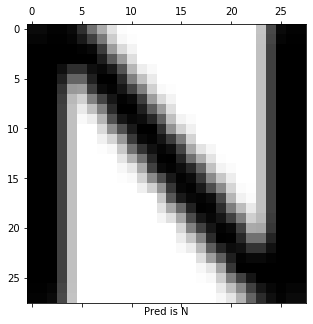

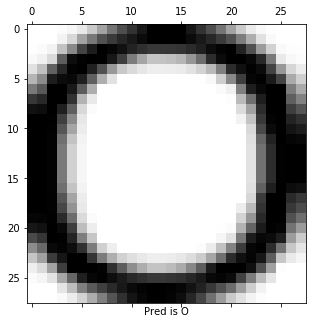

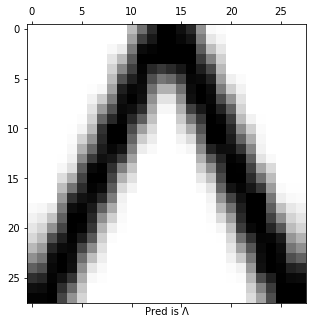

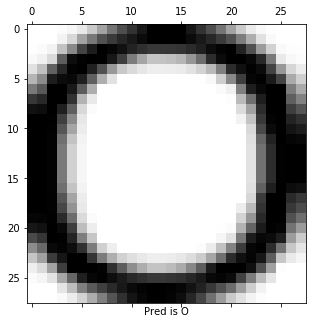

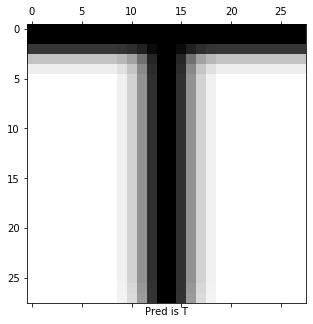

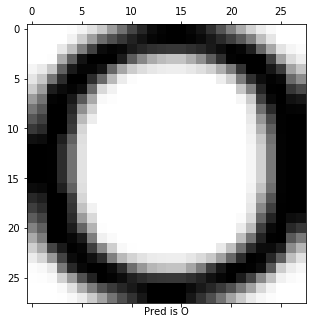

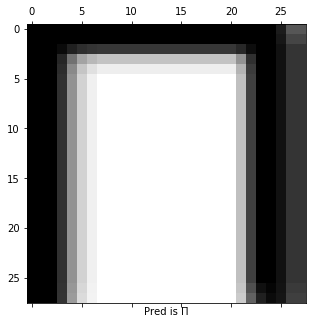

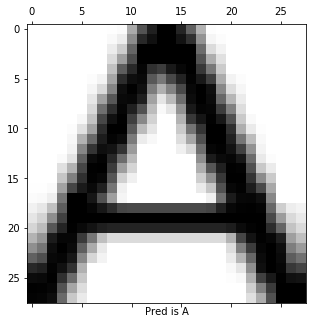

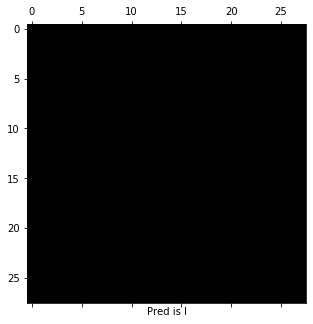

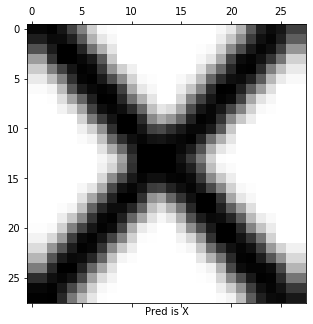

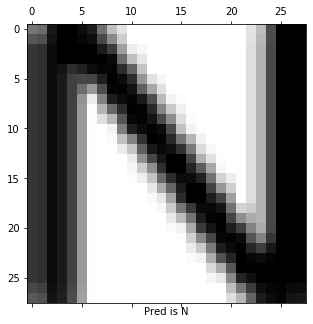

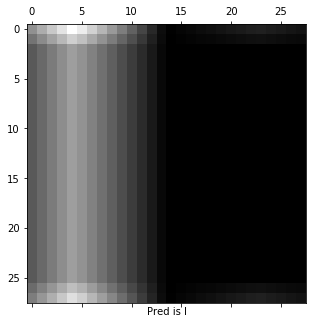

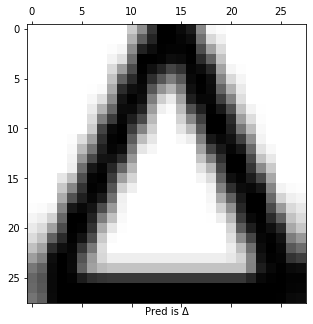

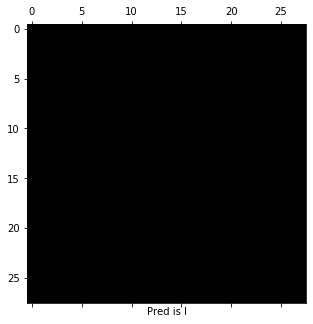

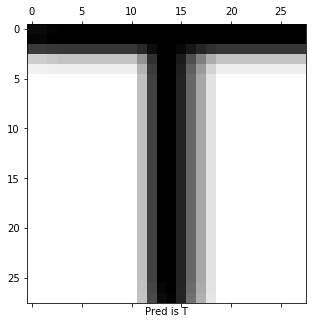

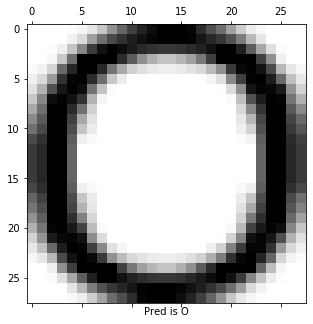

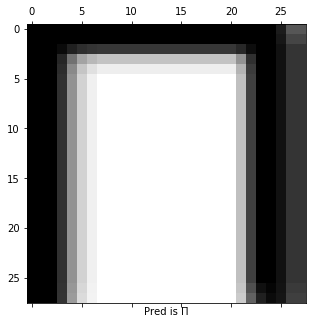

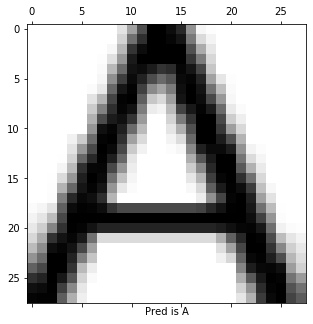

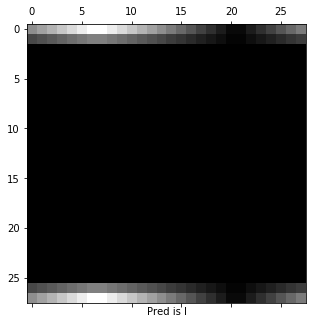

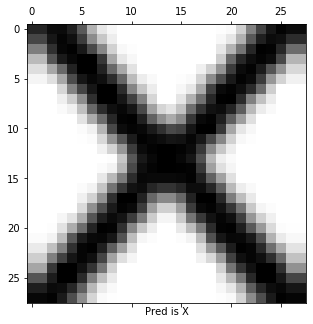

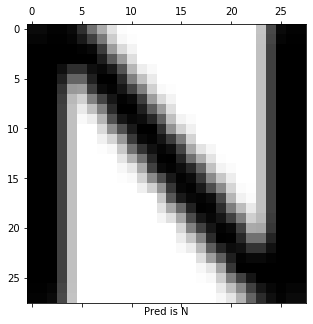

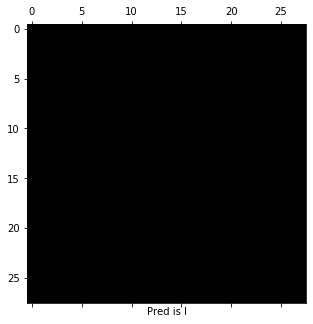

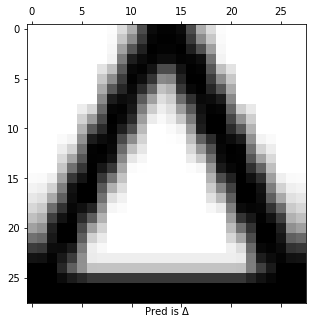

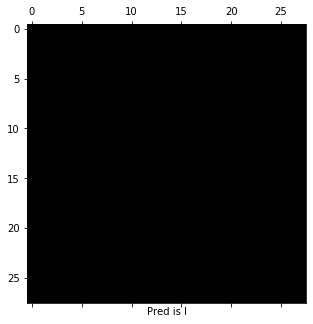

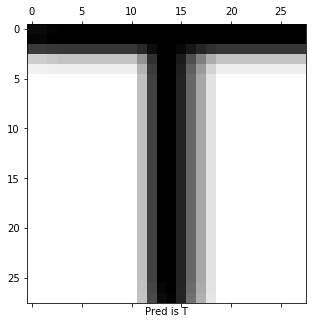

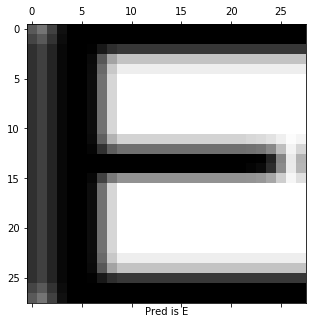

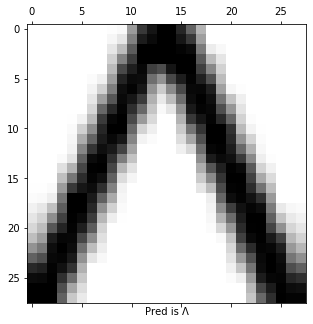

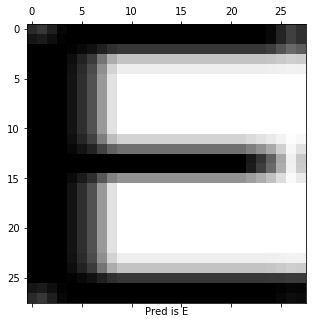

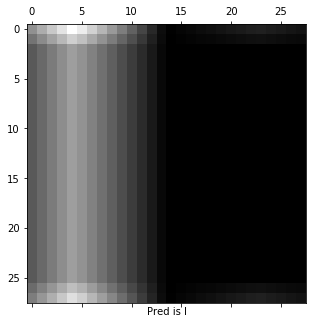

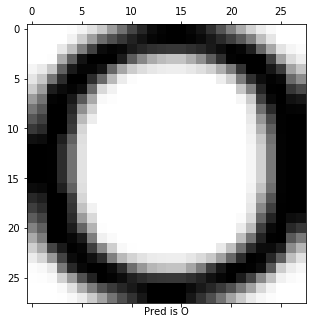

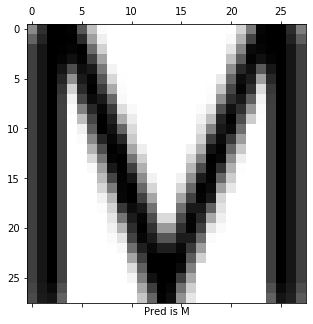

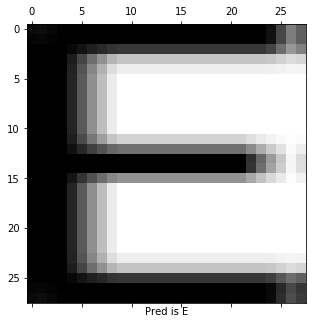

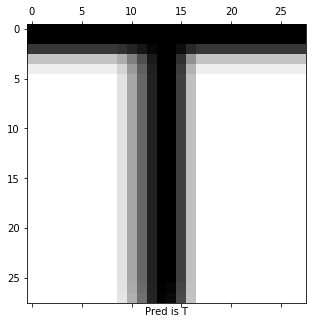

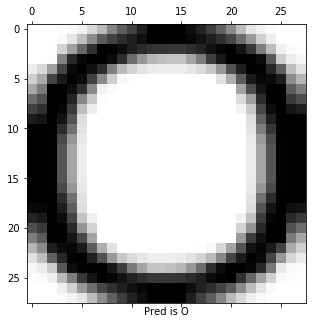

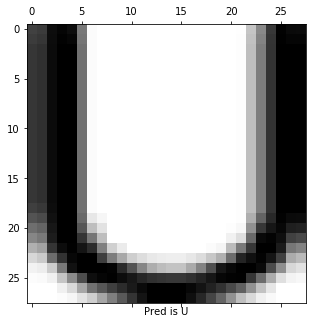

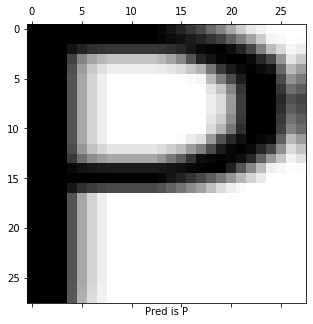

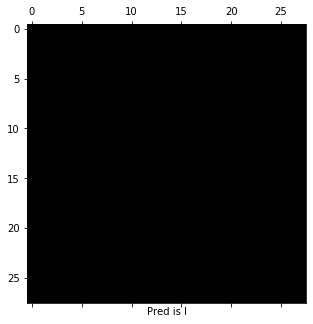

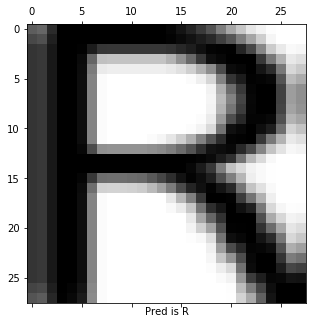

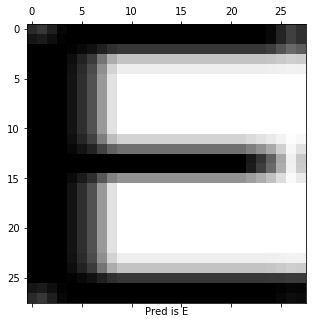

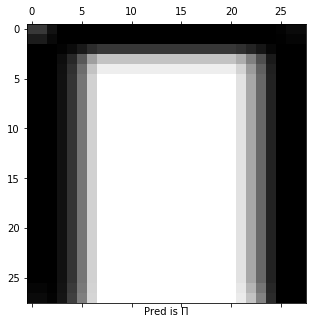

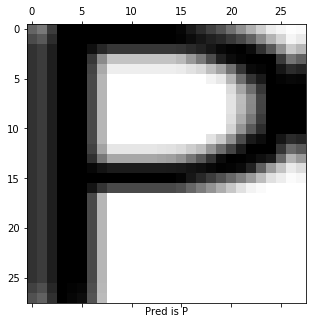

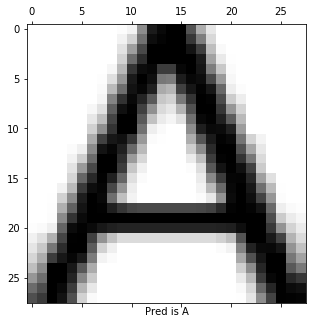

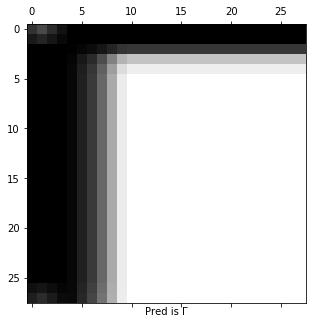

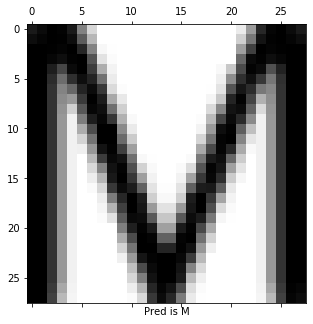

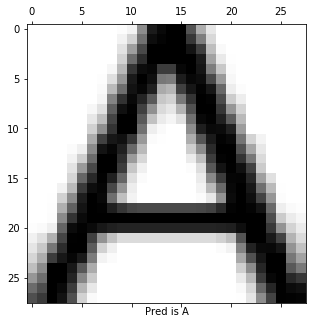

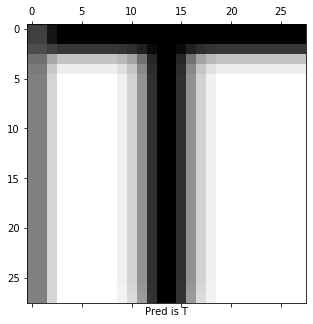

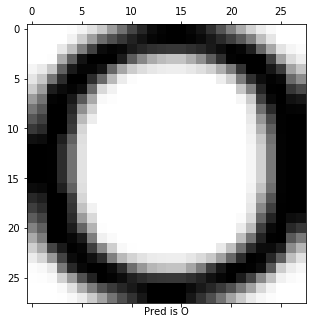

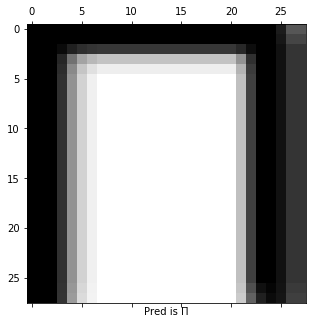

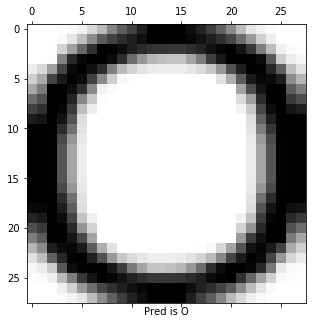

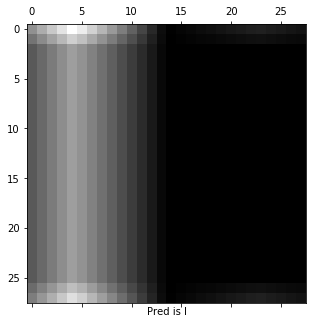

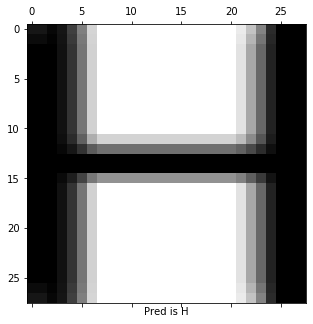

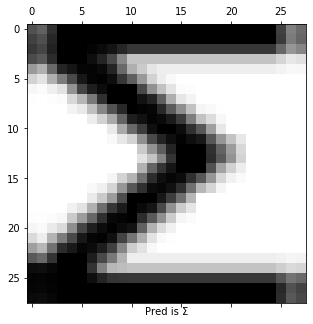

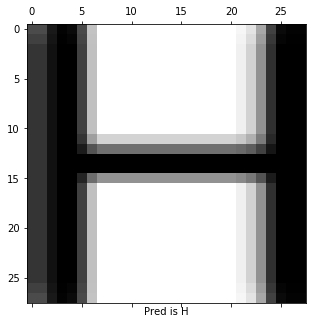

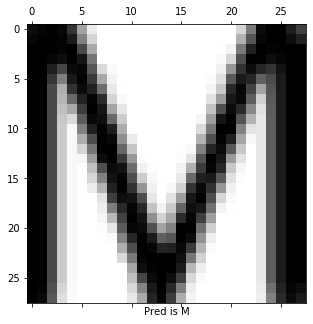

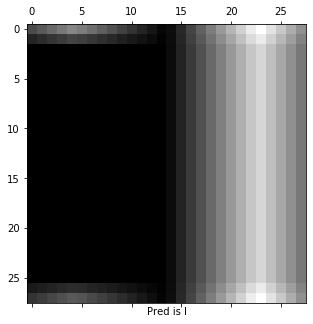

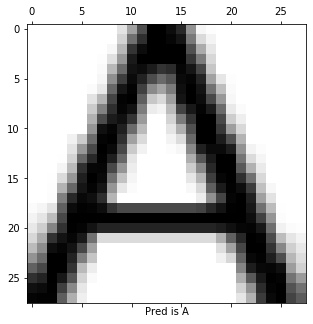

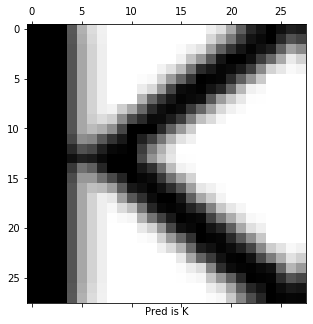

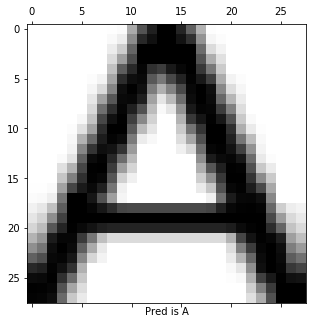

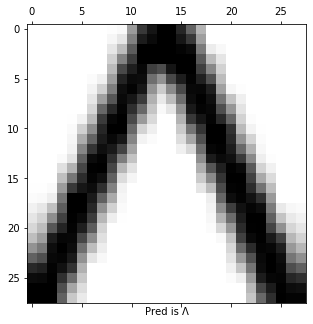

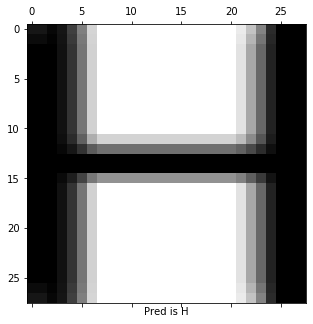

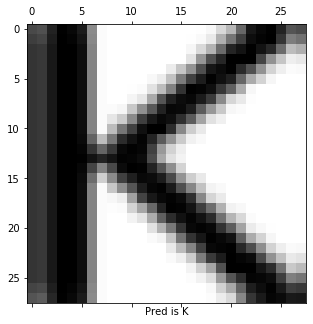

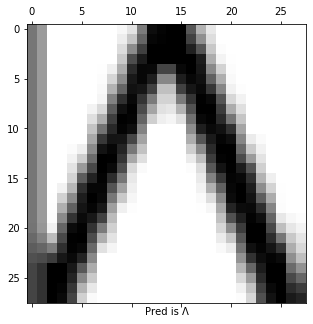

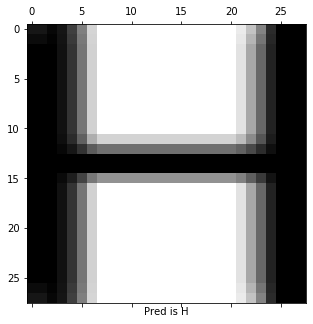

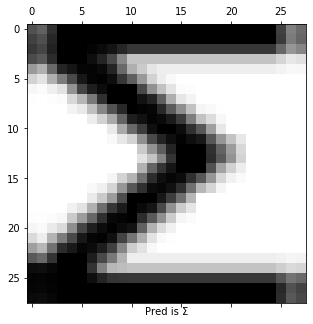

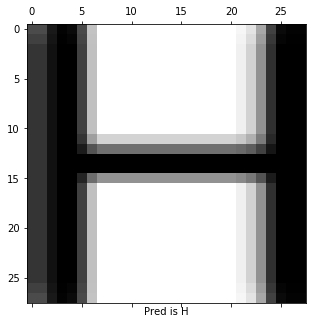

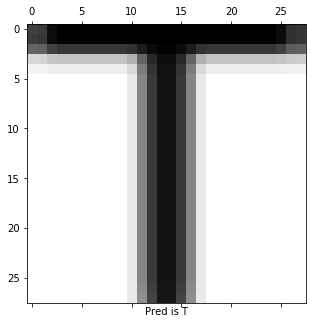

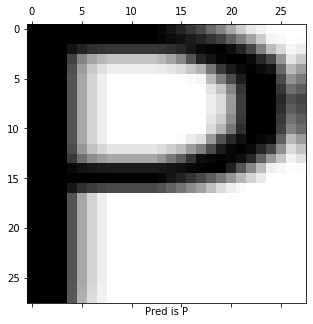

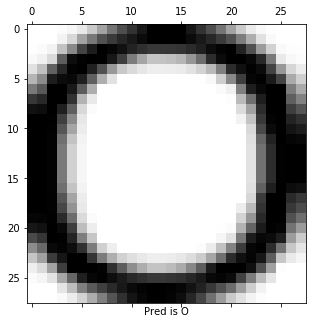

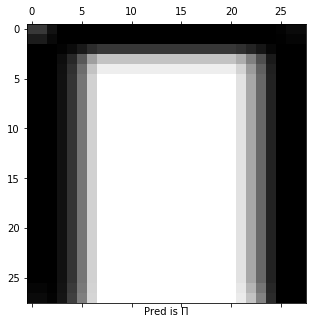

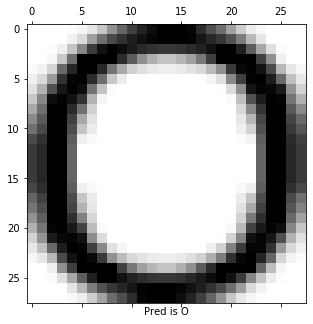

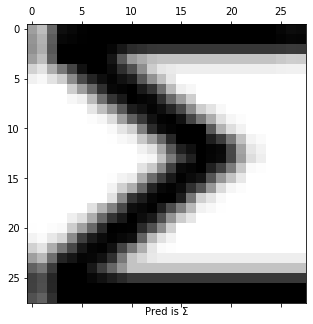

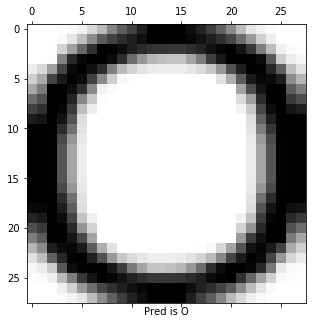

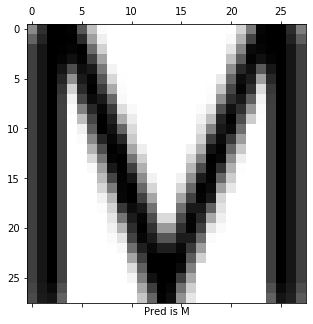

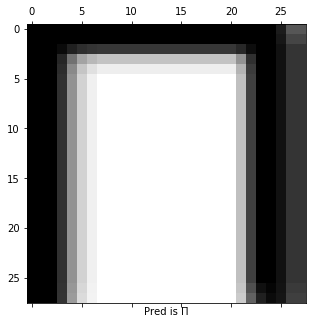

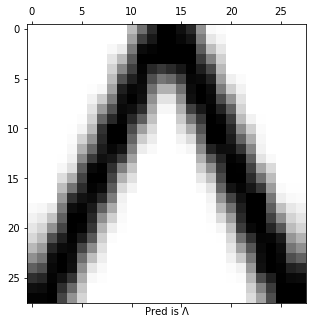

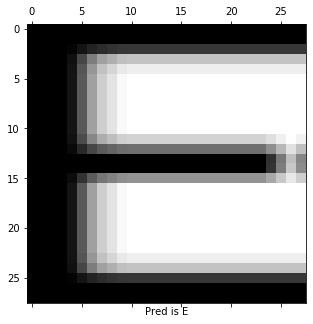

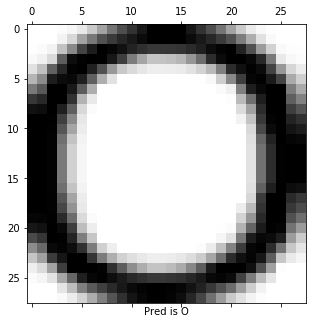

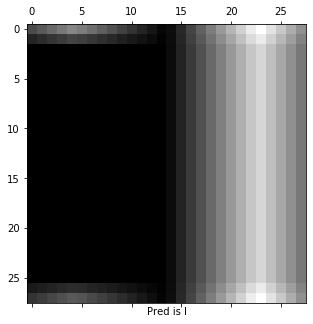

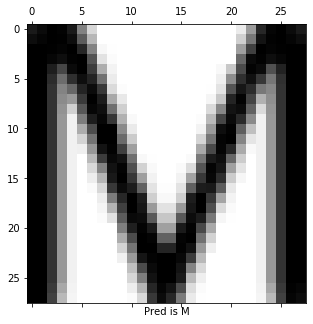

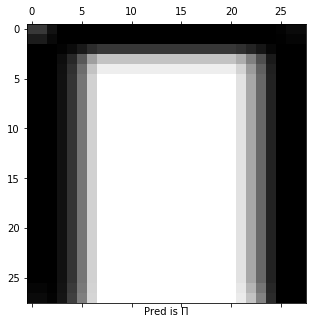

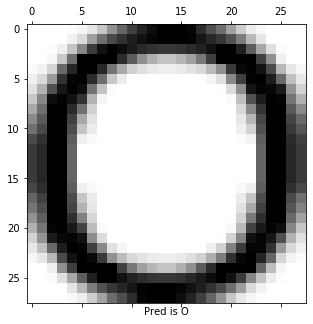

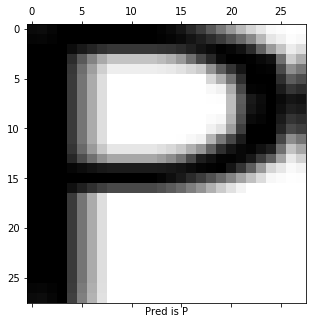

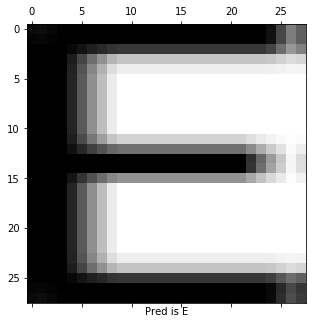

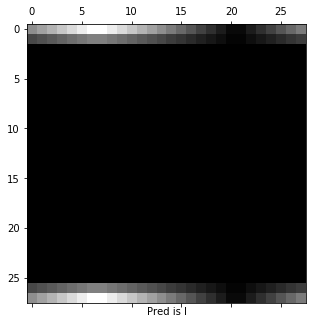

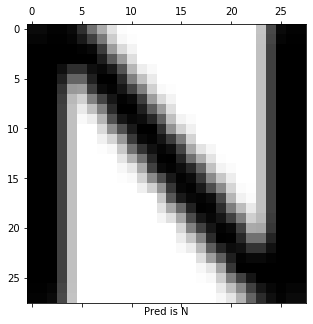

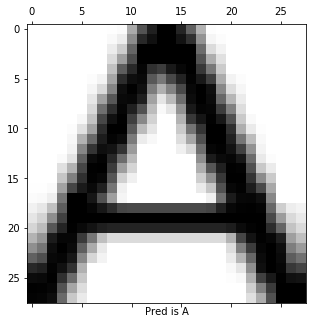

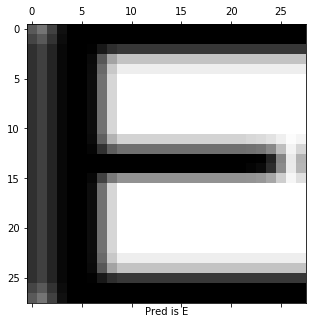

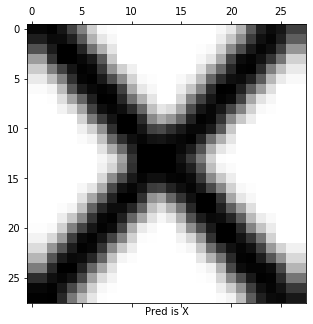

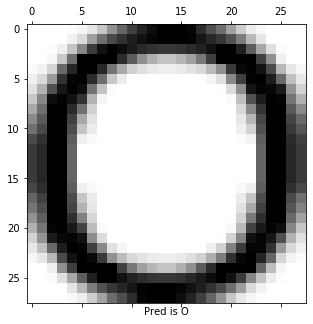

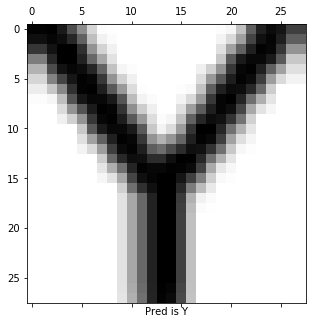

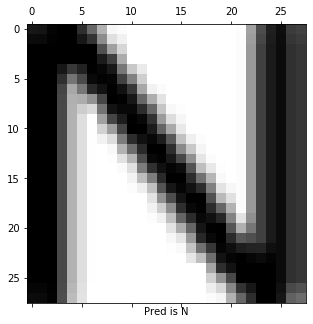

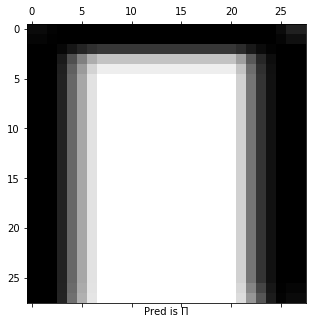

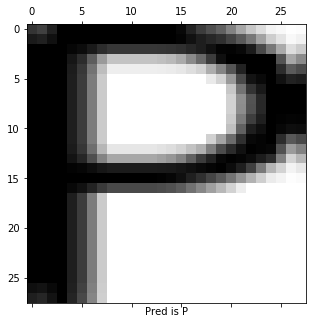

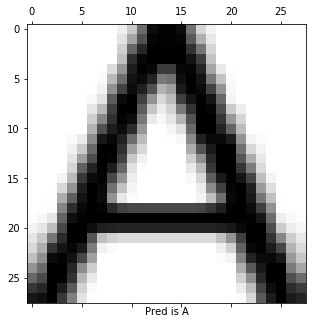

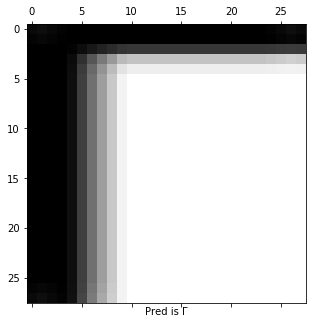

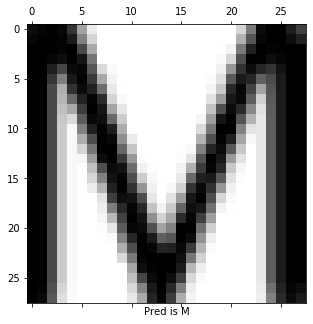

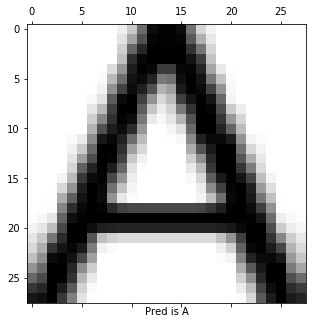

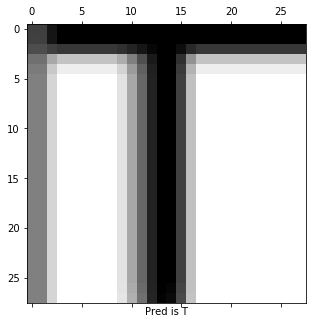

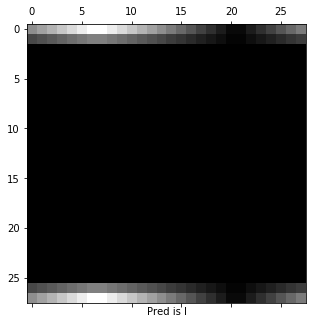

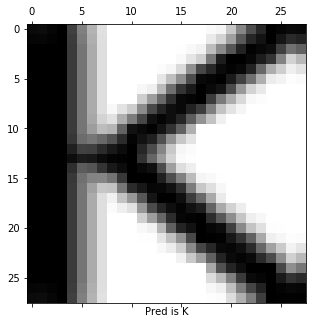

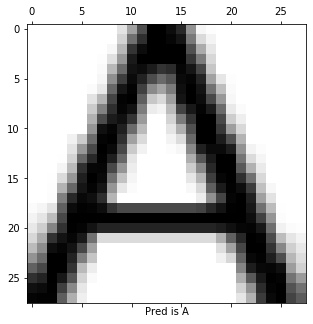

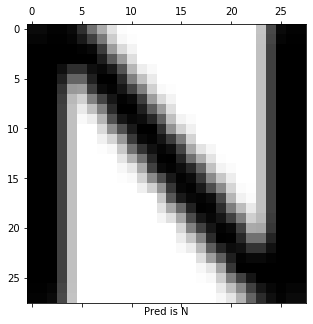

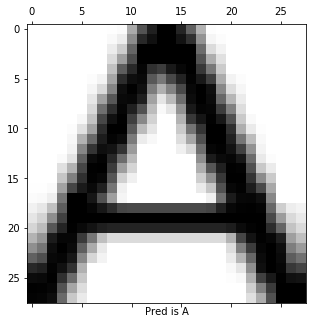

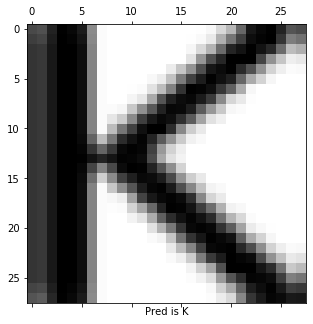

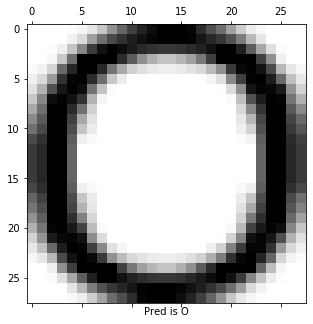

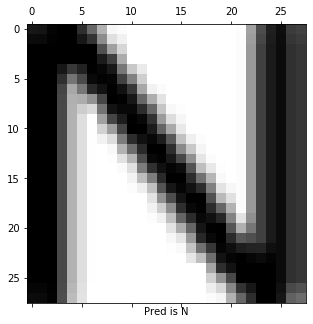

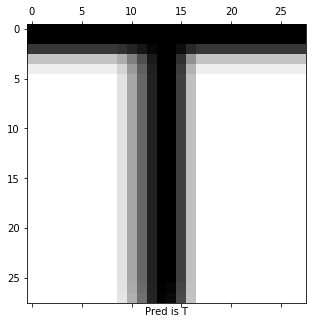

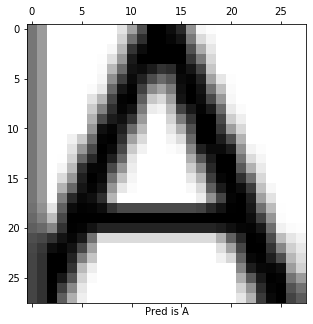

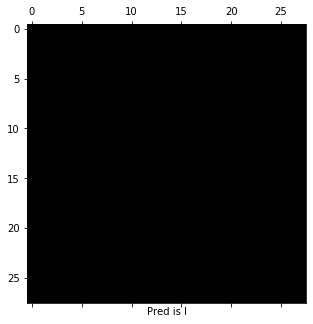

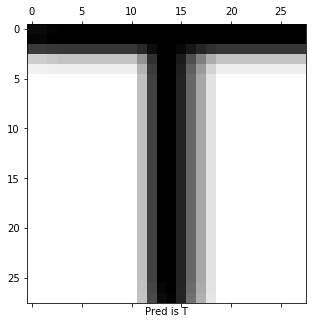

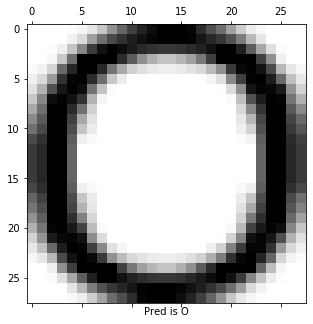

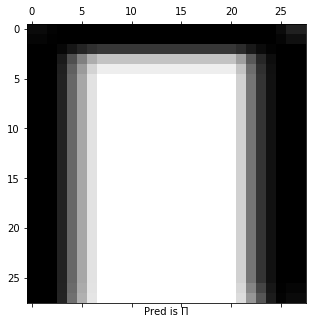

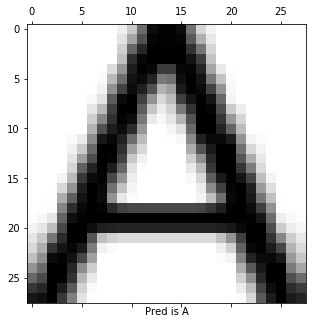

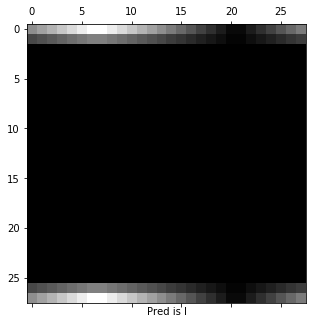

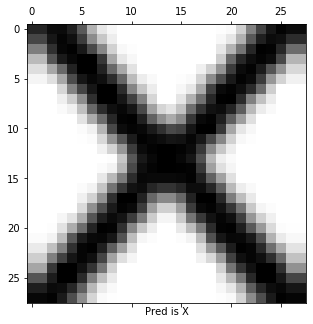

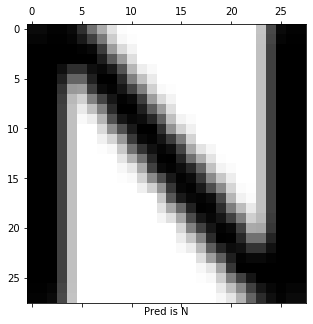

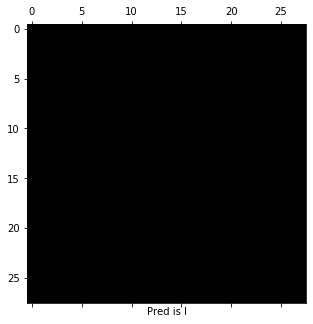

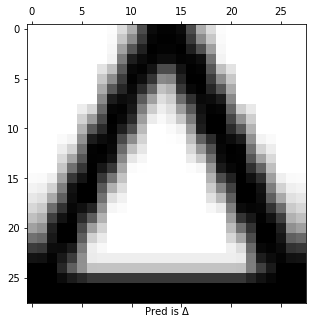

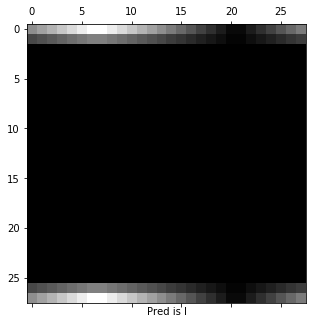

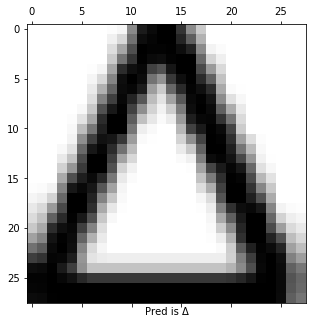

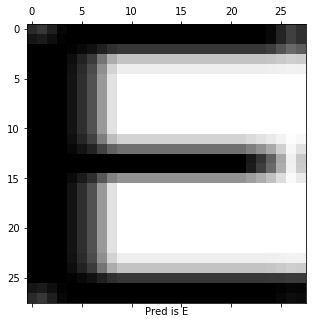

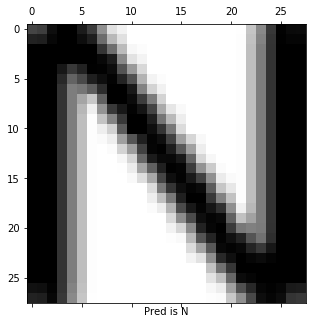

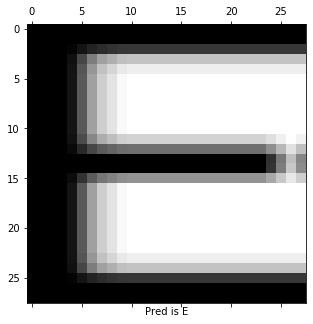

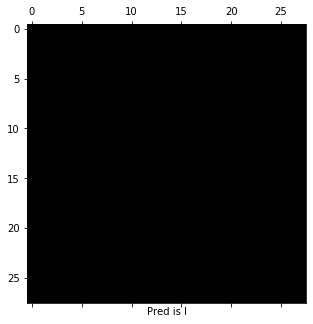

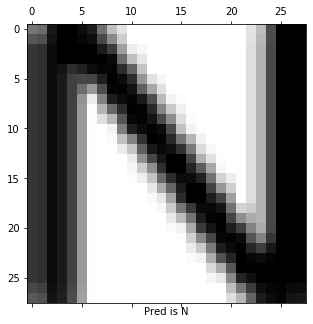

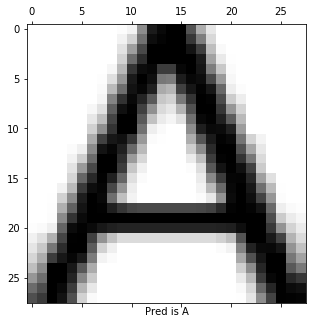

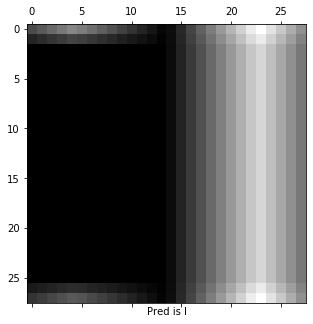

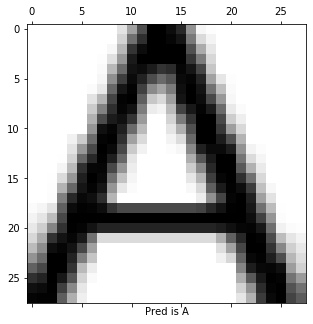

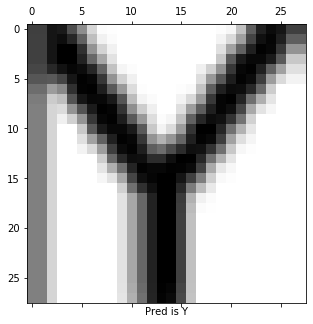

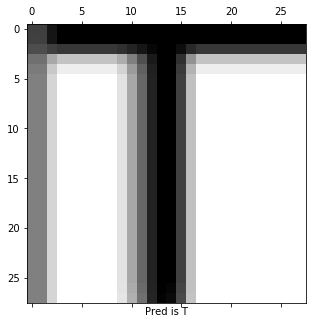

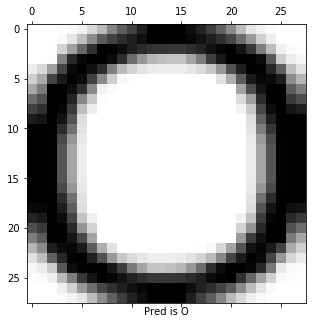

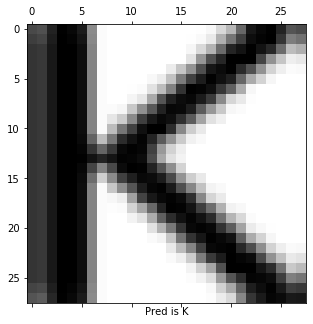

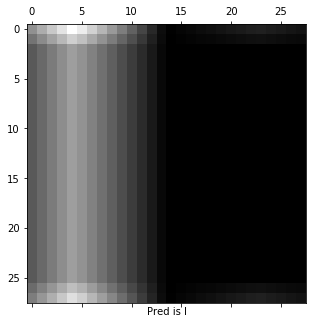

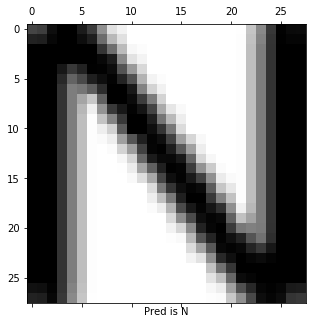

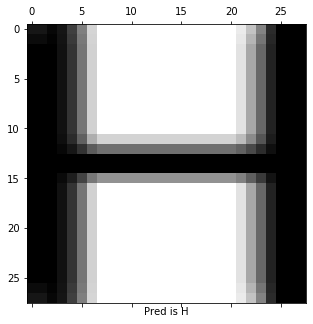

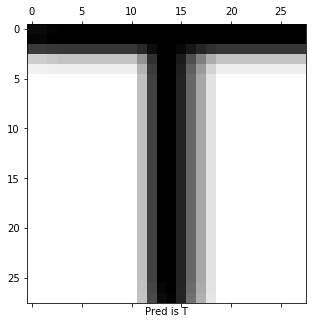

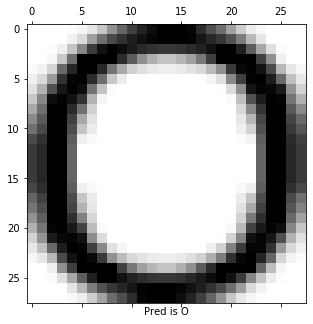

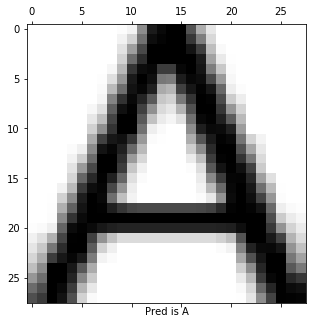

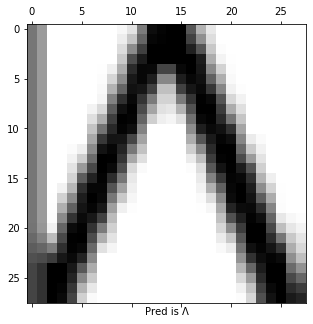

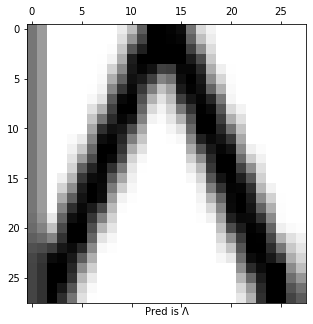

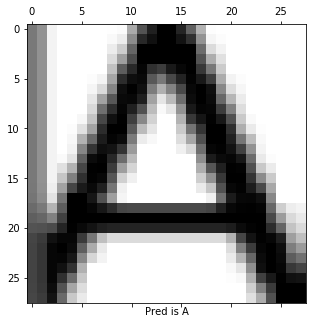

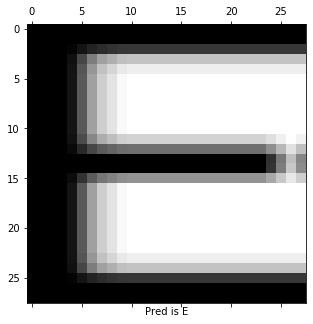

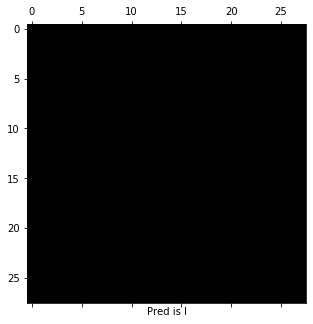

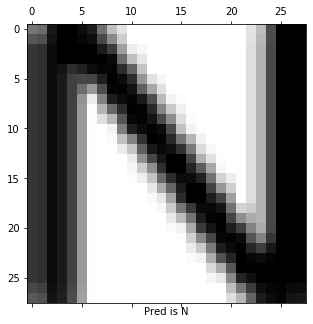

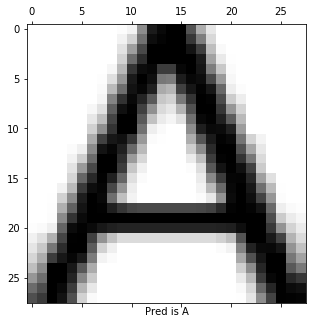

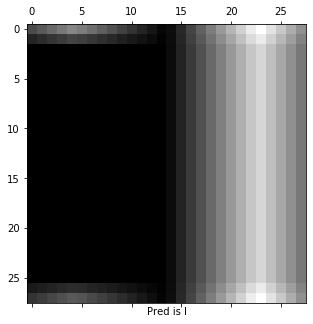

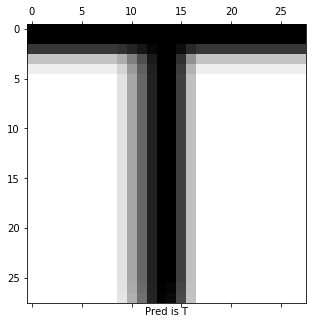

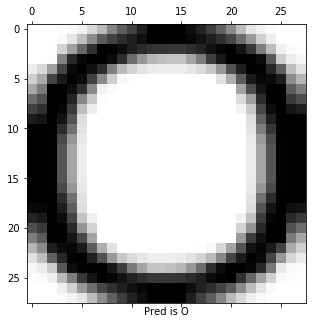

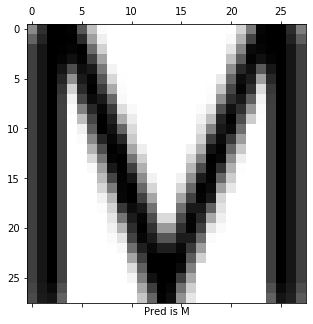

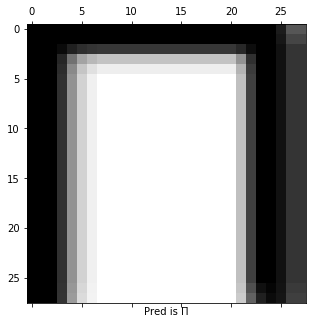

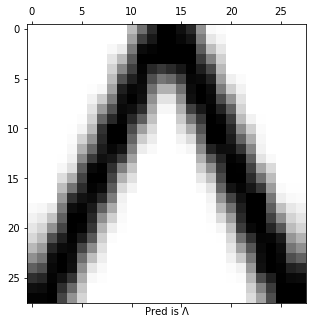

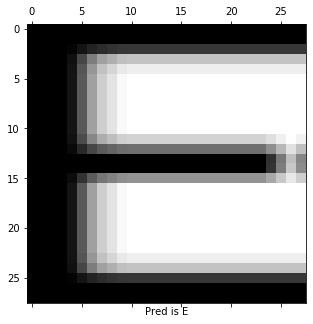

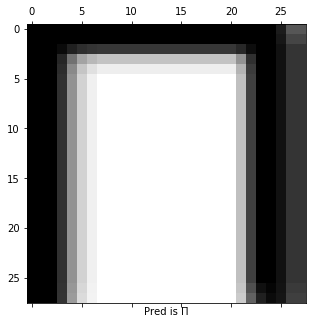

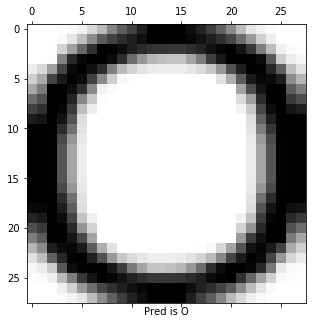

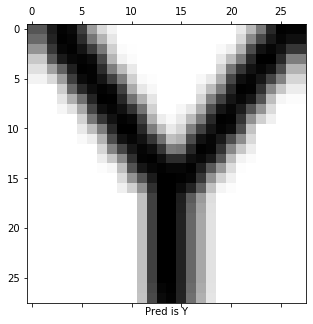

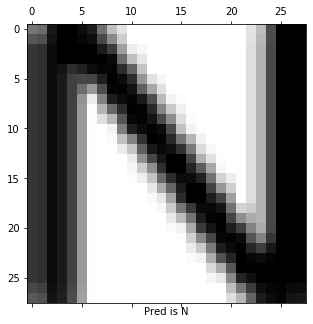

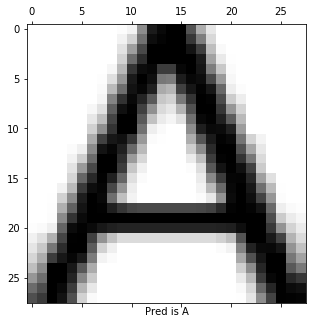

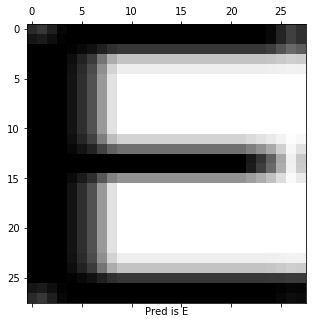

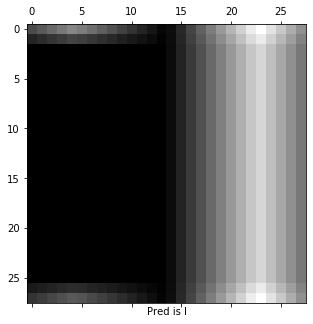

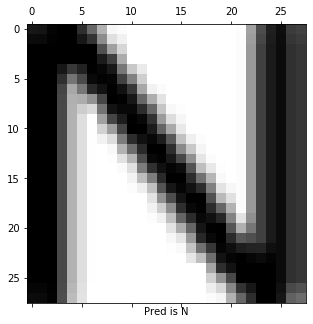

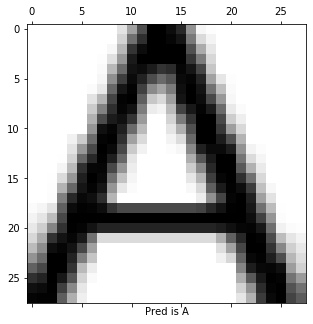

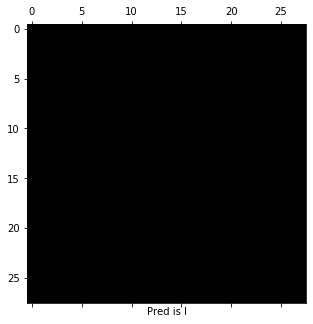

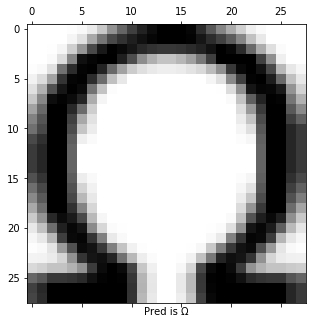

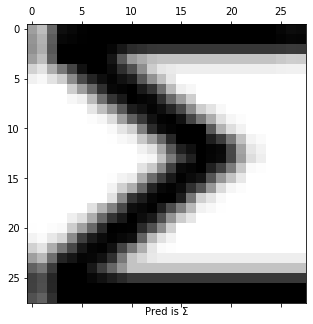

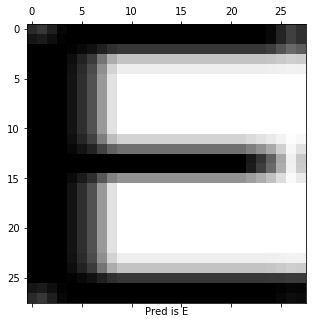

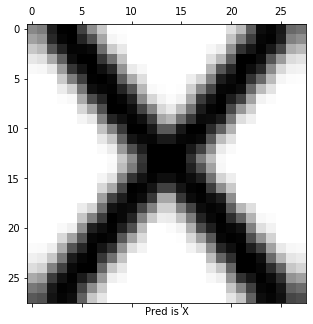

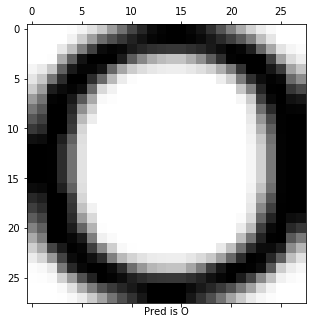

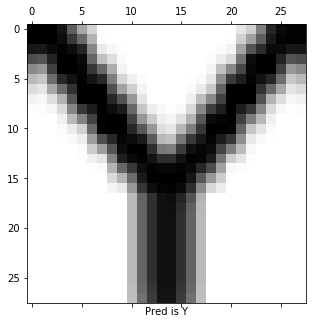

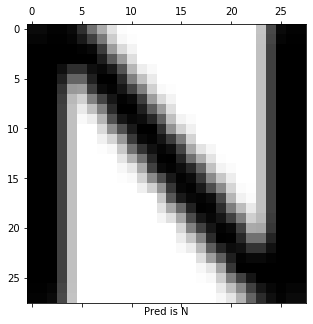

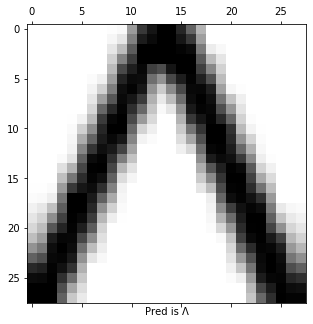

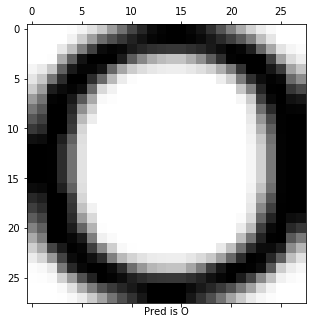

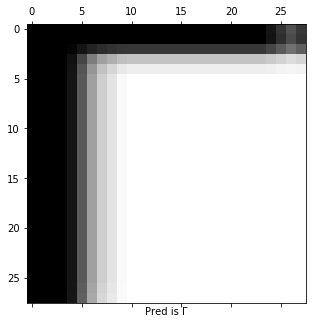

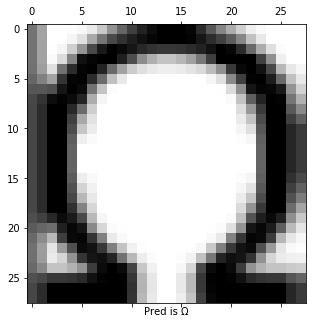

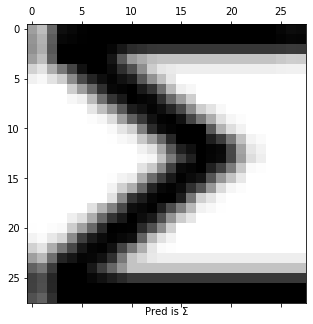

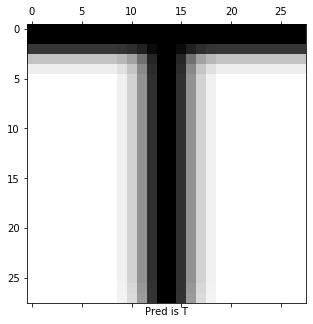

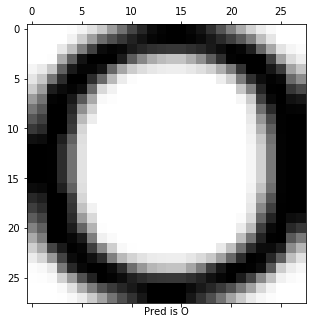

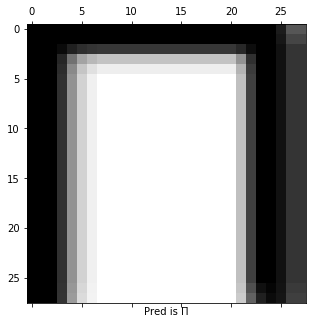

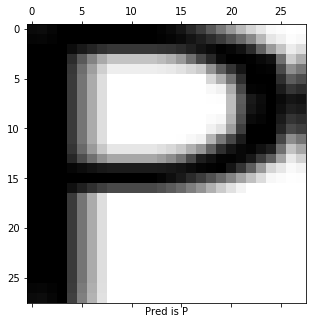

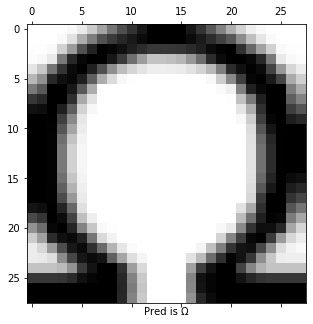

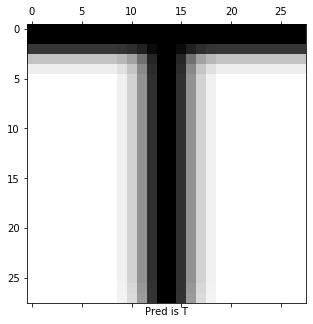

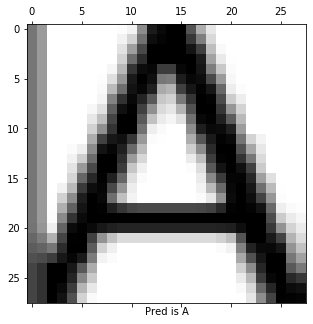

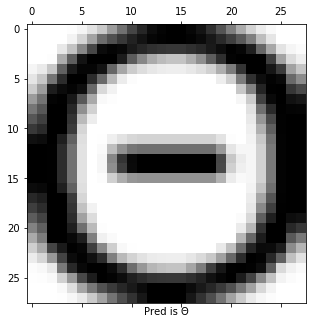

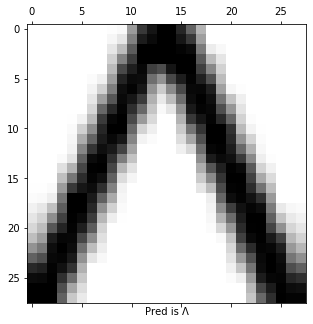

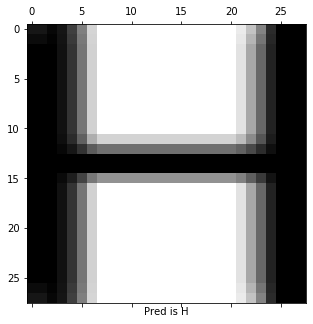

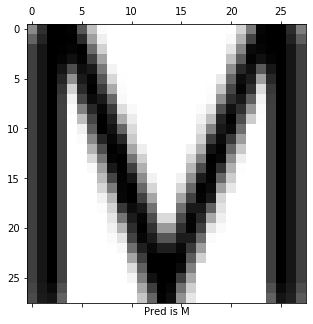

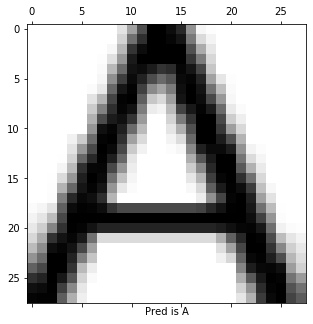

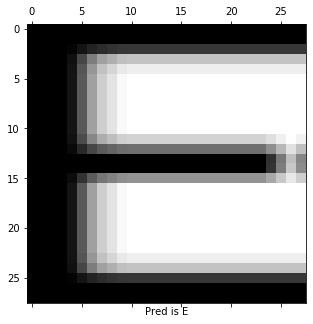

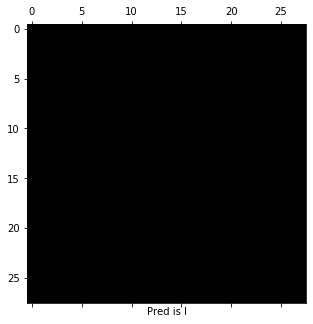

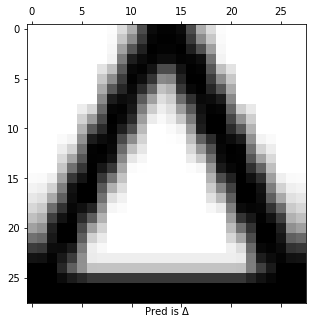

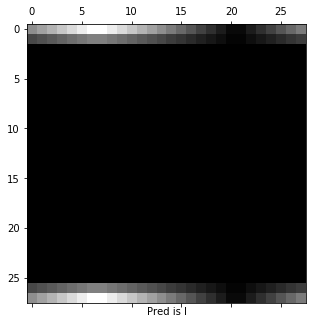

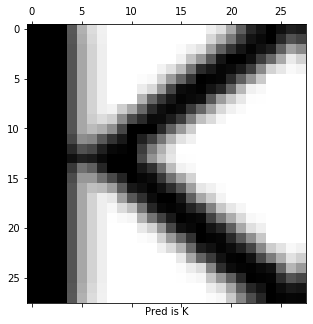

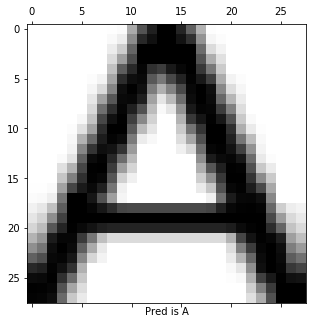

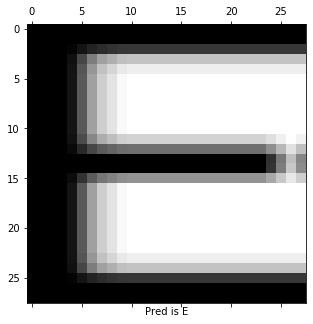

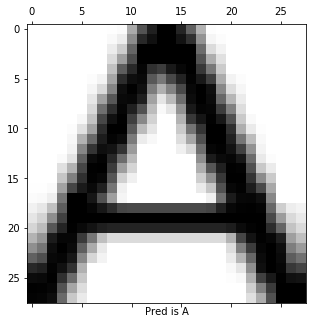

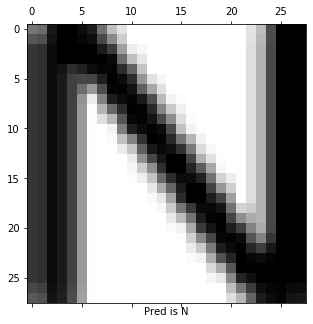

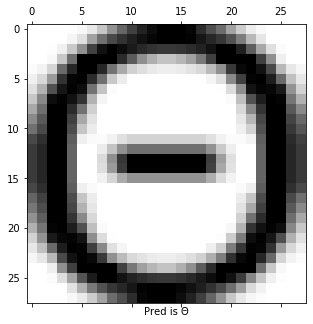

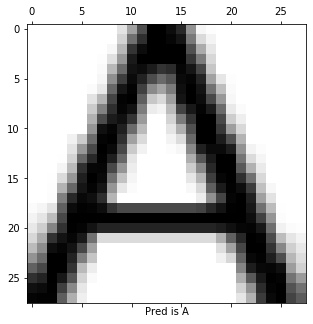

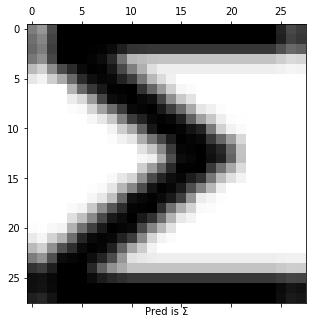

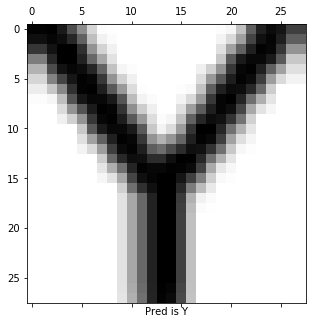

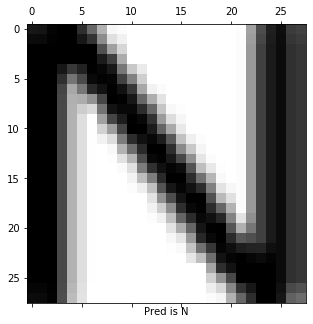

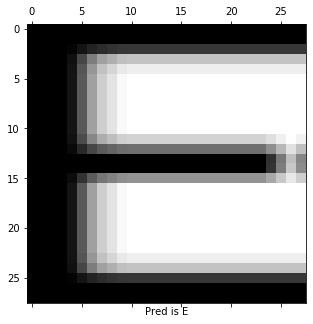

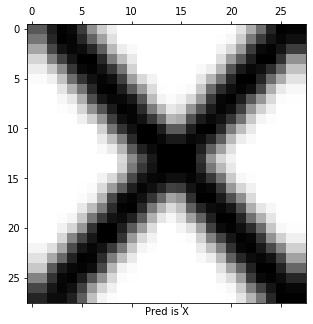

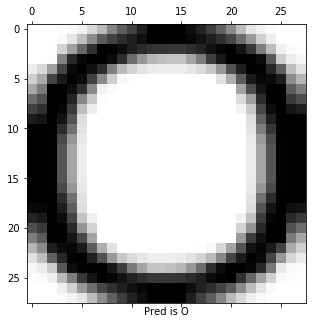

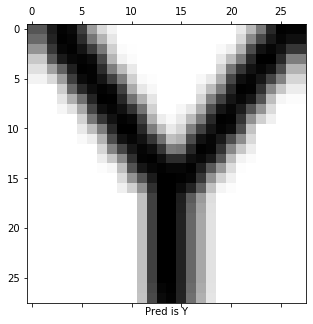

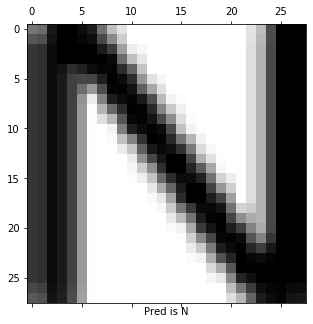

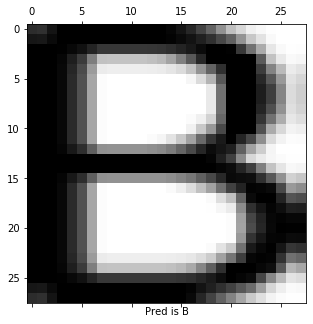

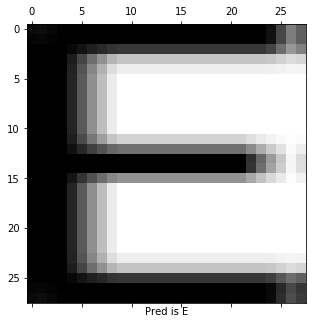

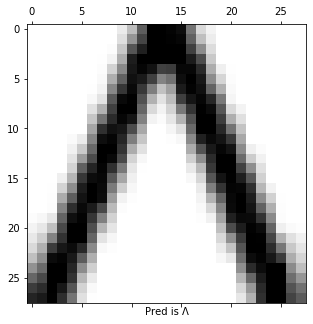

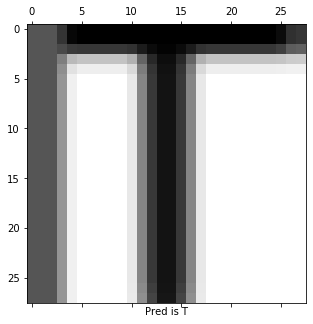

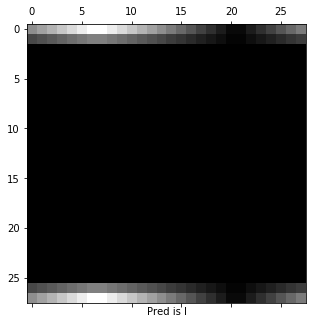

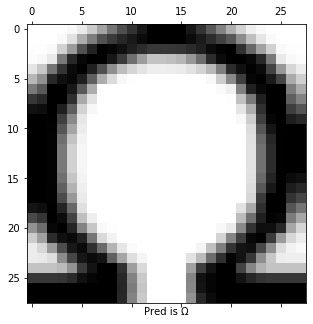

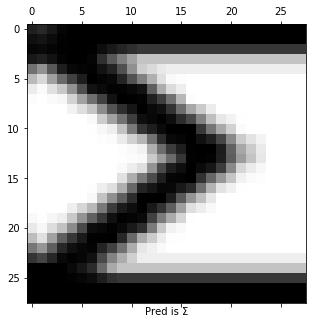

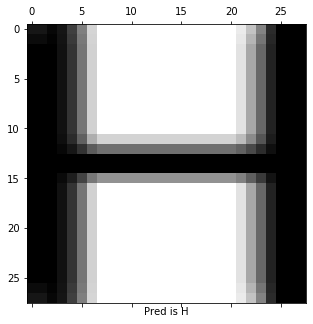

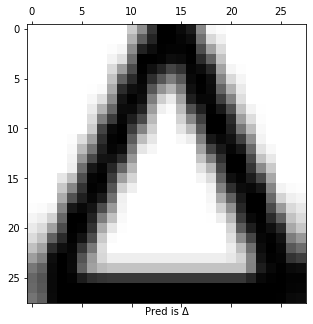

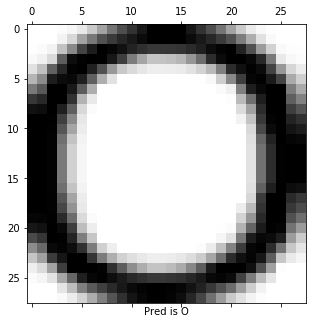

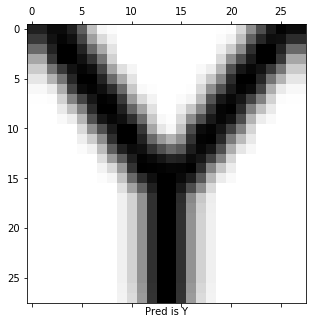

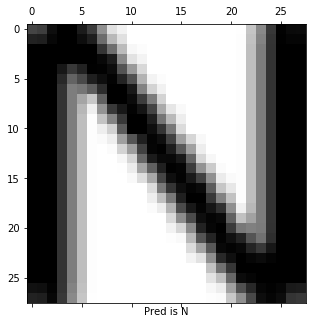

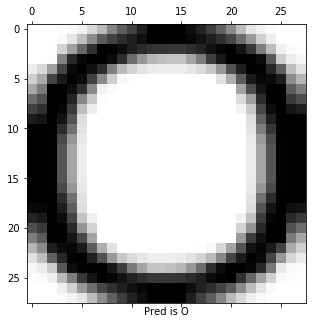

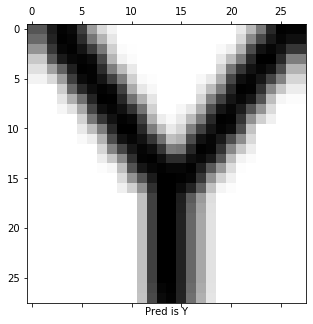

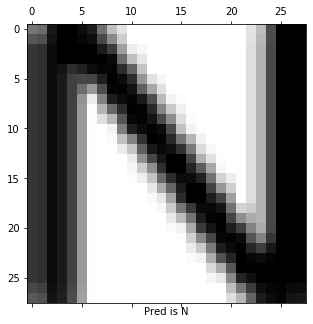

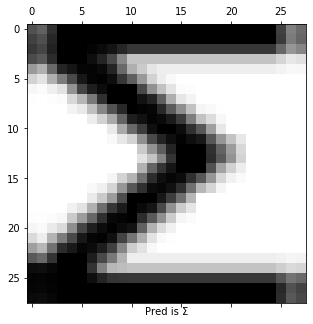

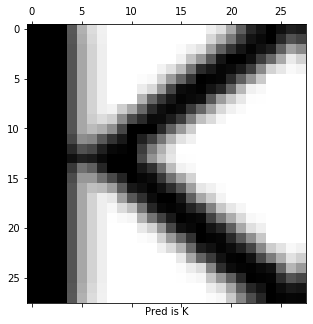

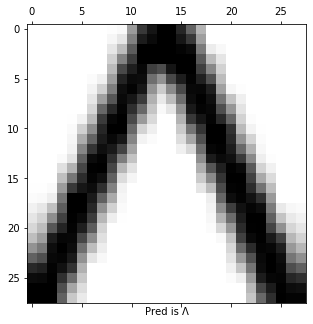

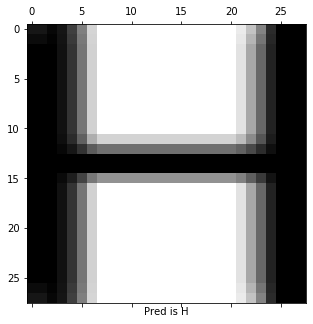

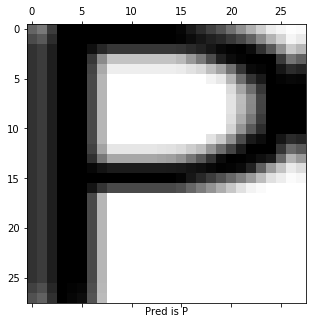

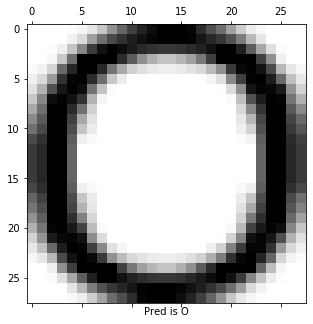

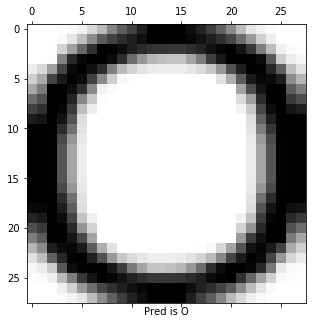

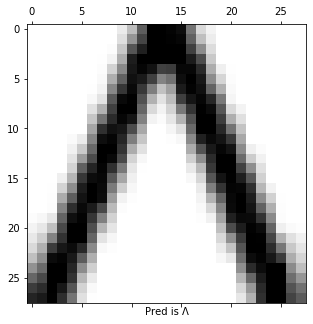

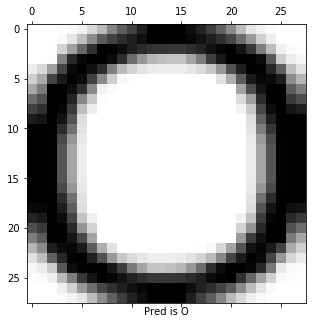

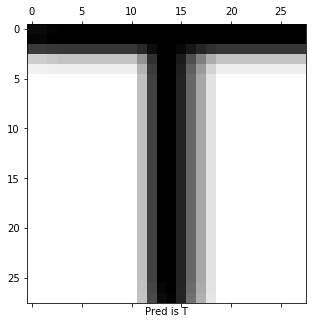

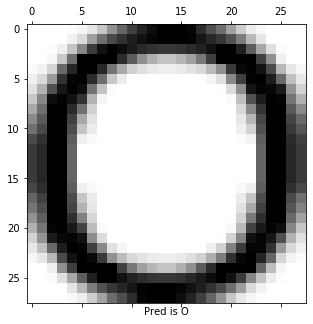

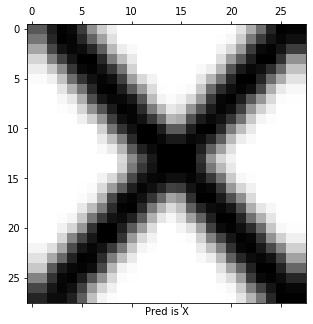

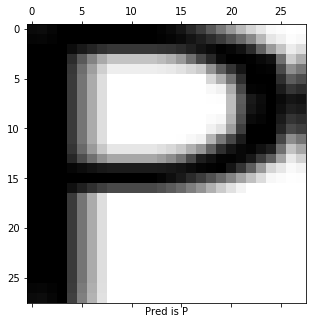

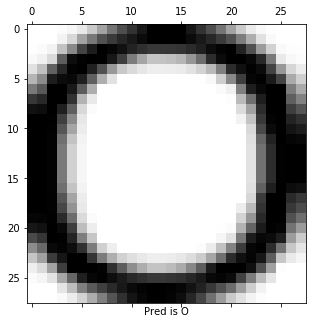

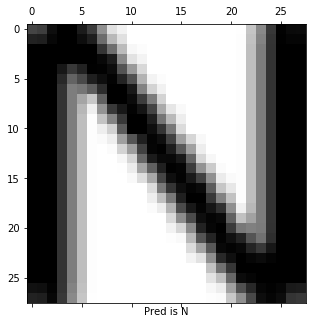

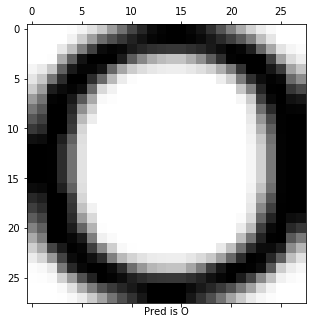

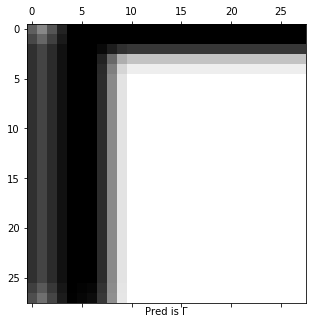

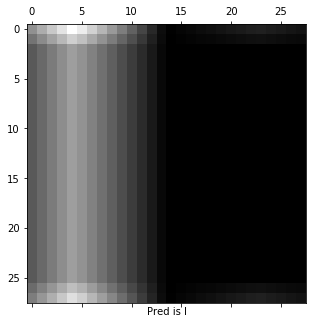

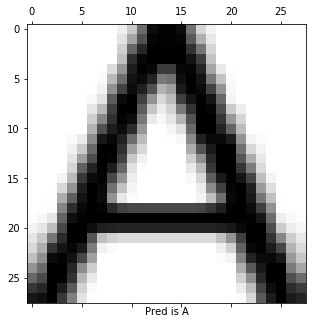

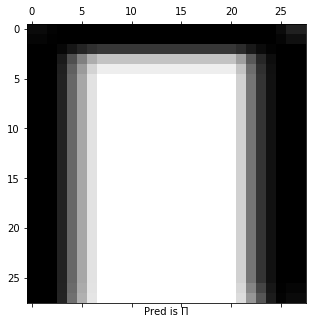

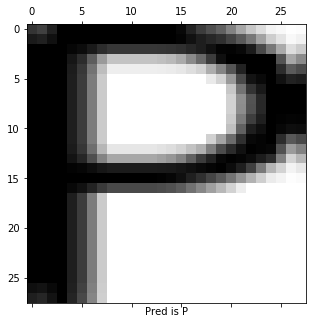

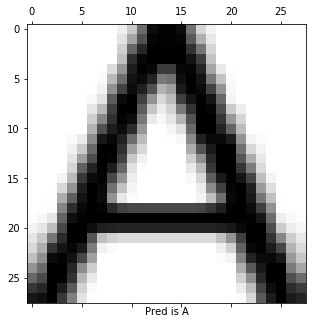

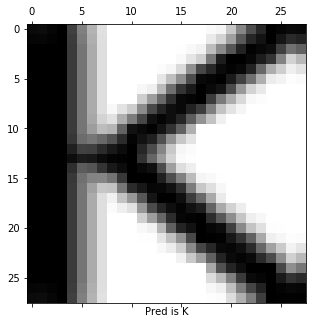

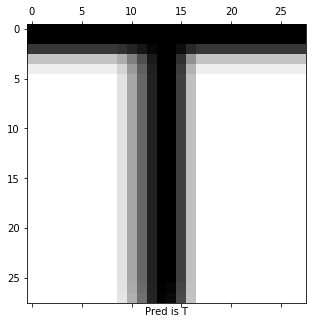

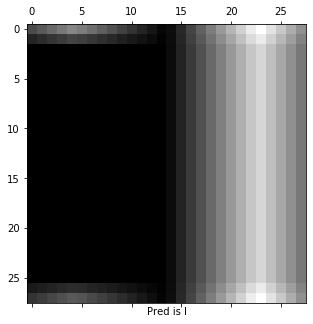

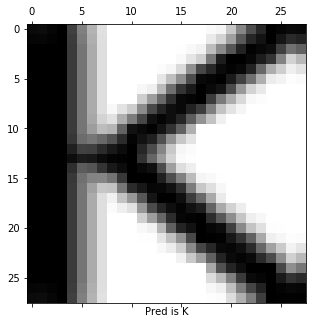

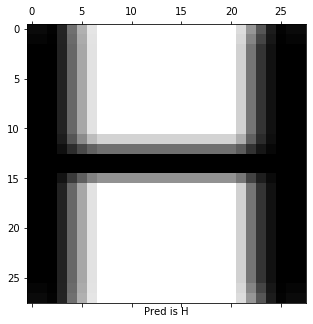

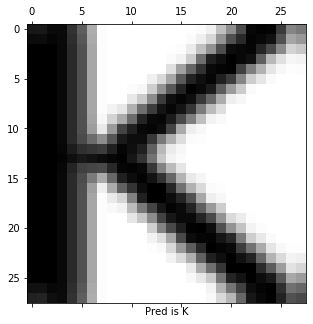

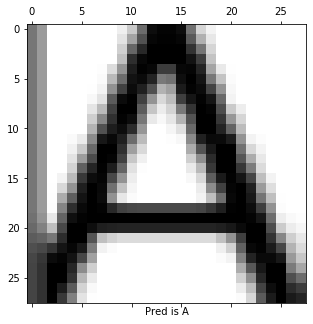

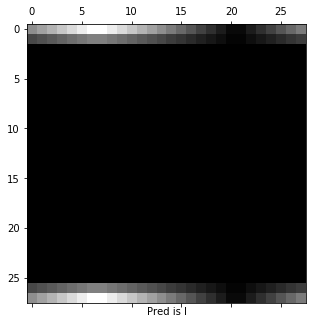

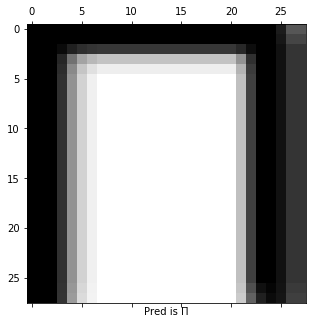

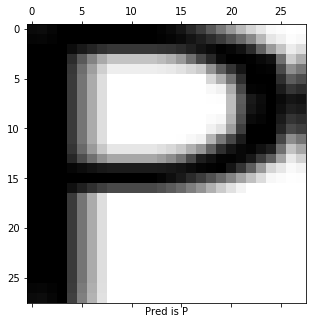

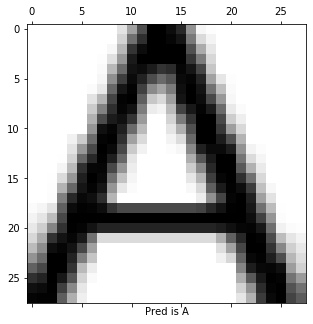

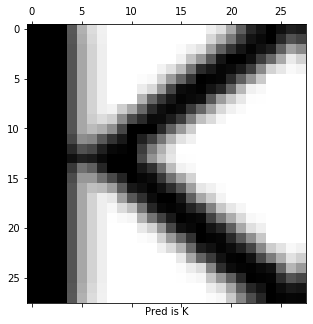

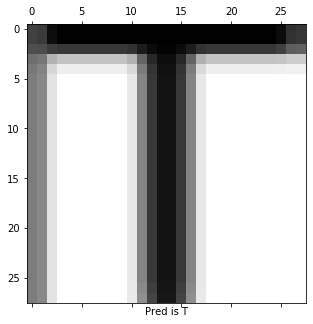

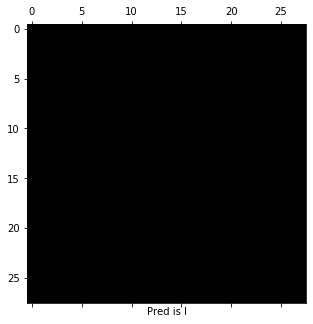

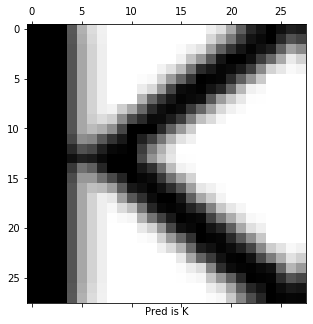

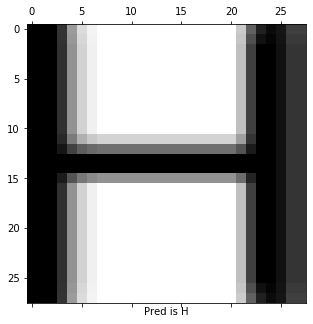

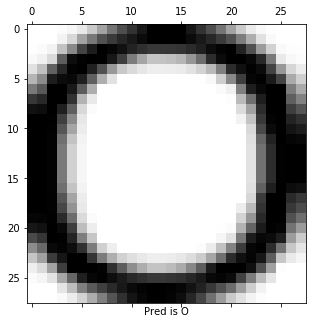

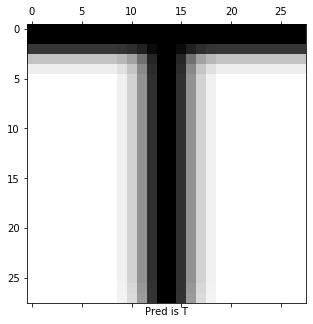

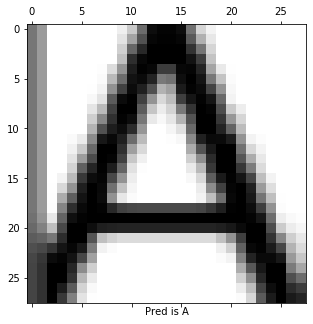

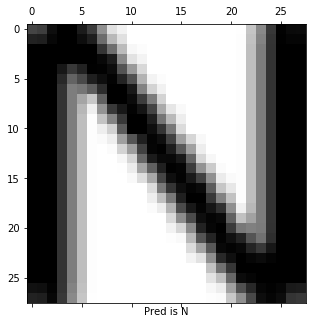

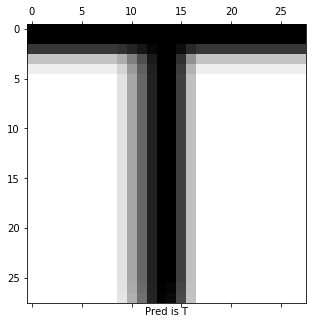

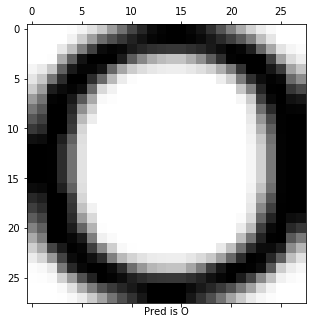

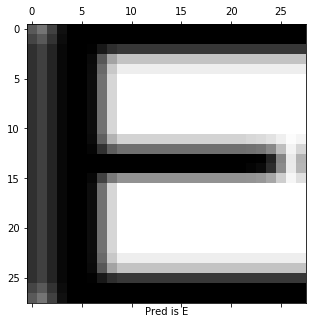

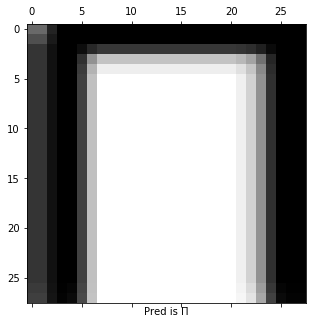

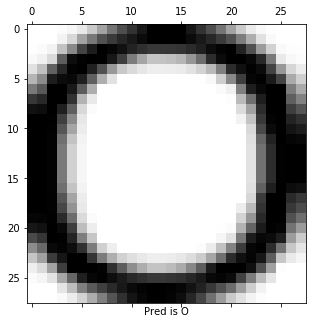

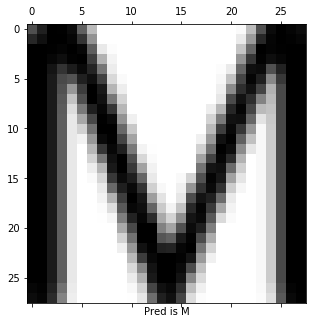

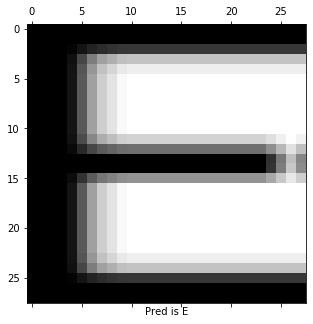

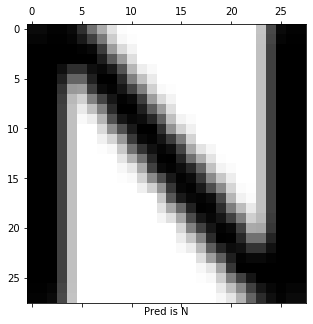

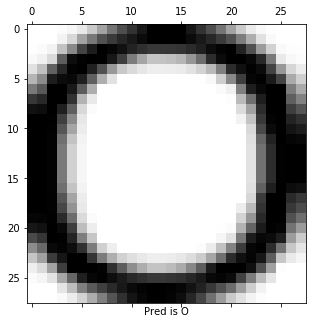

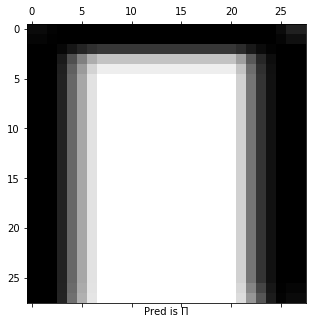

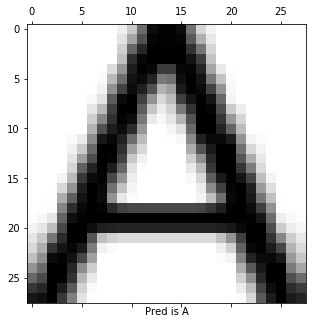

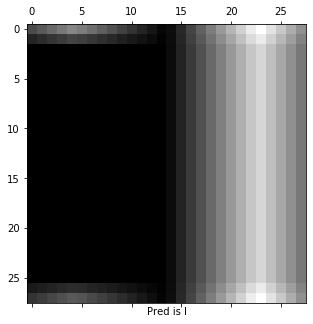

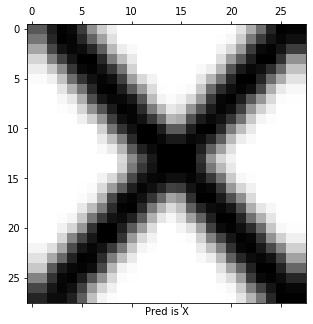

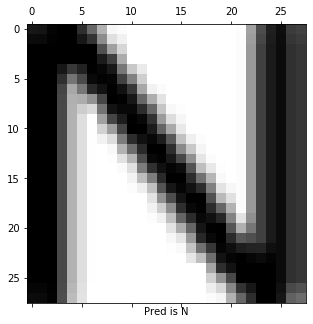

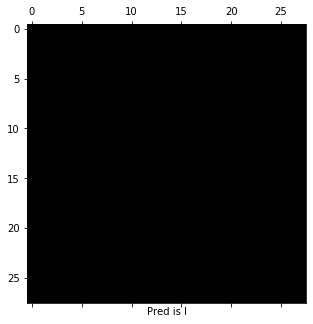

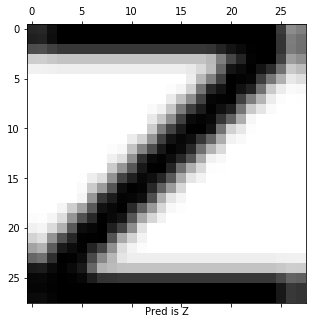

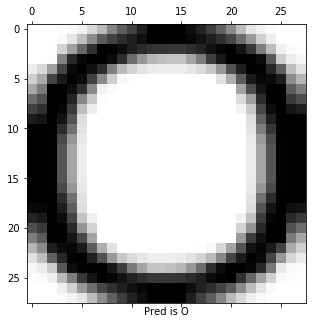

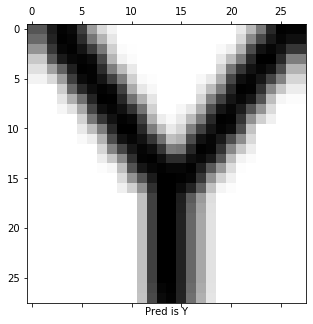

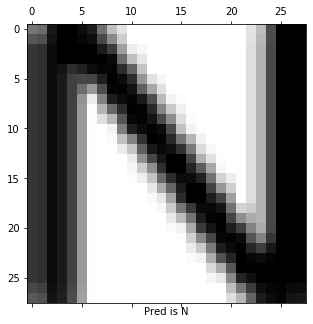

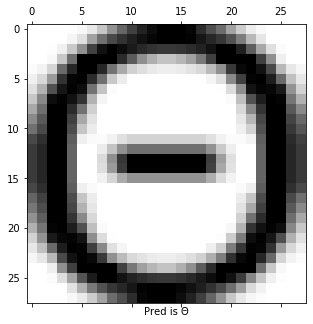

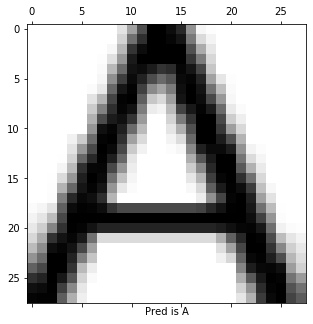

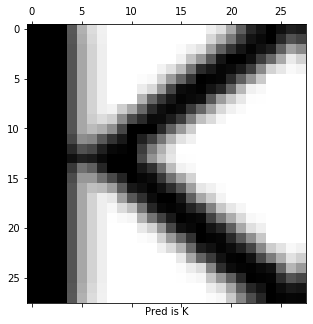

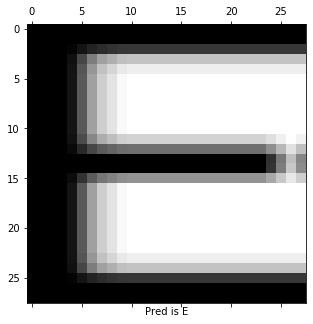

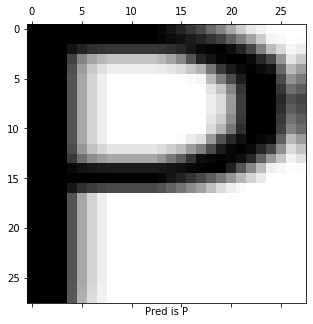

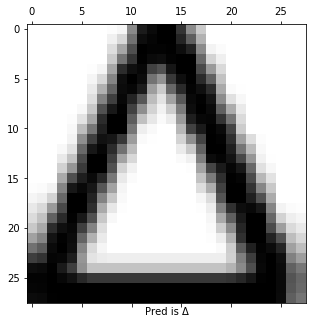

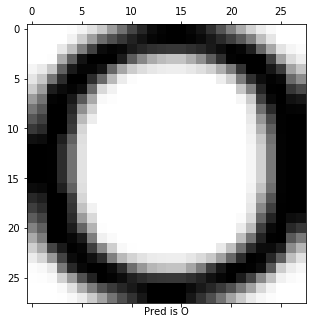

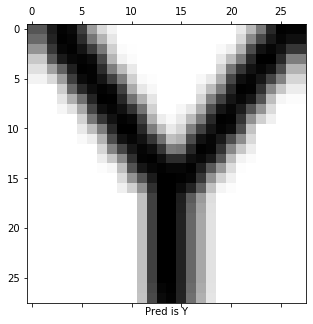

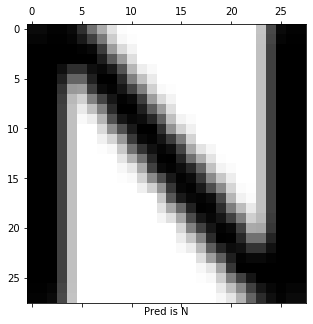

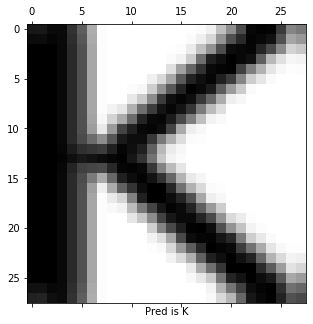

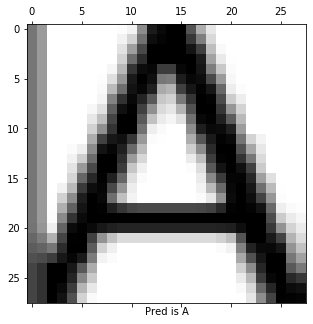

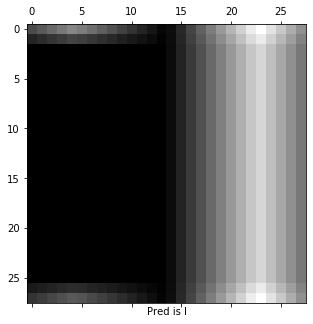

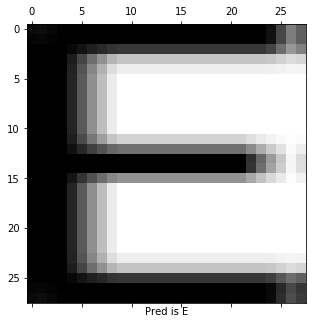

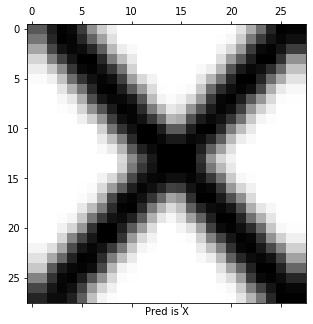

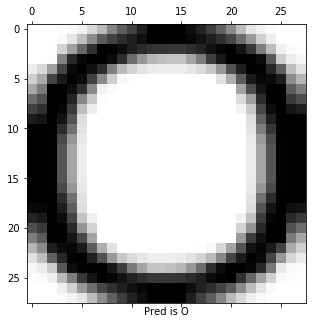

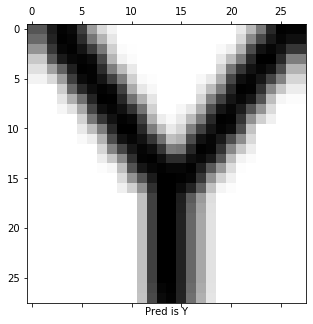

In [28]:
for i in range(0, segments.shape[0] - 1):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Pred is ' + y_pred[i])

In [29]:
print(str(test_target))
print('')
print(str(y_pred))

['Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Ζ' 'Ε' 'Ι' 'Τ' 'Ο' 'Π'
 'Ρ' 'Ω' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Δ' 'Ι' 'Ο' 'Μ' 'Π' 'Α' 'Σ' 'Κ'
 'Ε' 'Λ' 'Τ' 'Ο' 'Υ' 'Τ' 'Η' 'Σ' 'Ν' 'Ε' 'Α' 'Σ' 'Ε' 'Π' 'Ο' 'Χ' 'Η' 'Σ'
 'Π' 'Ι' 'Σ' 'Ω' 'Α' 'Υ' 'Τ' 'Ο' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Τ' 'Ο' 'Π' 'Ε' 'Ρ'
 'Ι' 'Σ' 'Σ' 'Ο' 'Τ' 'Ε' 'Ρ' 'Ο' 'Γ' 'Ι' 'Α' 'Τ' 'Ο' 'Π' 'Ε' 'Ρ' 'Ι' 'Σ'
 'Σ' 'Ο' 'Τ' 'Ε' 'Ρ' 'Ο' 'Τ' 'Ο' 'Υ' 'Χ' 'Α' 'Ν' 'Ο' 'Υ' 'Ν' 'Ε' 'Ν' 'Α'
 'Ν' 'Α' 'Ρ' 'Ι' 'Σ' 'Τ' 'Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ο' 'Υ' 'Ε' 'Χ' 'Ε'
 'Ι' 'Κ' 'Ο' 'Ν' 'Τ' 'Α' 'Σ' 'Τ' 'Ο' 'Π' 'Ρ' 'Ω' 'Τ' 'Ο' 'Τ' 'Υ' 'Π' 'Ο'
 'Τ' 'Η' 'Ν' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ο' 'Υ' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Δ' 'Υ'
 'Ν' 'Α' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Δ' 'Ι' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ'
 'Ν' 'Ι' 'Δ' 'Ι' 'Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ε' 'Ρ' 'Ι' 'Σ' 'Σ' 'Ο' 'Τ'
 'Ε' 'Ρ' 'Α' 'Χ' 'Ο' 'Ρ' 'Η' 'Γ' 'Ε' 'Ι' 'Ε' 'Σ' 'Κ' 'Α' 'Ι' 'Σ' 'Κ' 'Ο'
 'Ρ' 'Ε' 'Ι' 'Ο' 'Κ' 'Τ' 'Ω' 'Ο' 'Κ' 'Τ' 'Ι' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Α' 'Ρ'
 'Ι' 'Σ' 'Τ' 'Ε' 'Ρ' 'Α' 'Δ' 'Υ' 'Ο' 'Δ' 'Υ' 'Ο' 'Π